<img src="firewall_assets/capa.png" width=1000  style="float: center;padding:1rem;">

<center><h1> Projeto 2 - Ciência dos Dados</h1><center>

## Insper Instituto de Ensino e Pesquisa

<center><h5>Autores:
</h5></center>

<center><h5>Letícia Coêlho Barbosa
</h5></center>

<center><h5>Matheus Silva Melo de Oliveira
</h5></center>

**Professoras Orientadores:**

Maria Kelly Venezuela 

Bárbara Agena

___
## Índice

- [Contextualização](#context)

    - [Entendendo a Base de dados](#Base)


- [Bibliotecas](#bibliotecas)


- [Carregando base de dados](#carregando)


- [Analise Exploratória](#analiseexploratoria)


- [Vizualização de Dados categóricos](#visualizando)
    - [Portas mais relevantes segmentadas por ação tomada pelo Firewall](#porta)


- [Vizualização de Dados numéricos](#visualizando1)
    - [Análise cruzada de dados numéricos](#cruzada)
    
    
- [Conclusão da Analise Exploratoria](#conclusao1)


- [Iniciando a Construção do Modelo](#inicioModelo)


- [O que é Machine Learning?](#ml)


- [Biblioteca Utilizada: Sklearn](#sklearn)


- [Primeiro Modelo - KNearest Neighbors](#knn)


- [Segundo Modelo - Regressão Logística](#logistica)


- [Terceiro Modelo - DecisionTree](#decision)


- [Quarto Modelo - Random Forests](#forest)


- [Conclusão Geral](#conclusao2)


- [Aplicação prática do modelo](#aplicacao)


- [Referências](#referencia)

## Contextualização

------------------------------------------------------------

<div id="context"></div>

Atualmente, navegar no meio cibernético tornou-se uma comunalidade, ficou mais fácil para os usuários navegarem, se comunicarem, compartilharem informações. Entretanto, essa nova realidade também trás ameaças. A disseminação de vírus, os ataques de hackers a todo tipo de máquina, seja pessoal ou corporativa, estão maiores do que nunca.

Para defender os nossos queridos celulares/tablets/computadores existem diversos programas e ferramentas que se propõem a defender o seu sistema, uma dessas técnicas utilizadas com esse objetivo é conhecida como Firewall.

De acordo com o tamanho da rede, a quantidade de dados produzidos pelos usuários na rede pode ser muito grande.
Dispositivos de firewall em uma rede podem permitir ou impedir tráfego de acordo com a política usada examinando o
dados. A configuração de firewalls é vital para a comunicaçãoredes funcionem de forma adequada e segura.Firewalls agem como controle portas para redes de computadores.

Entendendo a sua importância como "barreira" para o fluxo de dados, o Firewall é o responsável pelo controle dos dados transferidos de e para o seu computador através da internet, além de prevenir que informações pessoais ou confidenciais sejam transmitidas pelo seu computador para a internet e impedir a invasão da máquina por software malicioso.

Portanto, **o objetivo desse projeto é classificar e tentar prever, atraves das características da transação (Portas destino e cliente , Número de bytes total, entre outros), se determinada transação de dados será aceita ou negada/impedida pelo computador (Allow, deny or drop).**

<br>
<center><img src="firewall_assets/firewall.gif" width=500 style="float: center; margin: 0px 0px 10px 10px"></center>

### Entendendo a base de dados utilizada
<div id="Base"></div>

* `Source Port`: Client Source Port - Geralmente apenas um arquivo executável que foi modificado a partir do código de fonte do programa original e substitui o executável original, para que possa ser rodado em uma outra plataforma para a qual não foi originalmente escrito


* `Destination Port`: Destination Port Client Destination Port - Para protocolos de aplicativos bem definidos, foram definidas portas bem conhecidas.  Os serviços só podem ser escutados em portas específicas.


* `NAT Source Port`: Porta de origem de tradução de endereço de rede. 


* `NAT Destination Port`: Porta de destino de tradução de endereço de rede.

     Em redes de computadores, Network Address Translation (NAT),  é uma técnica que consiste em reescrever, utilizando-se de uma tabela hash, os endereços IP de origem de um pacote que passam por um router (ou firewall) de maneira que um computador de uma rede interna tenha acesso a Rede Mundial de Computadores.
     

<br>
<center><img src="firewall_assets/Network_Address_Translation_(NAT).png" width=700 style="float: center; margin: 0px 0px 10px 10px"></center>
     

* `Bytes`: Número total de de Bytes da transação/pedido. 


* `Bytes Sent`: Número total de de Bytes enviados da transação/pedido.


* `Bytes Received`: Número total de de Bytes erecebidos da transação/pedido.


* `Packets`: Número total de pacotes. Pacotes são uma estrutura unitária de transmissão de dados ou uma sequência de dados transmitida por uma rede ou linha de comunicação que utilize a comutação de pacotes. A informação a transmitir  é quebrada em inúmeros pacotes e então transmitida. Além da parte da informação, o pacote possui um cabeçalho, que contém informações importantes para a transmissão, como o endereço do destinatário.

* `Elapsed Time (sec)`: Tempo decorrido para a transação/fluxo


* `pkts_sent`: Pacotes Enviados.


* `pkts_received`: Pacotes Recebidos.


* `Action (Traget) `: 
    - `Allow` (permite o  tráfego da Internet);
    - `Deny` (Bloqueia o tráfego e impõe a ação negar de forma padrão para o aplicativo que está sendo negado); 
    - `Drop` (Silenciosamente diminui o tráfego. A TCP reset não é enviada para o host ou para a aplicação); 
    - `Reset-Both` (Envia uma redefinição de TCP para os dispositivos do lado do cliente e do lado do servidor). 
     
<br>
<center><img src="firewall_assets/fire_packet.gif" width=400 style="float: center; margin: 0px 0px 10px 10px"></center>
<br>

Alguns termos importantes para a melhor compreensão do tema:

`TCP` (Transmission Control Protocol) e `IP` (Internet Protocol):  é um conjunto de protocolos de comunicação. Ele tem por objetivo padronizar todas as comunicações de rede, principalmente as comunicações na web.


`Portas`: portas lógicas para garantir que a aplicação (software) que iniciou a conversação encontrará no seu destino a aplicação desejada. São canais virtuais aleatórios que se abrem conforme o tipo de aplicação executando, como por exemplo, o HTTP utiliza a porta 80. Elas evitam que a informação seja direcionada erroneamente para outra aplicação.

A lista de portas conhecidas é mantida pela IANA(Acesse para saber mais: https://www.iana.org/assignments/service-names-port-numbers/service-names-port-numbers.xhtml)
As mais notáveis são orientadas por:

* Portas de 0 até 1023: Esses números TCP/UDP de portas são considerados como portas muito conhecidas. Essas portas são reservadas para servers específicos pela IANA. Por exemplo, a porta 80 é utilizadas por servers web.


* Portas de 1024 até 49151: São portas em que uma organização, como desenvolvedores de aplicações, podem registrar com a IANA para serem utilizadas como serviços particulares. São consideradas como semi-reservadas.


* Portas de 49152 até 65535: Esses números de portas são usados por operações de clientes, como por exemplo em browsers de serviço web. Quando visita-se um site, seu browser irá momentaneamente sustentar uma conexão com esse número de porta. Desenvolvedores são livres para utilizar qualquer uma dessas portas.


## Bibliotecas

------------------------------------------------------------

<div id="bibliotecas"></div>

**Rode a célula abaixo para centralizar e melhorar a visibilidade do Notebook**

In [51]:
# Possibilitando escrever no Markdown através de código.
from IPython.display import Markdown as md

#Ajeitando gráficos para ficarem centralizados
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [52]:
#Ignorando avisos de limite
import warnings

warnings.filterwarnings('ignore')

In [53]:
# Bibliotecas Essenciais

import numpy as np
import pandas as pd
import time
from scipy import stats 

# Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas para modelos e predições
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
# from yellowbrick.classifier import ROCAUC

# Modelo KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Modelo Logistic Regression
from sklearn.linear_model import LogisticRegression

#Modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

#Validação cruzada
from sklearn.model_selection import cross_val_score

#Individual scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Complete tables
from sklearn.metrics import classification_report
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#ROC Curve
from sklearn.metrics import roc_curve, auc


#Importando funções de plotagem e organização do módulo Python
from Modulo_de_Funções import *

#Inteiração
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Carregando Base de Dados

---------------------------------------------------------------

<div id="carregando"></div>

A Base de dados utilizada pode ser encontrada [aqui](https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data), tratando-se de uma plataforma da Universidade da Califórnia com grande quantidade de repositórios de Ciência dos Dados e Machine Learning open source.

In [54]:
filename = 'firewall_assets/log2.csv'
dados=pd.read_csv(filename)
dados.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [55]:
#Informações gerais sobre a base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [56]:
#Total de valores nulos (NaN)
dados.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

## Analise Exploratória

-------------------------------------------------------------

<div id ='analiseexploratoria'></div>

Iniciaremos aqui a analise estatística , de variáveis categóricas e numéricas da nossa base de dados.

## Visualização de dados categóricos
----------------------------------------------------------

<div id="visualizando"></div>

In [57]:
#Função de auxílio à plotagem
def filtra_linha (coluna,n):
    
    '''Verifica se a linha contém uma das portas mais importantes no value_counts,
    filtrando assim esta para a plotagem do gráfico de colunas'''
    
    lista1 = list(dados[coluna].value_counts().index[0:n])
    lista2 = [i for i in range(dados.shape[0]) if dados[coluna][i] in lista1]
    
    return dados.iloc[lista2]

In [58]:
# Mostrando colunas da base de dados
dados.columns.tolist()

['Source Port',
 'Destination Port',
 'NAT Source Port',
 'NAT Destination Port',
 'Action',
 'Bytes',
 'Bytes Sent',
 'Bytes Received',
 'Packets',
 'Elapsed Time (sec)',
 'pkts_sent',
 'pkts_received']

In [11]:
#Seleção dos dados dividos nas categorias
categoricos = dados.iloc[:,:4]
alvo = dados.iloc[:,4]
numericos = dados.iloc[:,5:]

#### Ações tomadas pelo Firewall

Veremos qual são as ações mais comuns tomadas, inicialmente por todo o dataset com o apoio da biblioteca Seaborn.

<div id = "distribuicao_acao"></div>

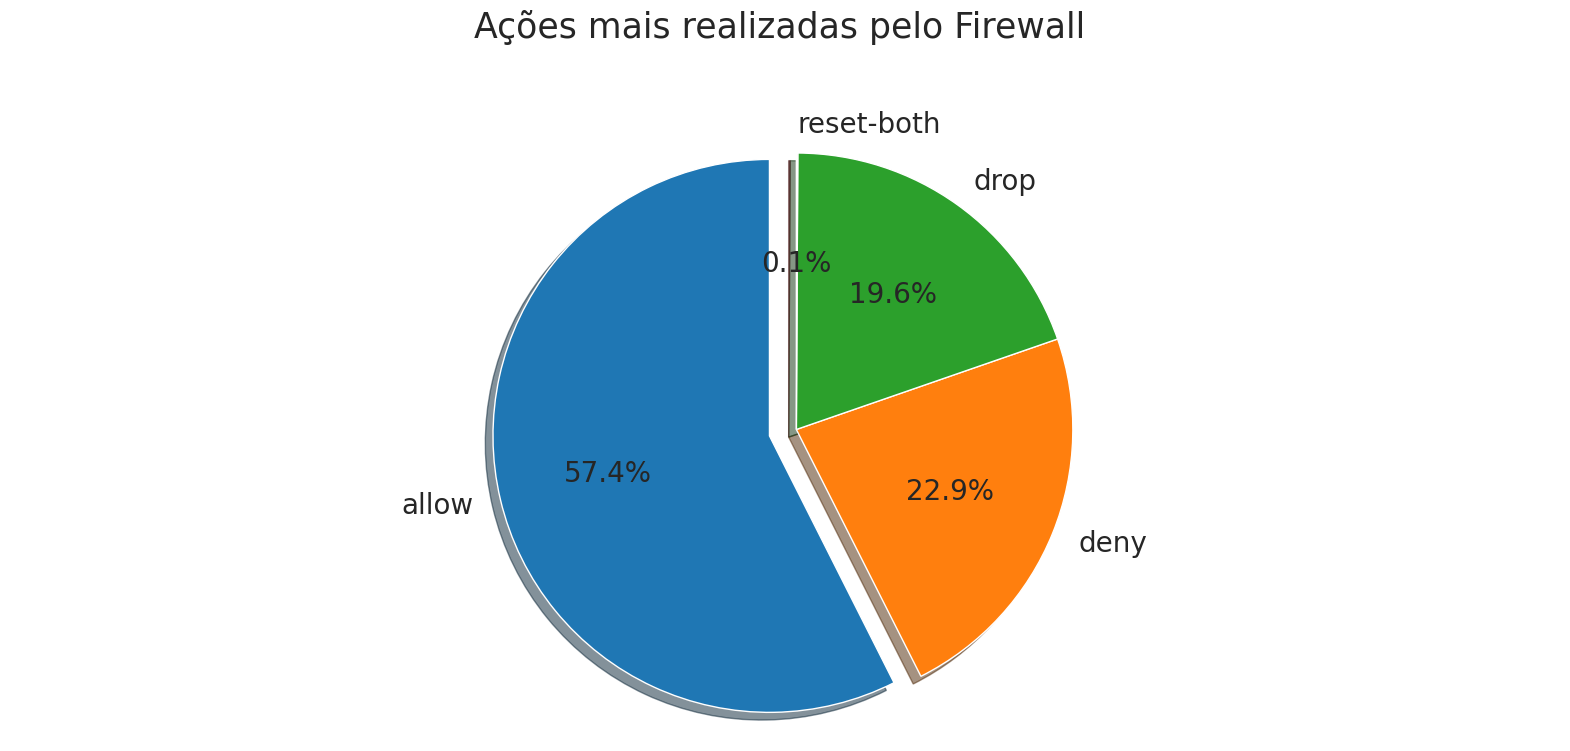

In [14]:
# Setando cores de fundo - gráficos
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.title('Ações mais realizadas pelo Firewall \n\n',size=25)
plt.pie(dados.Action.value_counts(),labels=dados.Action.value_counts().index,
        explode= [0.1,0,0,0],autopct='%1.1f%%',shadow=True, startangle=90,
       textprops={'size':20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.style.use('default')
plt.show()


Como vê-se pela plotagem acima, notamos que a ação/protocolo mais frequente tomado pelo Firewall é a de permitir o tráfico de informações, o que se respalda pela hipótese comum, dado que espera-se que na internet a presença de Malwares seja uma exceção e não regra. 

#### Portas de entrada Client mais utilizadas

Veremos rapidamente quais são as portas Source mais utilizadas pelo dataset. É válido ressaltar que a descrição de onde cada número ou seu intervalo de pertencimento estão explicitados [aqui](#Base).

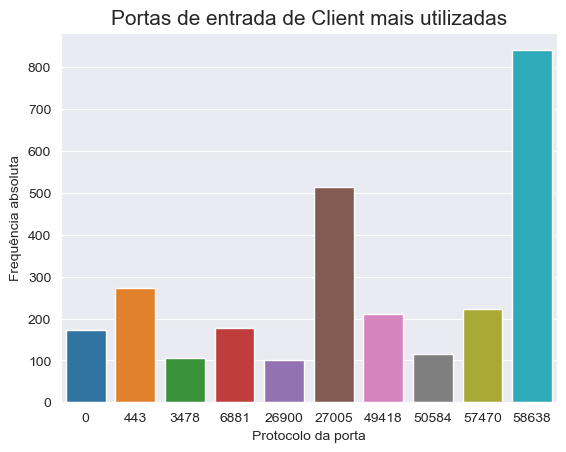

In [15]:
sns.set_style(style="darkgrid")
sns.countplot(filtra_linha('Source Port' , 10)['Source Port'])
plt.title('Portas de entrada de Client mais utilizadas',size=15)
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

#### Portas de destinação Client mais utilizadas

Veremos rapidamente quais são as portas Destination mais utilizadas segundo a base de dados.

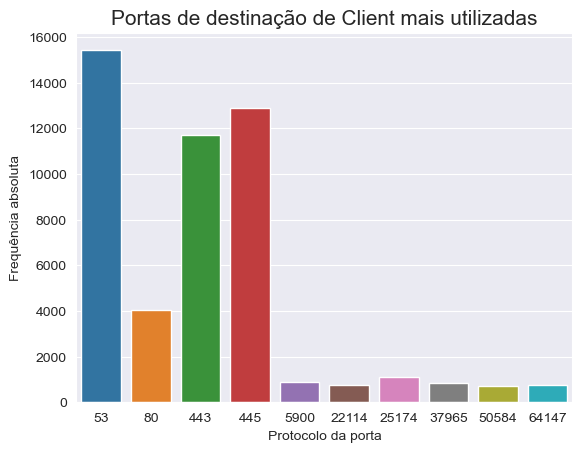

In [16]:
sns.countplot(filtra_linha('Destination Port', 10)['Destination Port'])
plt.title('Portas de destinação de Client mais utilizadas',size =15)
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

É notório que nas portas de entrada Client, portas pertecentes ao domínio de número 1024 até o 65535, sejam maioria dado que essas são as portas de uso mais pessoal e comum dentro de serviços de inteiração web. Nota-se também que na porta de destinação Client, tem seu dominínio maior quase que estrito ao intervalo das portas 0 à 1023, demonstrando e comprovando que a destinação server para client deriva de portas conhecidas e protocolares, isto é, reservadas.

#### Portas de entrada NAT mais utilizadas

Veremos rapidamente quais são as portas de entrada NAT mais comuns pelo presente no dataset.

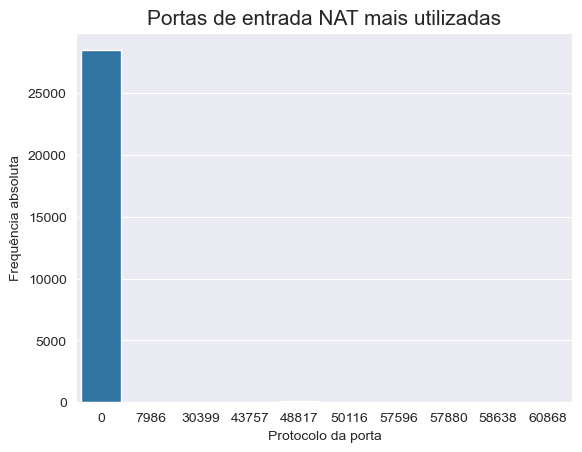

In [17]:
sns.countplot(filtra_linha('NAT Source Port', 10)['NAT Source Port'])
plt.title('Portas de entrada NAT mais utilizadas', size = 15)
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

Nota-se que  dentre as portas de entrada NAT, seu fluxo majoritário deriva da porta 0, que conforme pode ser averiguado na contextualização deste projeto, trata-se de uma porta reservada, cujo não existe necessariamente uma inteiração Client-Server desenvolvida, mas é necessária para o fluxo de dados paralelos.

#### Portas de destinação NAT mais utilizadas

Veremos rapidamente quais são as portas Destination NAT mais recorrentes na base de dados utilizada.

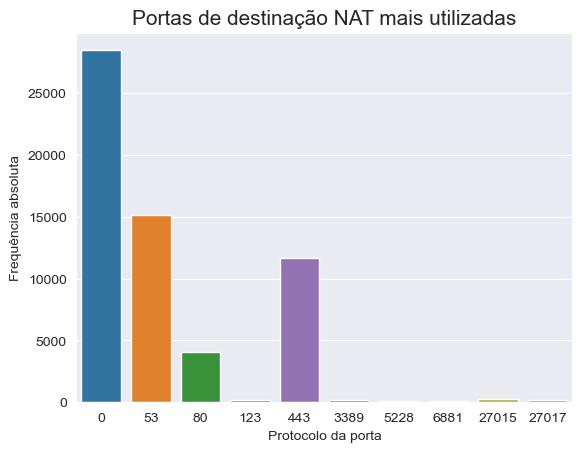

In [13]:
sns.countplot(filtra_linha('NAT Destination Port', 10)['NAT Destination Port'])
plt.title('Portas de destinação NAT mais utilizadas',size = 15)
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

Nota-se que nas portas de destinação NAT, a maior parte das portas mais utilizadas também pertencem ao registro das portas "conhecidas", justificando as operações protocolares feitas no sentido Server-Client.

### Portas mais relevantes segmentadas por ação tomada pelo Firewall



----------------------------------------------------------------------------------

<div id="porta"></div>

Após, análise da distribuição dos valores categóricos do dataset, isto é, as portas de orientação da máquina e de servidor, analisa-se a seguir a maneira como as portas mais utilizadas se comportam em relação as ações tomada pelo Firewall, e dessa forma pode-se concluir alguns padrões elucidados nessas ações em relação as portas mais utilizadas em cada um dos protocolos.

Foram plotadas matrizes cruzadas (crosstabs) em conjunto a gráficos de barras, que permitam
um melhor entendimento da associação entre quais portasou grupo de portas podem estar associados
aos protocolos executados pelo Firewall.
Nota-se que não necessariamente uma porta ter mais incidência de uma certa ação a torna,
mais ou menos segura, mas pode indicar padrões de identificação de Malware que são essenciais,
para o estabelecimento de um modelo adequado, que possa prever com eficácia qual deve ser a
ação a ser tomada em detrimento de uma certa situação.

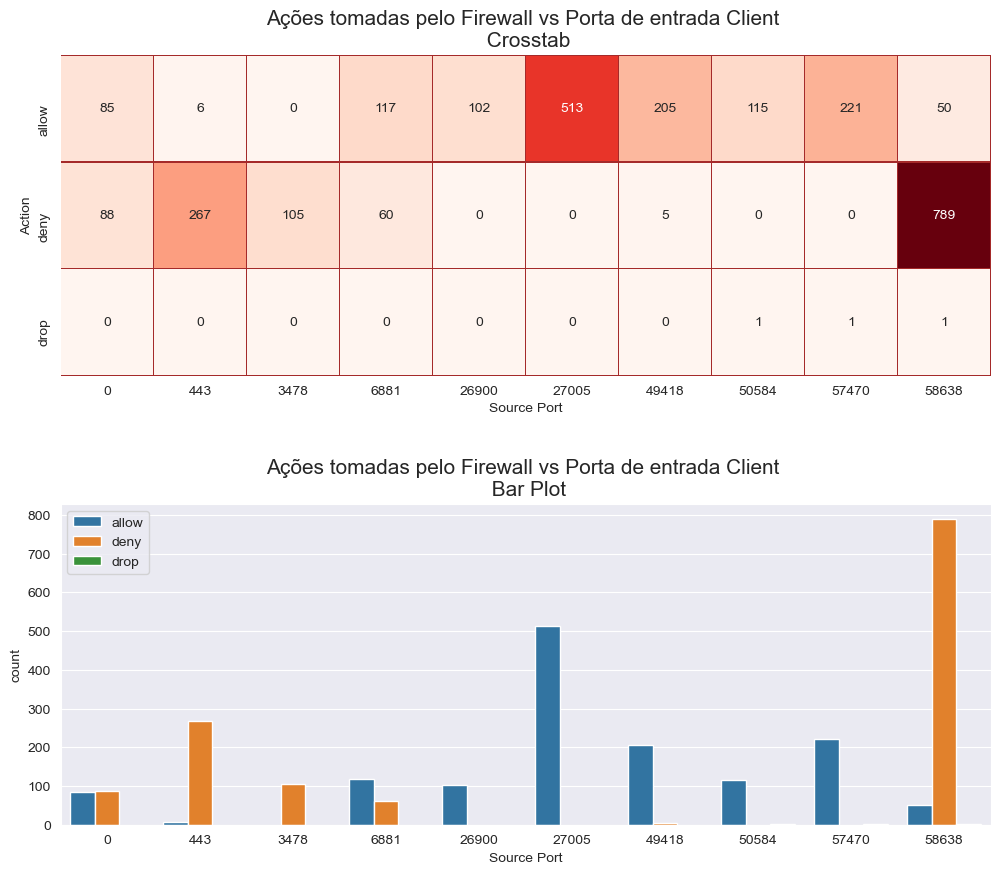

In [14]:
#Plotando crosstab com auxílio da biblioteca seaborn para facilitar visualização.
melhores_analise = dados[dados['Source Port'].isin(dados['Source Port']
                                          .value_counts()[0:10].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['Source Port'])
plt.figure(figsize=(12,10))

plt.subplot(211)
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Reds',
            linecolor='brown',
            cbar=False,
            linewidths=0.5)
plt.title('Ações tomadas pelo Firewall vs Porta de entrada Client \n Crosstab',size=15)

#Plotando gráfico de barras que de maneira similar indiquem cada uma das ações tomadas nas portas
#mais utilizadas do dataset neste certame.
plt.subplot(212)
data_SourcePort = filtra_linha('Source Port' , 10)
sns.countplot(data_SourcePort['Source Port'], hue = data_SourcePort['Action']);
plt.legend(loc='upper left')
plt.title('Ações tomadas pelo Firewall vs Porta de entrada Client \n Bar Plot',size=15)
plt.subplots_adjust(hspace = 0.4)

plt.show()

Analisando o crosstab, observamos que a Source Port 27005 e 58638 apresentam , em sua maioria, ações mais imediatas de permissão e negação respectivamente.

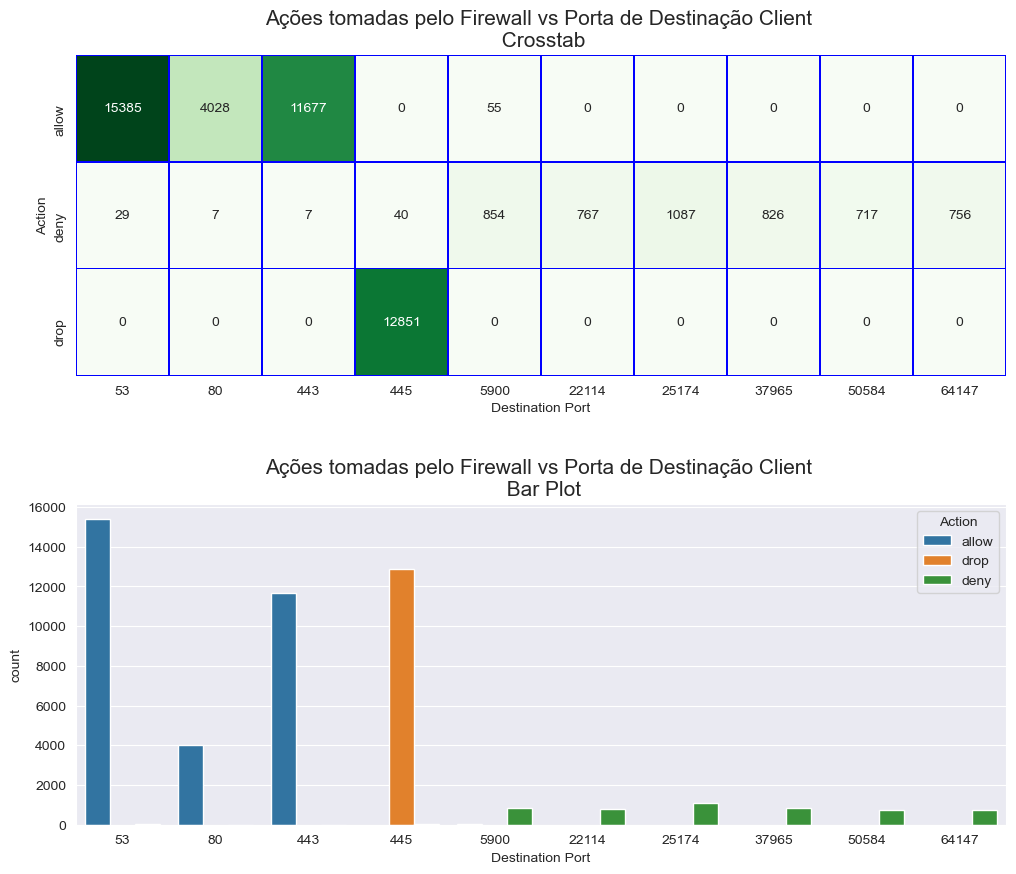

In [15]:
#Plotando crosstab com auxílio da biblioteca seaborn para facilitar visualização.
melhores_analise = dados[dados['Destination Port'].isin(dados['Destination Port']
                                          .value_counts()[0:10].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['Destination Port'])
plt.figure(figsize=(12,10))

plt.subplot(211)
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Greens',
            linecolor='blue',
            cbar = False,
            linewidths=0.5)
plt.title('Ações tomadas pelo Firewall vs Porta de Destinação Client \n Crosstab',size=15)

#Plotando gráfico de barras que de maneira similar indiquem cada uma das ações tomadas nas portas
#mais utilizadas do dataset neste certame.

plt.subplot(212)
data_SourcePort = filtra_linha('Destination Port' , 10)
sns.countplot(data_SourcePort['Destination Port'], hue = data_SourcePort['Action']);
plt.title('Ações tomadas pelo Firewall vs Porta de Destinação Client \n Bar Plot',size=15)
plt.subplots_adjust(hspace = 0.4)

plt.show()

Analisando o crosstab, observamos que a Destination Port 53, 80, 443 e 445, possuem ações imediatas onde as 3 primeiras são majoritariamente aceitas e a última "dropada" . As demais portas da vizualização são negadas.

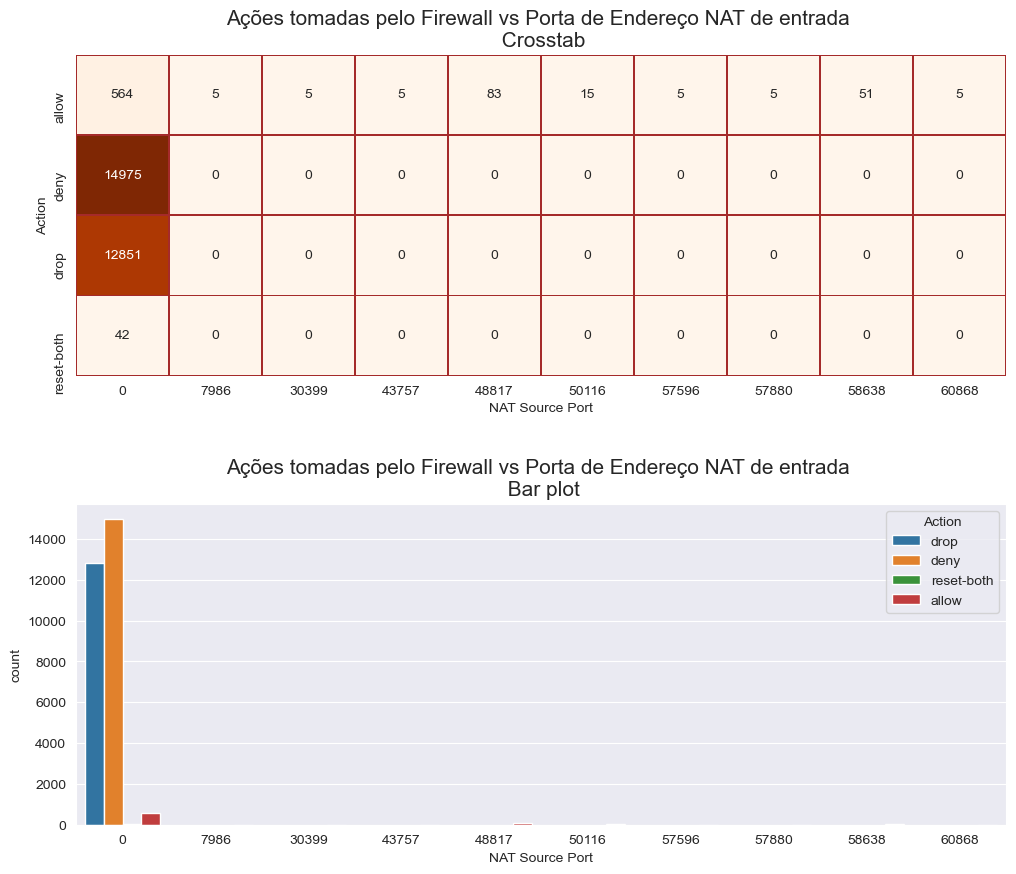

In [16]:
#Plotando crosstab com auxílio da biblioteca seaborn para facilitar visualização.
melhores_analise = dados[dados['NAT Source Port'].isin(dados['NAT Source Port']
                                          .value_counts()[0:10].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['NAT Source Port'])
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Oranges',
            linecolor='brown',
            cbar = False,
            linewidths=0.5)
plt.title('Ações tomadas pelo Firewall vs Porta de Endereço NAT de entrada \n Crosstab',size=15)

#Plotando gráfico de barras que de maneira similar indiquem cada uma das ações tomadas nas portas
#mais utilizadas do dataset neste certame.
plt.subplot(212)
data_SourcePort = filtra_linha('NAT Source Port' , 10)
sns.countplot(data_SourcePort['NAT Source Port'], hue = data_SourcePort['Action']);
plt.title('Ações tomadas pelo Firewall vs Porta de Endereço NAT de entrada \n Bar plot',size=15)
plt.subplots_adjust(hspace = 0.4)

plt.show()

Analisando o crosstab, observamos que a NAT Source Port 0, possuem ações que se dividem majoritariamente entre deny e drop, possuindo poucas ações permitdas.

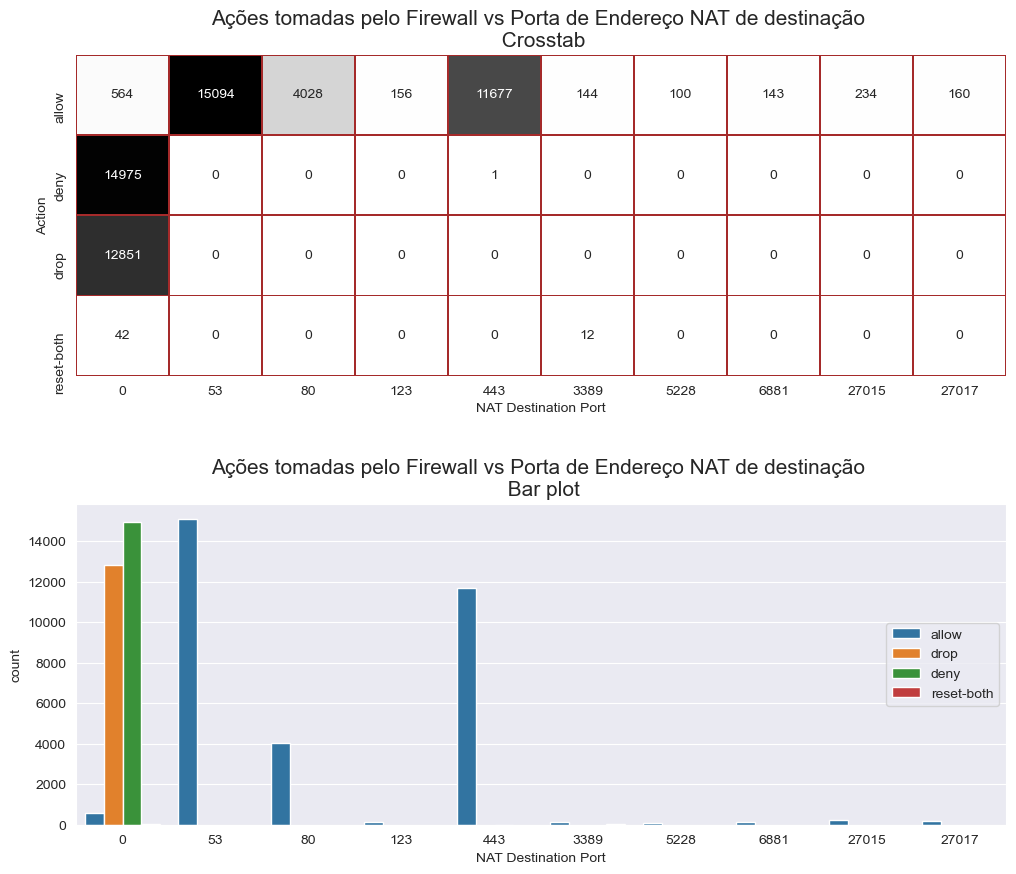

In [17]:
#Plotando crosstab com auxílio da biblioteca seaborn para facilitar visualização.
melhores_analise = dados[dados['NAT Destination Port'].isin(dados['NAT Destination Port']
                                          .value_counts()[0:10].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['NAT Destination Port'])
plt.figure(figsize=(12,10))

plt.subplot(211)
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Greys',
            cbar= False,
            linecolor='brown',
            linewidths=0.5)
plt.title('Ações tomadas pelo Firewall vs Porta de Endereço NAT de destinação \n Crosstab',
          size=15)

#Plotando gráfico de barras que de maneira similar indiquem cada uma das ações tomadas nas portas
#mais utilizadas do dataset neste certame.
plt.subplot(212)
data_SourcePort = filtra_linha('NAT Destination Port' , 10)
sns.countplot(data_SourcePort['NAT Destination Port'], hue = data_SourcePort['Action']);
plt.legend(loc='right')
plt.title('Ações tomadas pelo Firewall vs Porta de Endereço NAT de destinação \n Bar plot',
          size=15)
plt.subplots_adjust(hspace = 0.4)

plt.show()

Analisando o crosstab, observamos que a NAT Destination Port 0, há divisão de ação entre drop e deny. Nas portas 53, 80 e 443 possuem ação majoritariamente allow.

## Visualização dos conjuntos de dados numéricos

<div id="visualizando1"></div>

<div id="Numerico"></div>

Vamos agora analisar como os conjuntos de dados numéricos, respectivos a quantidade de Bytes, Packets e tempo decorrido análise dos fluxos de dados, e assim aplicar os parâmetros mais adequados para sua visualização e entendimento estatístico de suas composições

In [18]:
dados.Bytes.describe()

count    6.553200e+04
mean     9.712395e+04
std      5.618439e+06
min      6.000000e+01
25%      6.600000e+01
50%      1.680000e+02
75%      7.522500e+02
max      1.269359e+09
Name: Bytes, dtype: float64

In [19]:
dados.Packets.describe()

count    6.553200e+04
mean     1.028660e+02
std      5.133002e+03
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      1.036116e+06
Name: Packets, dtype: float64

In [20]:
dados['Elapsed Time (sec)'].describe()

count    65532.000000
mean        65.833577
std        302.461762
min          0.000000
25%          0.000000
50%         15.000000
75%         30.000000
max      10824.000000
Name: Elapsed Time (sec), dtype: float64

Como vemos, a conjuntura desses valores tem valores muito grandes e valores diminutos, o que possivelmente dificultará sua visualização em gráficos, e por consequência, dificultará a visualização gráfica e estatística do conjunto de dados. Para contornar esse problema, adota-se uma condição de normalização dos dados em escala logarítimica, para assim, valores grandes e pequenos, tenham representações relativamente proporcionais nos gráficos plotados.

In [21]:
normalizing = lambda x: np.log10(1+x)

In [22]:
# Separando a base de dados:

allow = dados[dados.Action == 'allow']
deny =  dados[dados.Action == 'deny']
drop =  dados[dados.Action == 'drop']
reset_both =  dados[dados.Action == 'reset-both']

#### Quantidade de Bytes enviados e recebidos

Analisou-se, mediante a normalização dos dados na escala logarítimica, o fluxo de Bytes enviados em tráficos realizados pelas portas de comunicação. Inicialmente, analisou-se o contexto geral da base de dados, para conclusões sobre a divisão e alocação de como a amostra se comporta, e posteriormente, segmentou-se de acordo com a ação tomada pelo Firewall, para melhor entendimento desta em relação ao tamanho dos arquivos envolvidos.

- Bytes Totais:

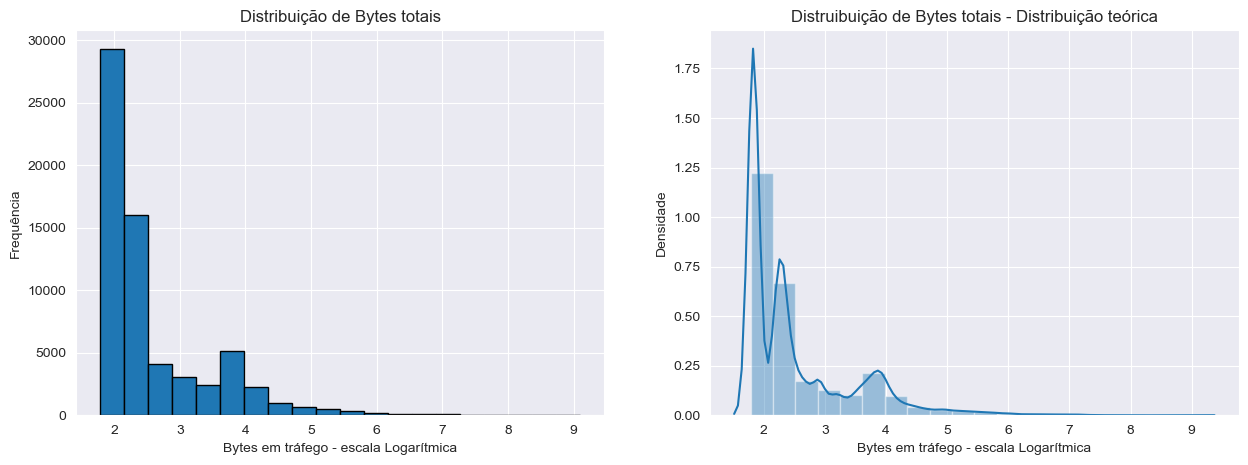

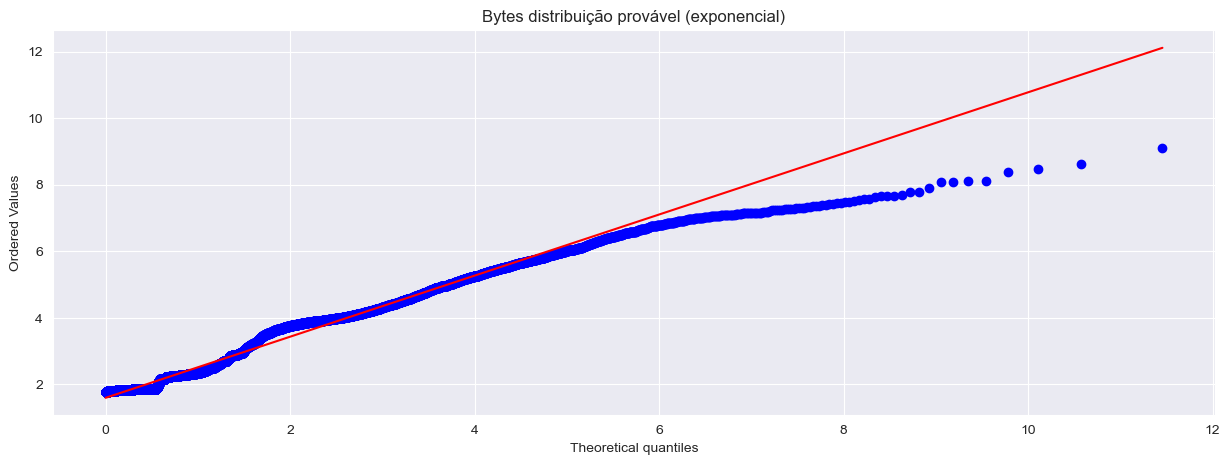

In [23]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(normalizing(dados['Bytes']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Bytes totais')
plt.xlabel('Bytes em tráfego - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sns.distplot(normalizing(dados['Bytes']), hist = True , bins=20)
plt.title('Distruibuição de Bytes totais - Distribuição teórica')
plt.xlabel('Bytes em tráfego - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(normalizing(dados['Bytes']),dist='expon',plot=plt)
plt.title('Bytes distribuição provável (exponencial)')

plt.show()


Nesse gráfico de distribuição dos Bytes totais , observamos um comportamento inicial próximo ao exponencial como foi mostrado pela plotagem probplot, indicando uma concentração assimétrica, sobretudo na quantidade de Bytes trafegados pelos expoentes de 0 a 2. 

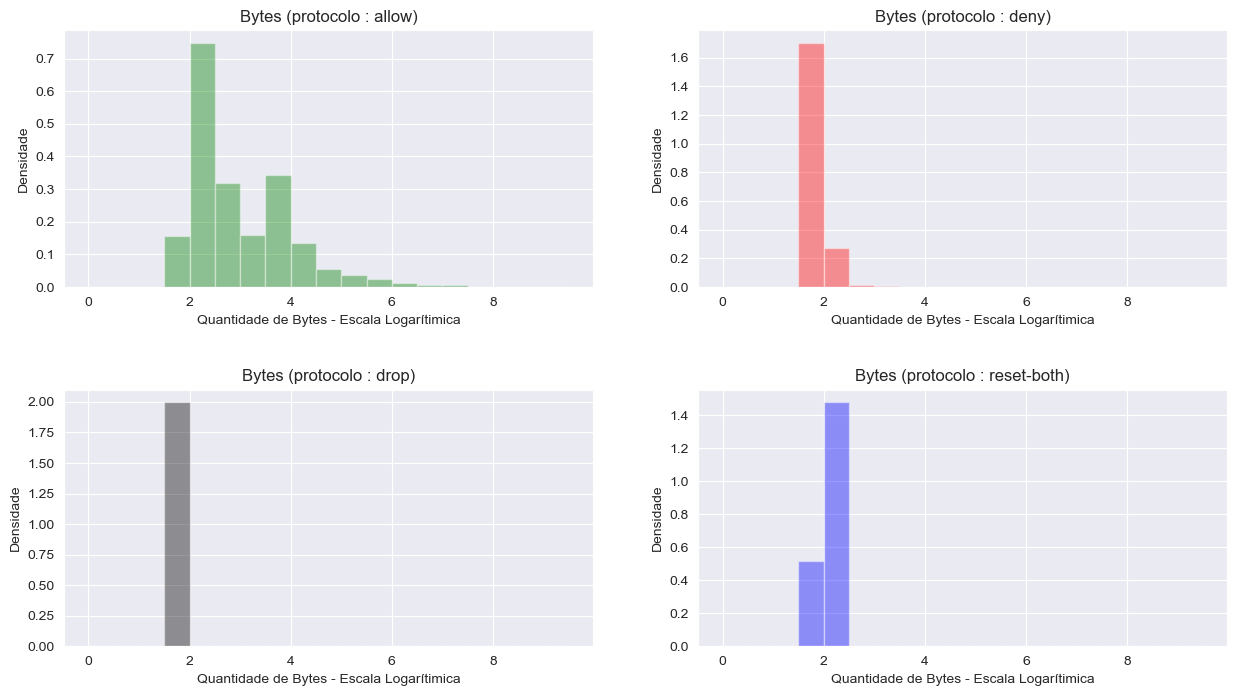

In [27]:
plt.figure(figsize=(15,8))
for action,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                                [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)
    sns.distplot(normalizing(action['Bytes']),bins = np.arange(0,10,0.5) , hist=True, kde=False, 
                 norm_hist=True,rug=False , color = color )
    plt.subplots_adjust(hspace = 0.4)
    plt.xlabel('Quantidade de Bytes - Escala Logarítimica')
    plt.ylabel('Densidade')
    plt.title(f'Bytes (protocolo : {name})')
    
plt.show()

- Bytes enviados e recebidos

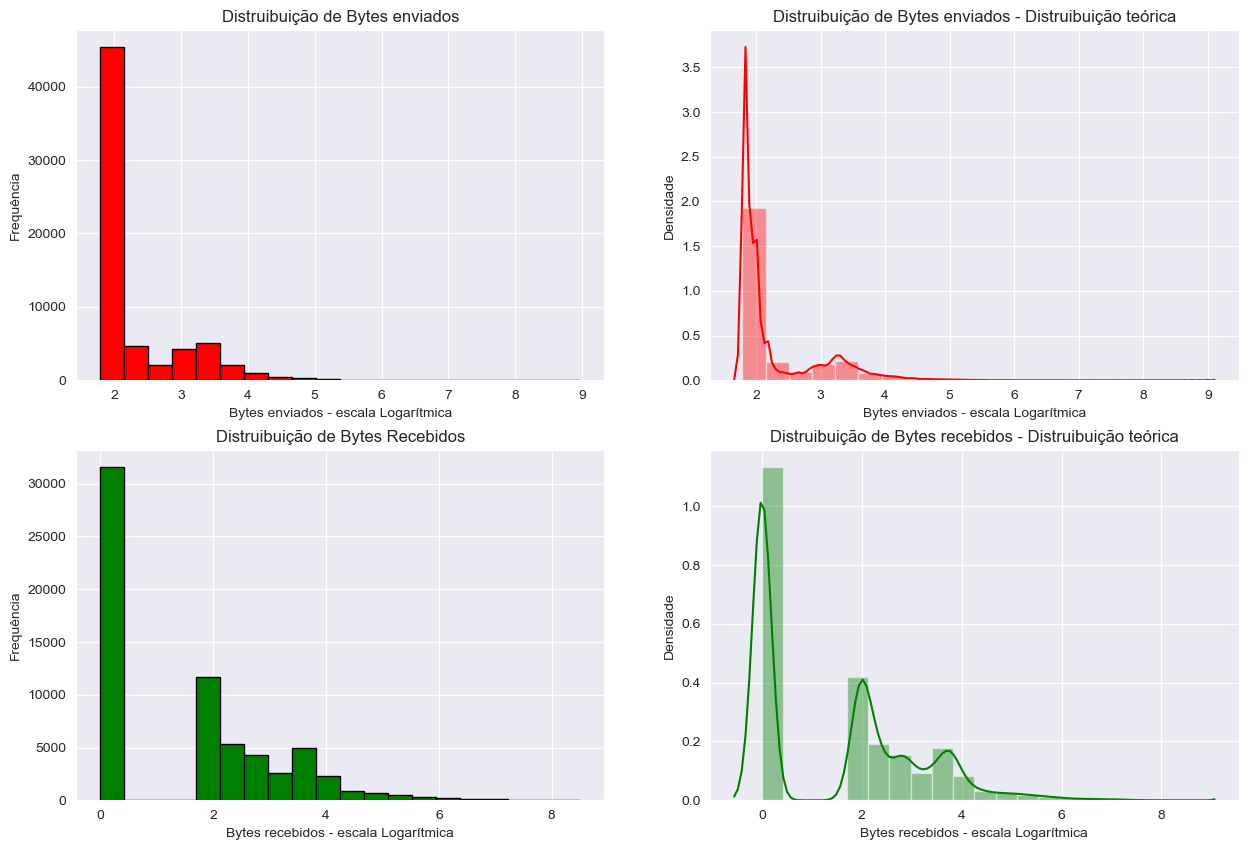

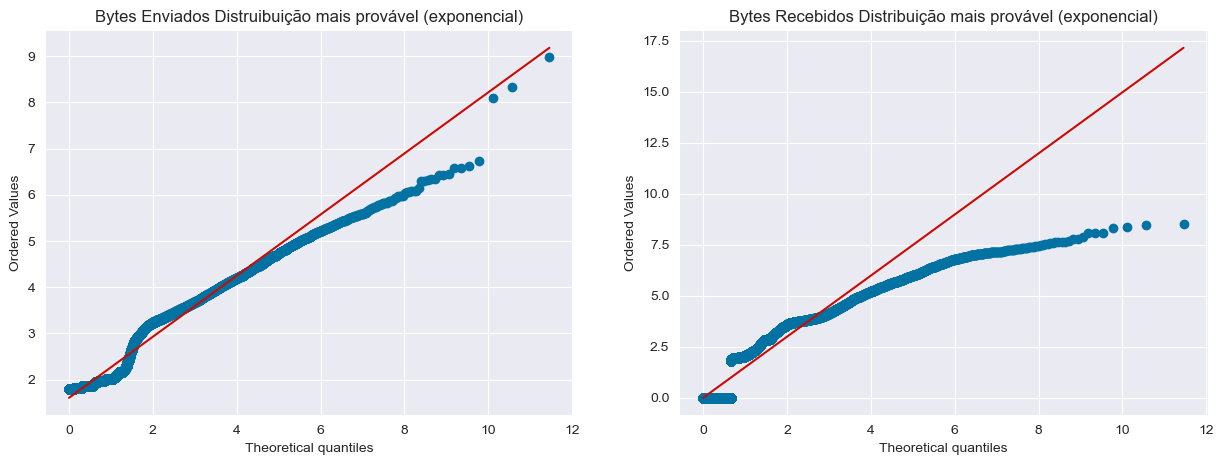

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.hist(normalizing(dados['Bytes Sent']), bins=20,color='red',edgecolor='black')
plt.title('Distruibuição de Bytes enviados')
plt.xlabel('Bytes enviados - escala Logarítmica')
plt.ylabel('Frequência')
plt.grid(True)

plt.subplot(222)
sns.distplot(normalizing(dados['Bytes Sent']), hist = True, bins=20, color = 'red')
plt.title('Distruibuição de Bytes enviados - Distruibuição teórica')
plt.xlabel('Bytes enviados - escala Logarítmica')
plt.ylabel('Densidade')

plt.subplot(223)
plt.hist(normalizing(dados['Bytes Received']), bins=20,color='green',edgecolor='black')
plt.title('Distruibuição de Bytes Recebidos')
plt.xlabel('Bytes recebidos - escala Logarítmica')
plt.ylabel('Frequência')
plt.grid(True)

plt.subplot(224)
sns.distplot(normalizing(dados['Bytes Received']), hist = True , bins=20, color = 'green')
plt.title('Distruibuição de Bytes recebidos - Distruibuição teórica')
plt.xlabel('Bytes recebidos - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()


plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(normalizing(dados['Bytes Sent']),dist='expon',plot=plt)
plt.title('Bytes Enviados Distruibuição mais provável (exponencial)')

plt.subplot(122)
stats.probplot(normalizing(dados['Bytes Received']),dist='expon',plot=plt)
plt.title('Bytes Recebidos Distribuição mais provável (exponencial)')

plt.show()

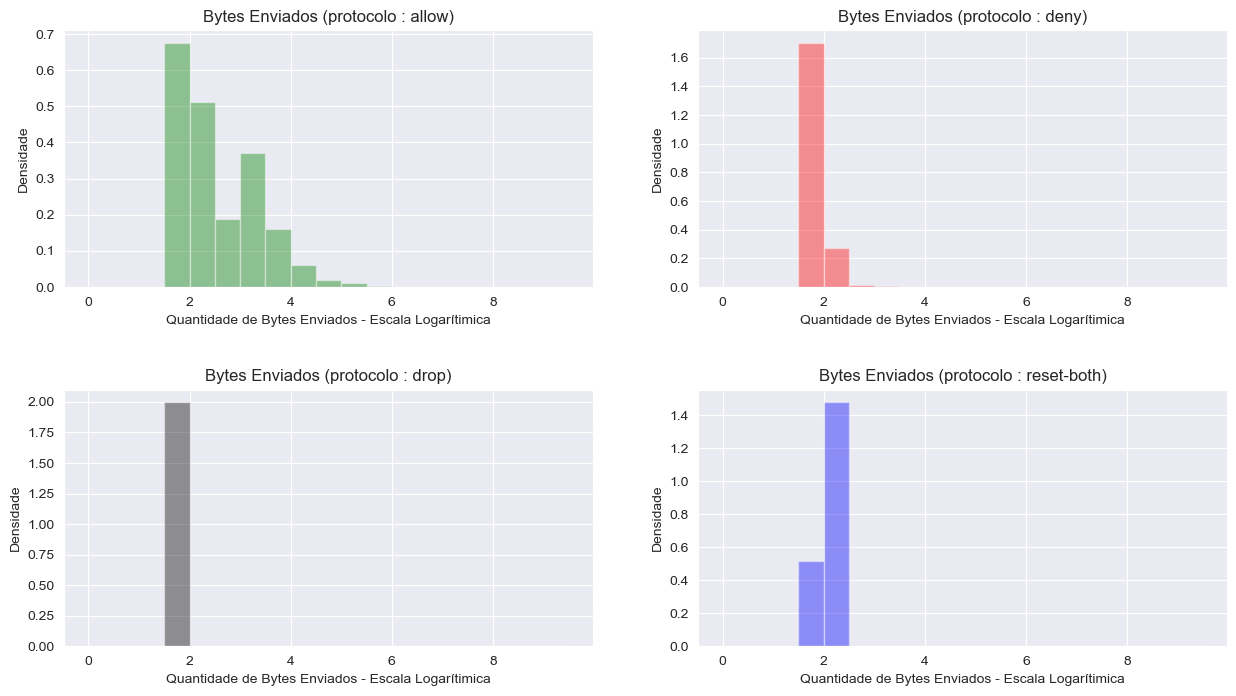

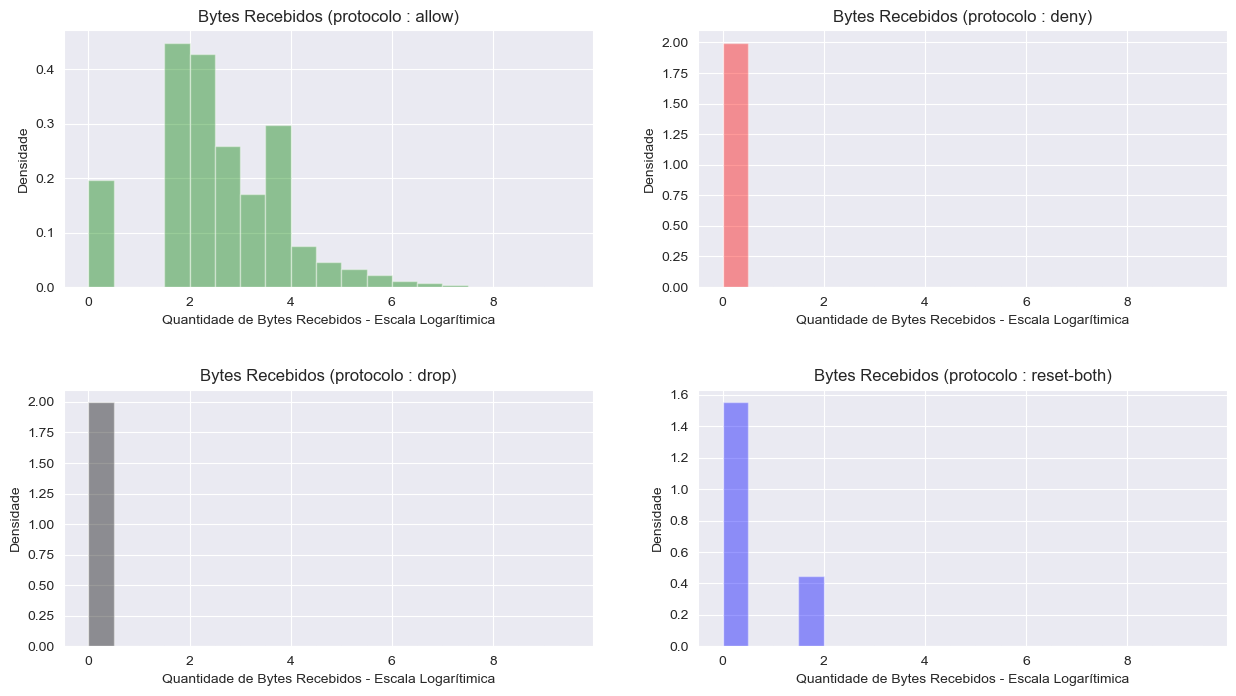

In [29]:
plt.figure(figsize=(15,8))
for action,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                                [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)
    sns.distplot(normalizing(action['Bytes Sent']),bins =  np.arange(0,10,0.5) , hist=True,
                 kde=False,norm_hist=True,rug=False , color = color )
    plt.subplots_adjust(hspace = 0.4)
    plt.xlabel('Quantidade de Bytes Enviados - Escala Logarítimica')
    plt.ylabel('Densidade')
    plt.title(f'Bytes Enviados (protocolo : {name})')
    plt.grid(True)

plt.show()

plt.figure(figsize=(15,8))
for action,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                                [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)
    sns.distplot(normalizing(action['Bytes Received']),bins =  np.arange(0,10,0.5) , hist=True, 
                 kde=False,norm_hist=True,rug=False , color = color )
    plt.xlabel('Quantidade de Bytes Recebidos - Escala Logarítimica')
    plt.ylabel('Densidade')
    plt.title(f'Bytes Recebidos (protocolo : {name})')
    plt.subplots_adjust(hspace = 0.4)
    plt.grid(True)

plt.show()

#### Quantidade de Packets enviados e recebidos

Analisou-se, mediante a normalização dos dados na escala logarítimica, a quantidade de packets enviados no fluxo de dados, inicialmente numa análise geral e posteriormente realizando uma segmentação com foco na ação realizada versus recebido ou enviado na conexão server-Client.

- Amostra geral

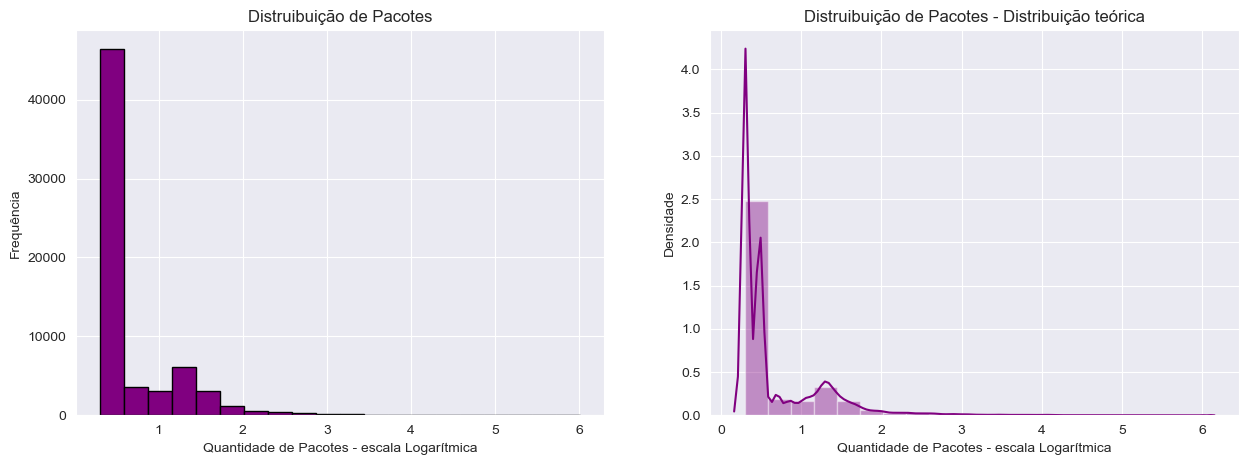

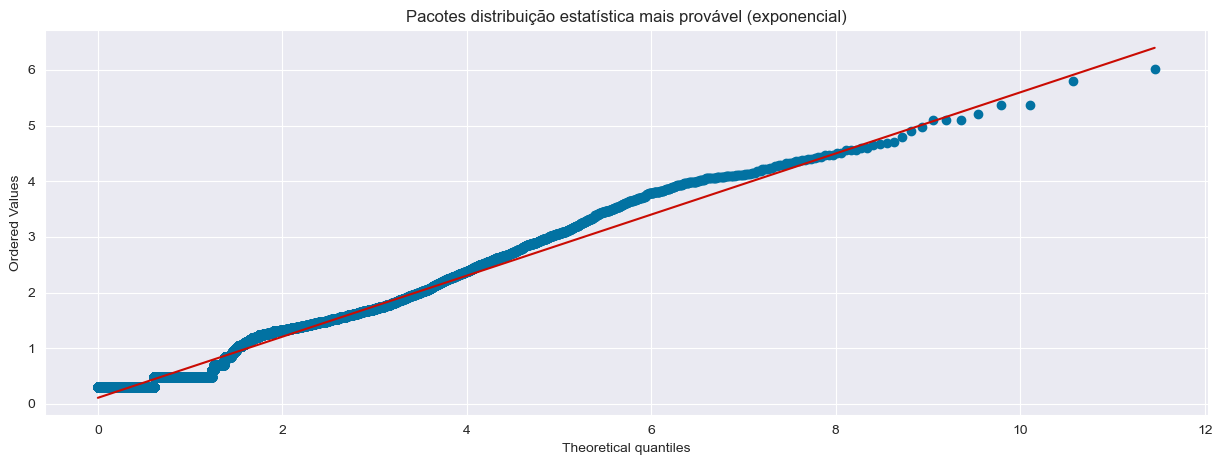

In [30]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(normalizing(dados['Packets']), bins=20,edgecolor='black',color='purple')
plt.grid(True)
plt.title('Distruibuição de Pacotes')
plt.xlabel('Quantidade de Pacotes - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sns.distplot(normalizing(dados['Packets']), hist = True , bins=20,color='purple')
plt.title('Distruibuição de Pacotes - Distribuição teórica')
plt.xlabel('Quantidade de Pacotes - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(normalizing(dados['Packets']),dist='expon',plot=plt)
plt.title('Pacotes distribuição estatística mais provável (exponencial)')

plt.show()

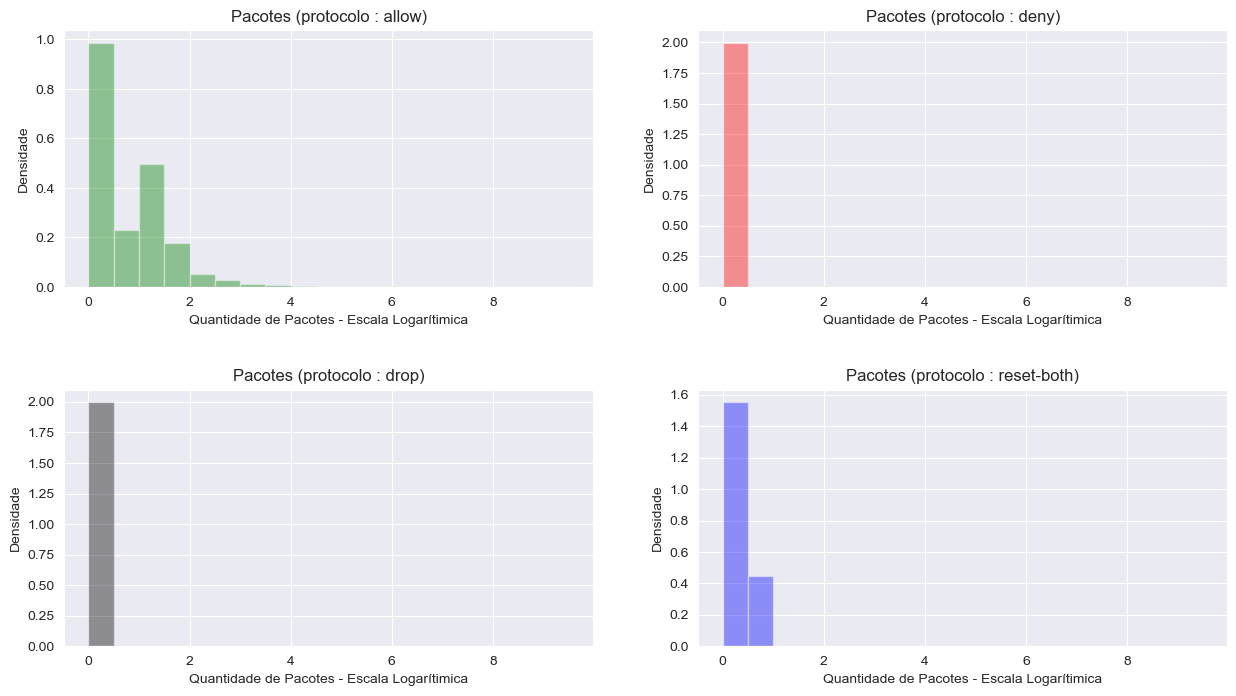

In [31]:
plt.figure(figsize=(15,8))
for action,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                                [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)
    sns.distplot(normalizing(action['Packets']),bins = np.arange(0,10,0.5) , hist=True, kde=False, 
                 norm_hist=True,rug=False , color = color )
    plt.subplots_adjust(hspace = 0.4)
    plt.xlabel('Quantidade de Pacotes - Escala Logarítimica')
    plt.ylabel('Densidade')
    plt.title(f'Pacotes (protocolo : {name})')

plt.show()

- Packets enviados e recebidos

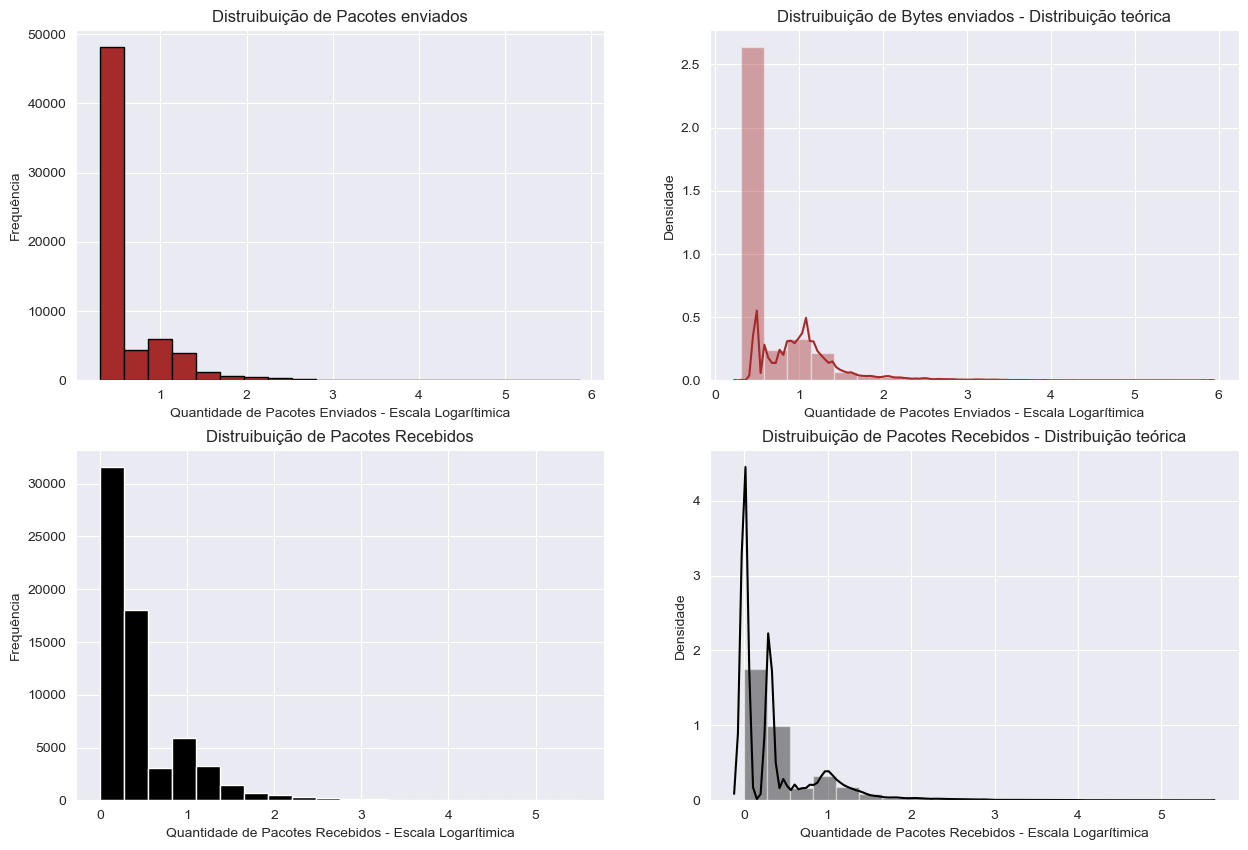

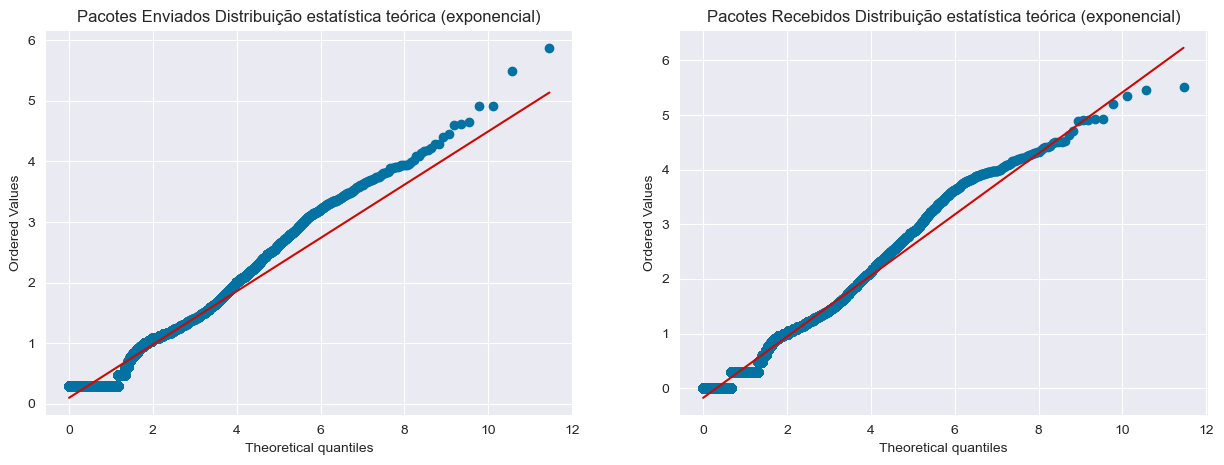

In [32]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.hist(normalizing(dados['pkts_sent']), bins=20,color='brown',edgecolor='black')
plt.xlabel('Quantidade de Pacotes Enviados - Escala Logarítimica')
plt.ylabel('Frequência')
plt.title('Distruibuição de Pacotes enviados')
plt.grid(True)

plt.subplot(222)
sns.distplot(normalizing(dados['pkts_sent']), hist = True , bins=20, color = 'brown')
plt.xlabel('Quantidade de Pacotes Enviados - Escala Logarítimica')
plt.ylabel('Densidade')
plt.title('Distruibuição de Bytes enviados - Distribuição teórica')

plt.subplot(223)
plt.hist(normalizing(dados['pkts_received']), bins=20,color='black',edgecolor='white')
plt.xlabel('Quantidade de Pacotes Recebidos - Escala Logarítimica')
plt.ylabel('Frequência')
plt.title('Distruibuição de Pacotes Recebidos')
plt.grid(True)

plt.subplot(224)
sns.distplot(normalizing(dados['pkts_received']), hist = True , bins=20, color = 'black')
plt.xlabel('Quantidade de Pacotes Recebidos - Escala Logarítimica')
plt.ylabel('Densidade')
plt.title('Distruibuição de Pacotes Recebidos - Distribuição teórica')

plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(normalizing(dados['pkts_sent']),dist='expon',plot=plt)
plt.title('Pacotes Enviados Distribuição estatística teórica (exponencial)')

plt.subplot(122)
stats.probplot(normalizing(dados['pkts_received']),dist='expon',plot=plt)
plt.title('Pacotes Recebidos Distribuição estatística teórica (exponencial)')

plt.show()

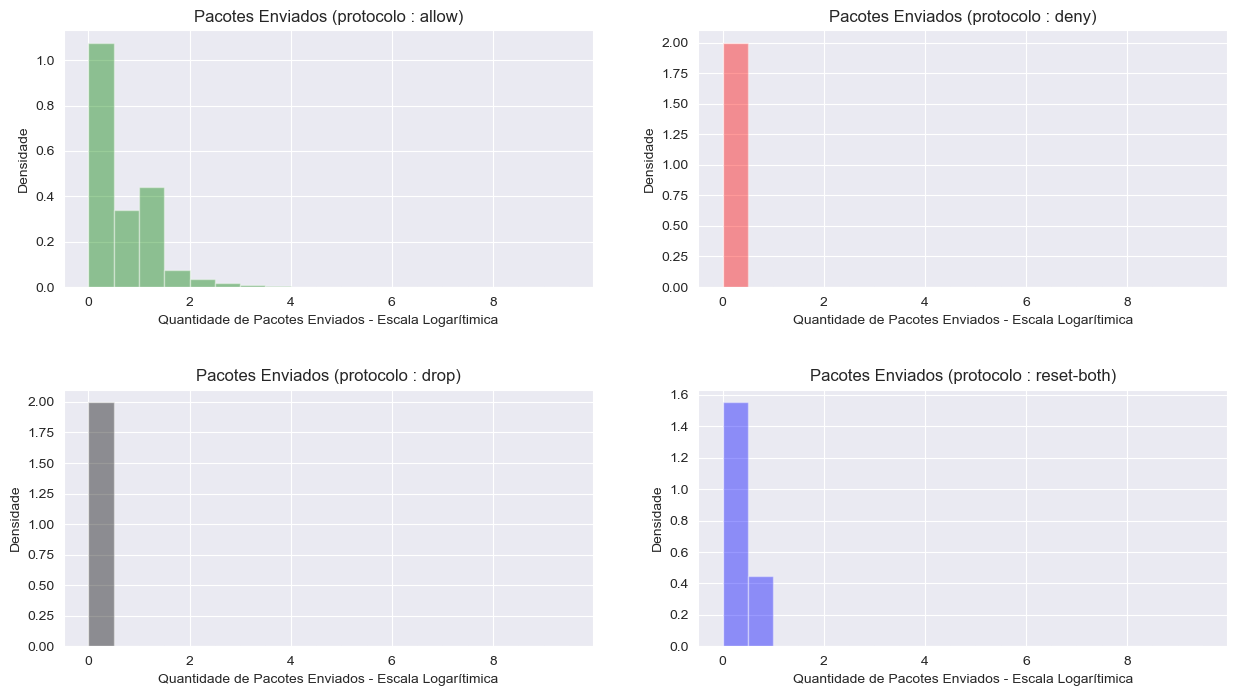

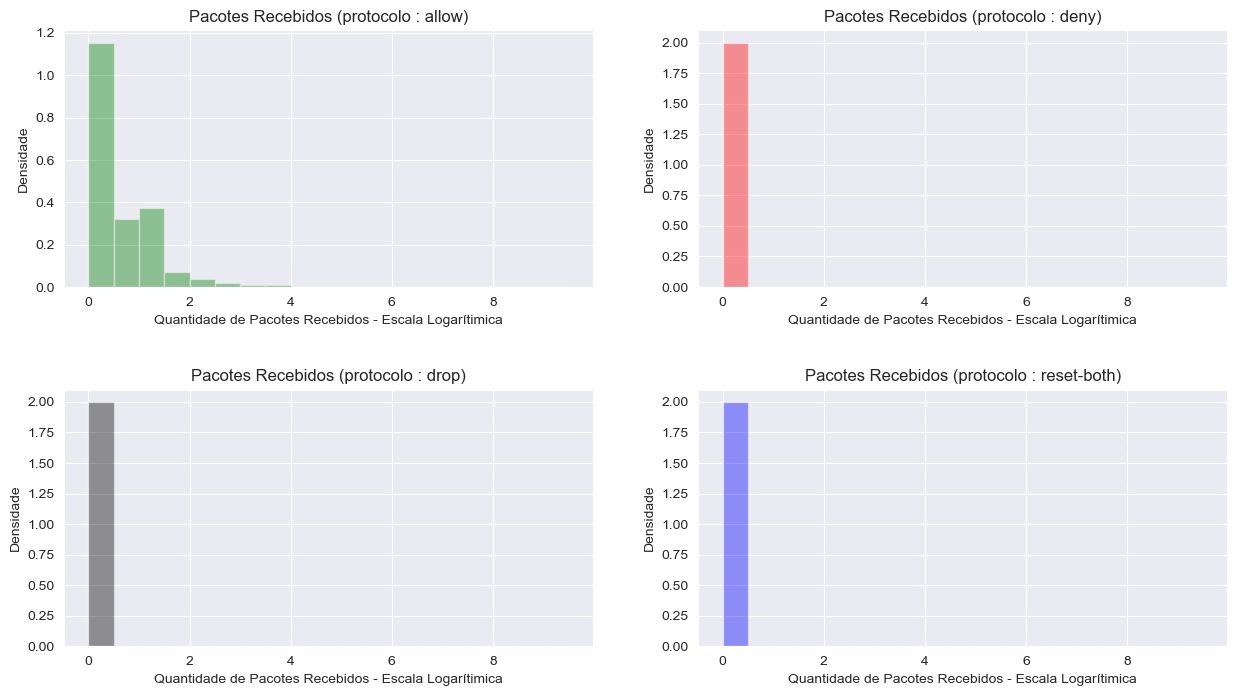

In [33]:
plt.figure(figsize=(15,8))
for action,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                                [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)
    sns.distplot(normalizing(action['pkts_sent']),bins = np.arange(0,10,0.5) , hist=True, 
                 kde=False, norm_hist=True, rug=False , color = color )
    plt.xlabel('Quantidade de Pacotes Enviados - Escala Logarítimica')
    plt.ylabel('Densidade')
    plt.title(f'Pacotes Enviados (protocolo : {name})')
    plt.subplots_adjust(hspace = 0.4)

plt.show()

plt.figure(figsize=(15,8))
for action,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                                [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)
    sns.distplot(normalizing(action['pkts_received']),bins = np.arange(0,10,0.5) , hist=True, 
                 kde=False,norm_hist=True,rug=False , color = color )
    plt.xlabel('Quantidade de Pacotes Recebidos - Escala Logarítimica')
    plt.ylabel('Densidade')
    plt.title(f'Pacotes Recebidos (protocolo : {name})')
    plt.subplots_adjust(hspace = 0.4)
    
plt.show()

Analisando o conjunto de gráficos pares "Pacotes recebidos" e "Pacotes enviados" em cada tipo de ação tomada observamos um comportamento semelhante ao do que ocorre com "Bytes recebidos" e "Bytes enviados".

- Na condição "Allow" : Há uma troca de pacotes/bytes , ou seja, pacotes/bytes são enviados e recebidos, ambos com o um comportamento próximo ao exponencial. Esta troca é esperada, visto que na condição "allow" não há a barreira que impossibilita o fluxo de dados/bytes , permitindo essa comunicação.

- Na condição "Deny" : Há pacotes/bytes enviados porém há uma tendencia de nenhum ser recebido. Condizente com aquilo que se espera da condição deny, visto que quando os dados recebidos são identificados como danosos, uma ameaça para o sistema, eles são barradas pelo Firewall.

- Na condição "Drop" : Há pacotes/bytes enviados porém há uma tendencia de nenhum ser recebido. CCondizente com aquilo que se espera da condição drop, visto que as a informações recebidas são 'dropadas' pelo Firewall.

- Na condição "Reset-both" :  Há mais pacotes/bytes enviados do que recebidos. Sendo a quantidade de s recebidos predominantemente próximos de zero.


#### Tempo decorrido na ação tomada pelo Firewall

Analisou-se, mediante a normalização dos dados na escala logarítimica, o tempo em segundos para a ação tomada pelo Firewall na conexão entre Client-Server.

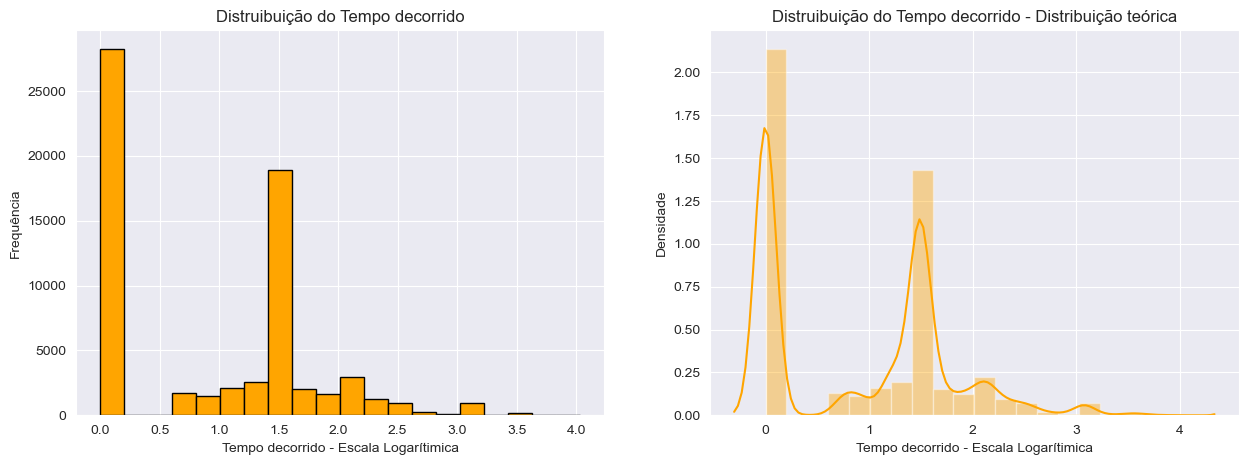

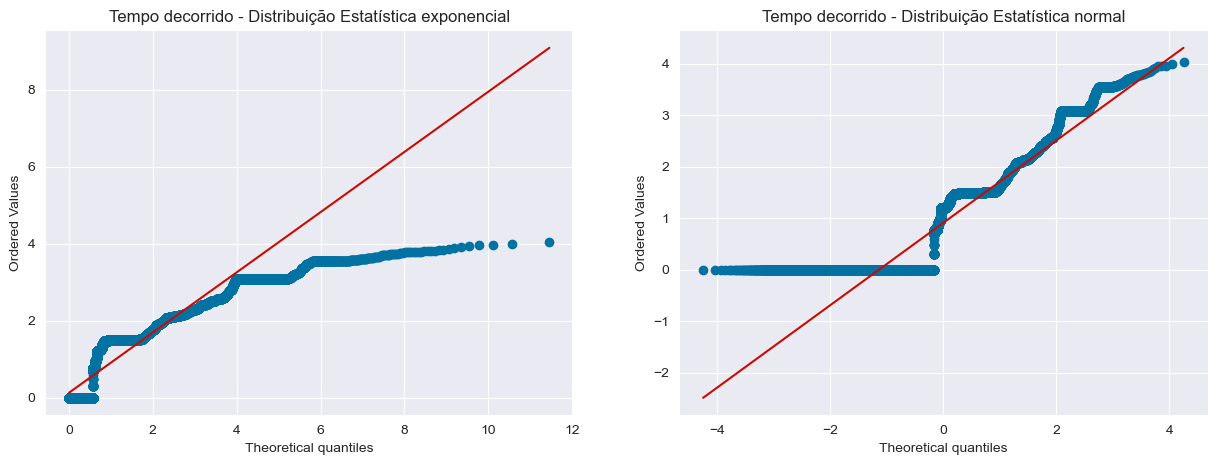

In [34]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(normalizing(dados['Elapsed Time (sec)']), bins=20,edgecolor='black',color='orange')
plt.grid(True)
plt.xlabel('Tempo decorrido - Escala Logarítimica')
plt.ylabel('Frequência')
plt.title('Distruibuição do Tempo decorrido')

plt.subplot(122)
sns.distplot(normalizing(dados['Elapsed Time (sec)']), hist = True , bins=20,color='orange')
plt.xlabel('Tempo decorrido - Escala Logarítimica')
plt.ylabel('Densidade')
plt.title('Distruibuição do Tempo decorrido - Distribuição teórica')

plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(normalizing(dados['Elapsed Time (sec)']),dist='expon',plot=plt)
plt.title('Tempo decorrido - Distribuição Estatística exponencial')

plt.subplot(122)
stats.probplot(normalizing(dados['Elapsed Time (sec)']),dist='norm',plot=plt)
plt.title('Tempo decorrido - Distribuição Estatística normal')

plt.show()

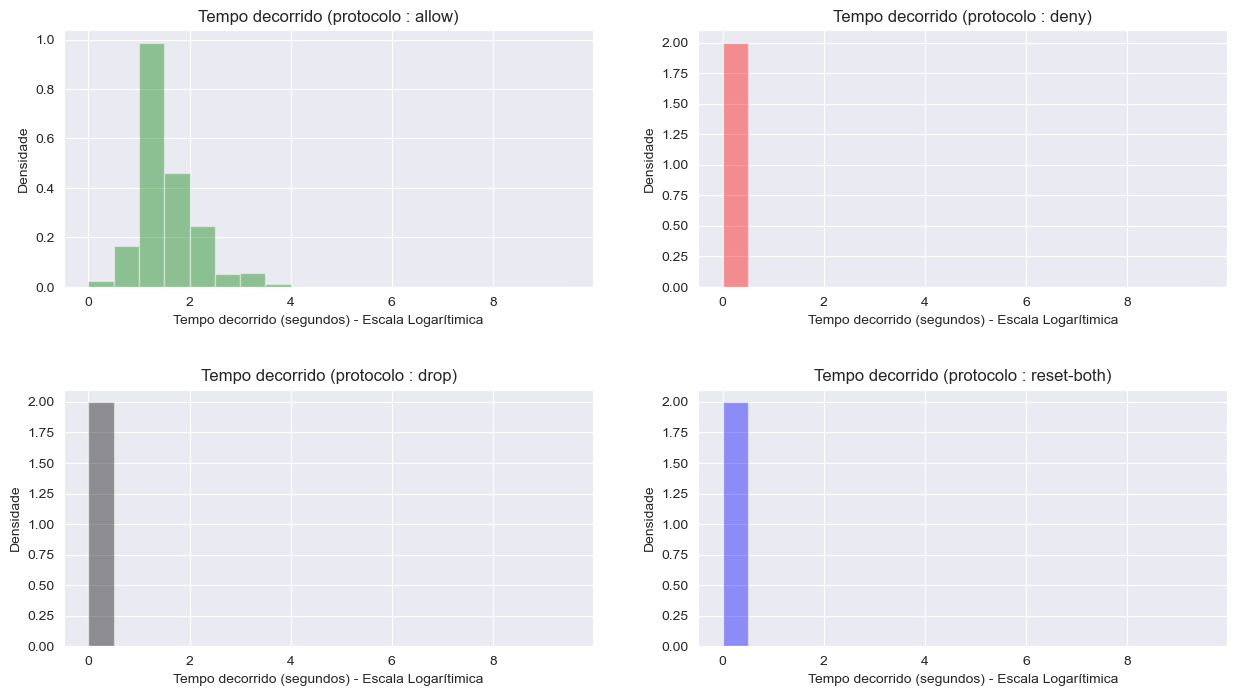

In [35]:
plt.figure(figsize=(15,8))
for action,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                                [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)
    sns.distplot(normalizing(action['Elapsed Time (sec)']),bins = np.arange(0,10,0.5) , 
                 hist=True, norm_hist=True,kde=False, rug=False , color = color )
    plt.subplots_adjust(hspace = 0.4)
    plt.xlabel('Tempo decorrido (segundos) - Escala Logarítimica')
    plt.ylabel('Densidade')
    plt.title(f'Tempo decorrido (protocolo : {name})')

plt.show()

Analisando os gráficos acima vemos que o tempo das ações drop e deny tem uma resposta praticamente imediata do sistema. A condição reset-both , também possui uma resposta predominantemente instantânea, visto que estes últimos três protocolos recebem negação, por suas ações serem constituídas por ameaças ao computador. Já na condição de allow, como o esperado, o tempo decorrido para a troca de informações/dados é maior, sendo melhor distribuído. Notou-se que a distruibuição do tempo decorrido, não se adequa corretamente a um modelo estatístico de probabilidade conhecido, devido aos seus picos relativamente distantes. 

### Análise cruzada de dados numéricos

<div id="cruzada"></div>

Segmentou-se o conjunto de dados de acordo com a ação tomada pelo Firewall (allow,deny,drop e reset-both), e nisso realizou-se comparação por scatterplots, para analisar-se a correlação entre esses fatores, e assim analisar possíveis explicações por via gráfica e estatística que auxiliem na construção do modelo.

- Matriz de Correlação

Com este artifício gráfico pode-se ver de maneira primária quais atributos podem estar correlacionados de maneira direta e a partir dessa fato tentar entender certas associações presentes no conjunto de dados numéricos.

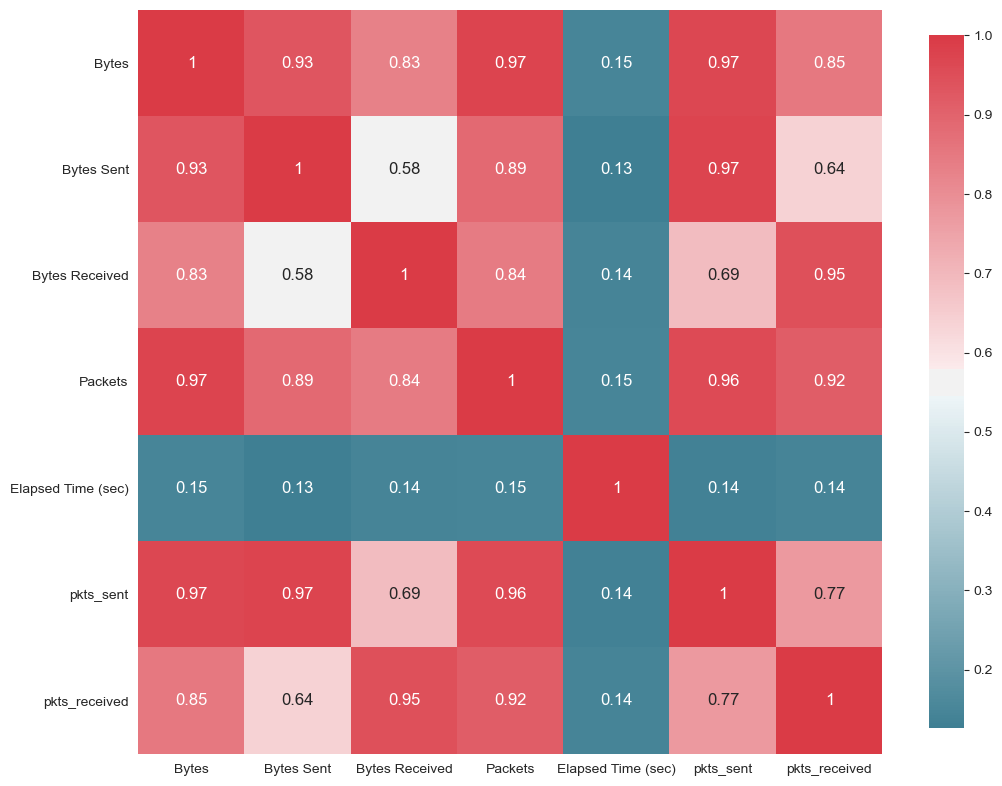

In [36]:
correlacao_numerica(numericos)

- Bytes enviados versus Bytes recebidos

Com auxílio de gráficos de dispersão, pode-se entender a correlação e associação entre o fluxo de dados.

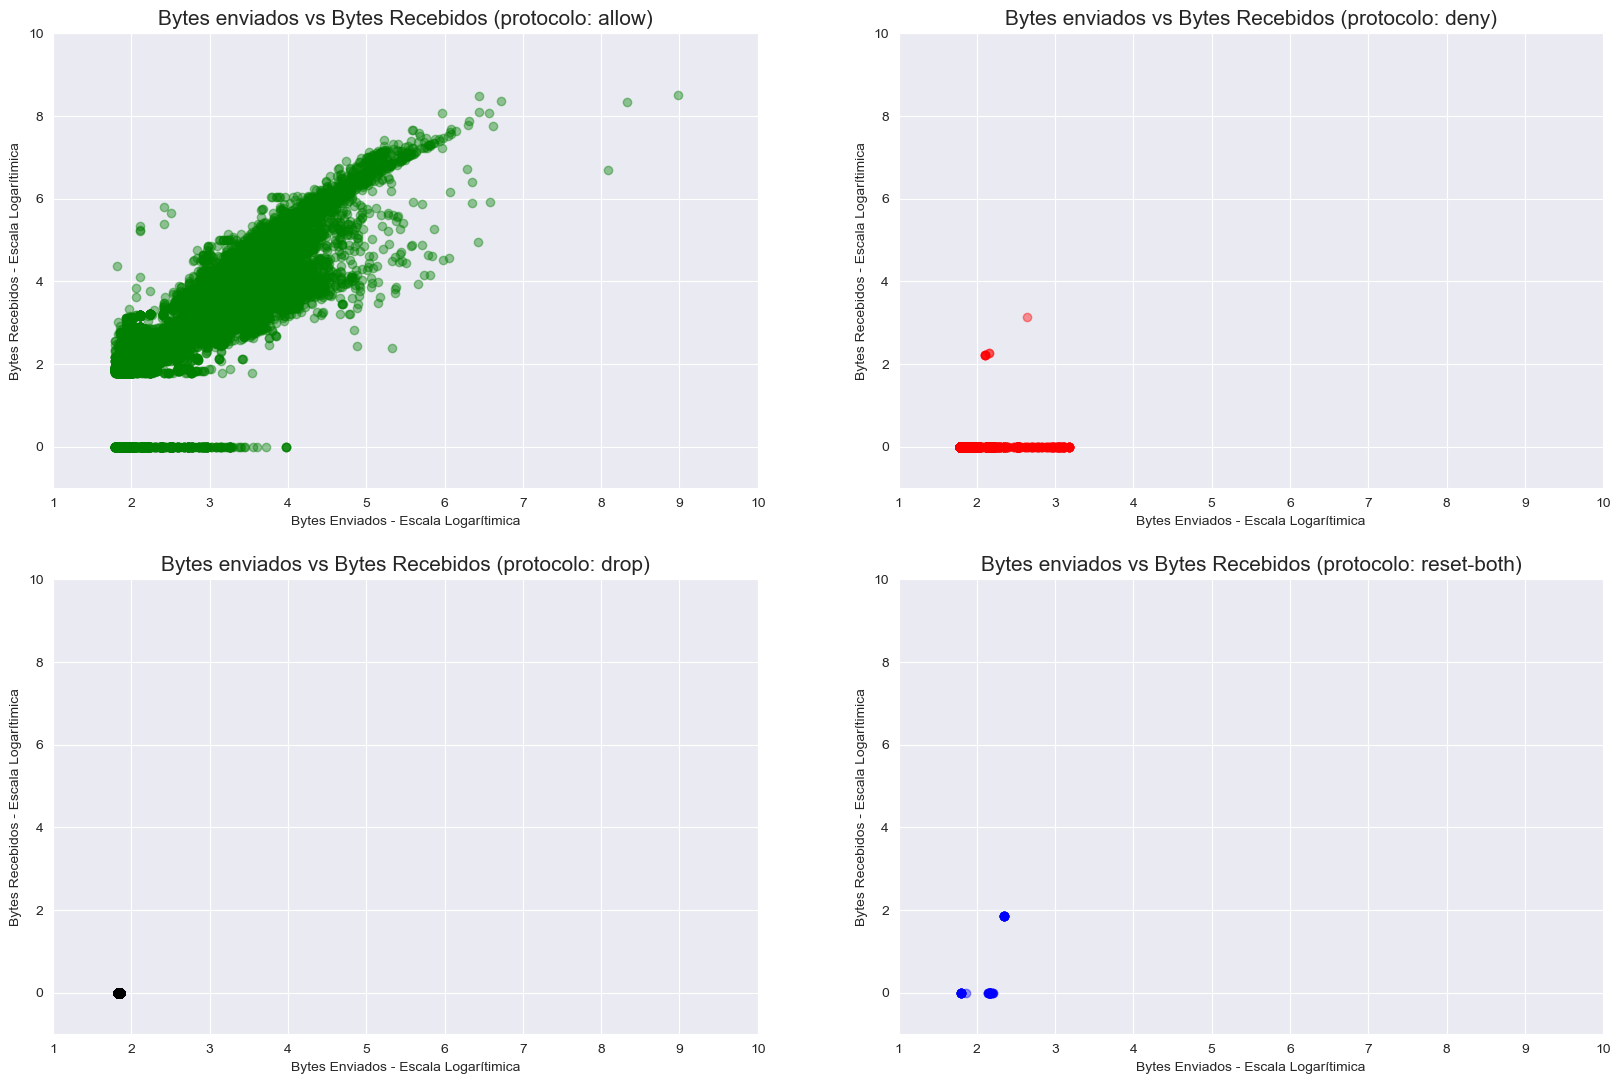

In [37]:
plt.figure(figsize=(20,13))
for data,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                               [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)                     
    plt.scatter(normalizing(data['Bytes Sent']),
                normalizing(data['Bytes Received']),alpha=0.4,color=color)
    plt.title(f'Bytes enviados vs Bytes Recebidos (protocolo: {name})',size=15)
    plt.xlabel('Bytes Enviados - Escala Logarítimica')
    plt.ylabel('Bytes Recebidos - Escala Logarítimica')
    plt.ylim([-1,10])
    plt.xlim([1,10])
plt.show()                         

- Packets enviados versus Packets recebidos

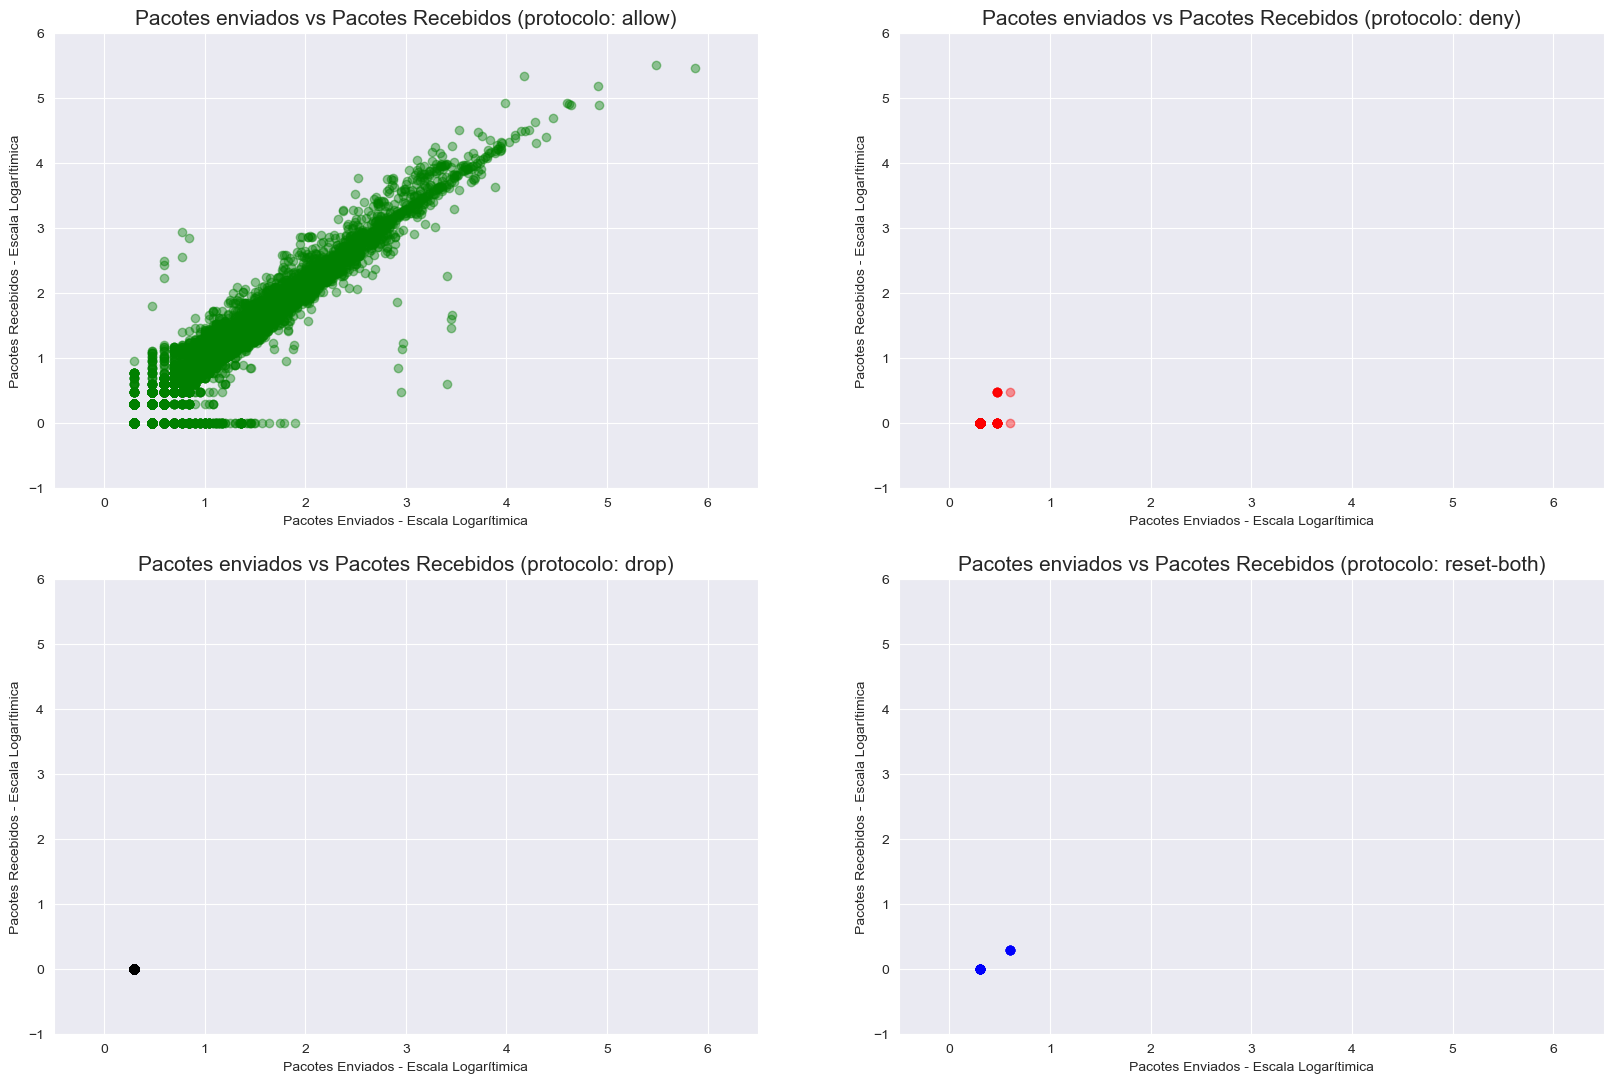

In [38]:
plt.figure(figsize=(20,13))
for data,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                               [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)                     
    plt.scatter(normalizing(data['pkts_sent']),
                normalizing(data['pkts_received']),alpha=0.4,color=color)
    plt.title(f'Pacotes enviados vs Pacotes Recebidos (protocolo: {name})',size=15)
    plt.xlabel('Pacotes Enviados - Escala Logarítimica')
    plt.ylabel('Pacotes Recebidos - Escala Logarítimica')
    plt.xlim([-0.5,6.5])
    plt.ylim([-1,6])
plt.show()      

- Bytes em tráfego versus tempo decorrido

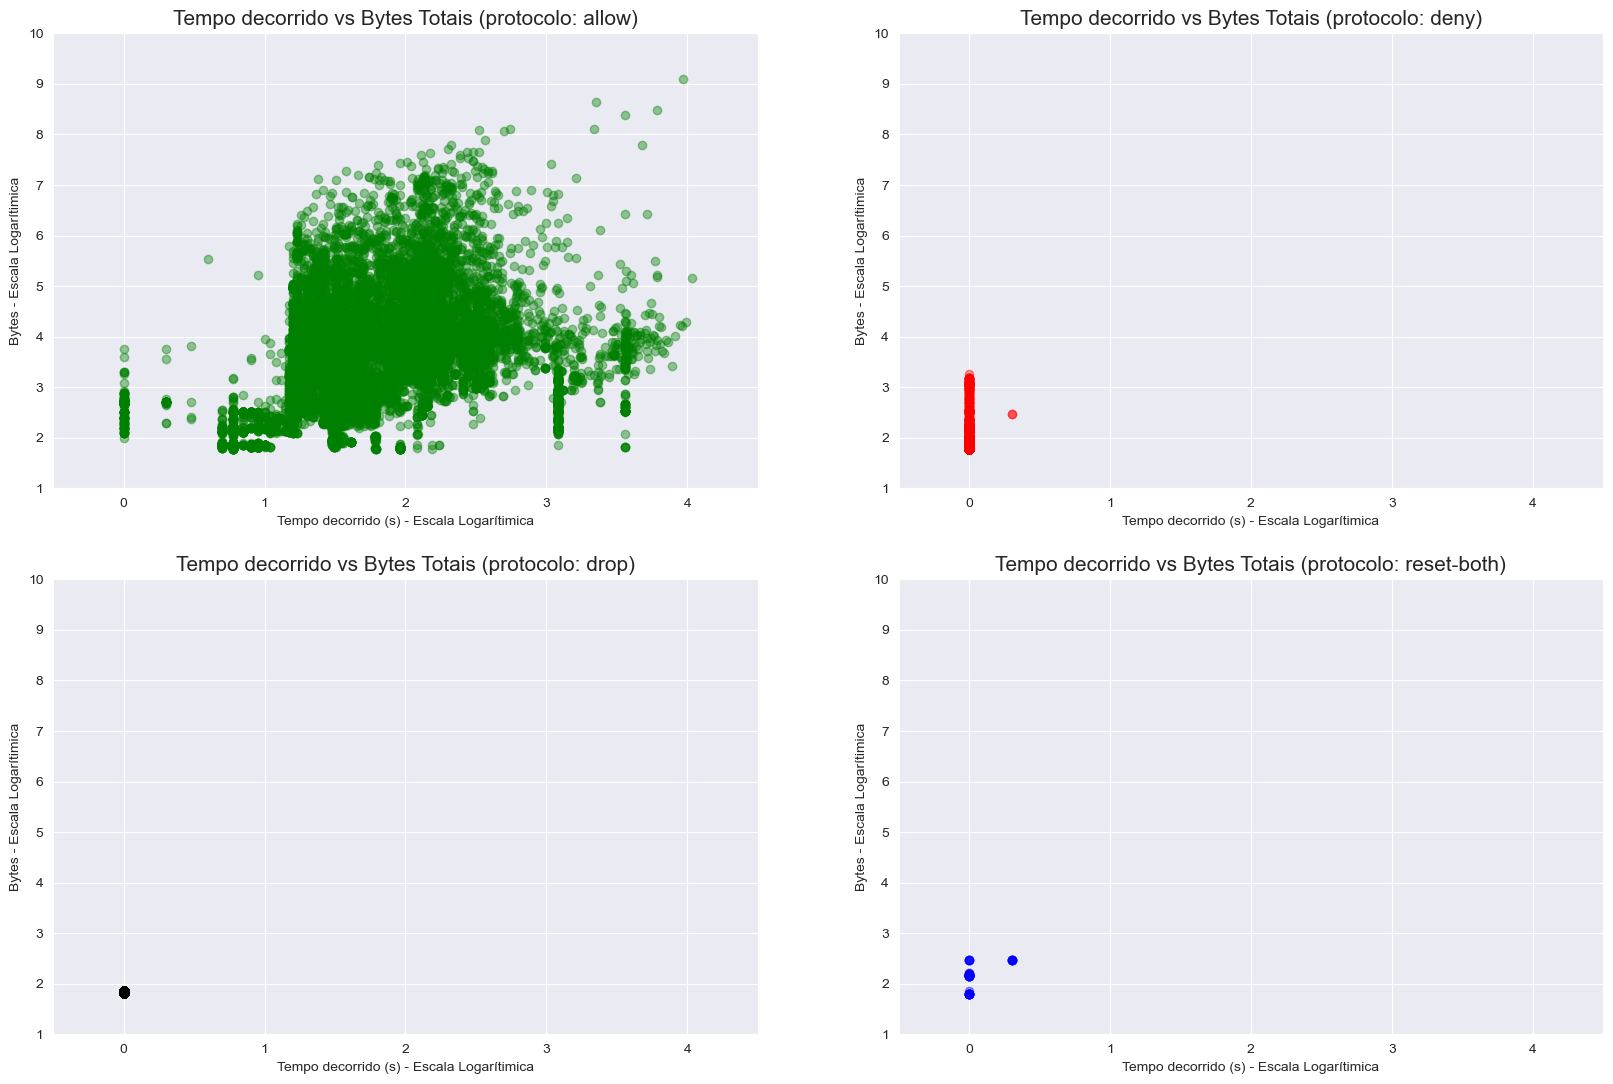

In [39]:
plt.figure(figsize=(20,13))
for data,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                               [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)                     
    plt.scatter(normalizing(data['Elapsed Time (sec)']),
                normalizing(data['Bytes']),alpha=0.4,color=color)
    plt.title(name)
    plt.title(f'Tempo decorrido vs Bytes Totais (protocolo: {name})',size=15)
    plt.xlabel('Tempo decorrido (s) - Escala Logarítimica')
    plt.ylabel('Bytes - Escala Logarítimica')
    plt.ylim([1,10])
    plt.xlim([-0.5,4.5])
plt.show()      

Pelos gráficos de dispersão acima, nota-se que nos fluxos de dados permitidos (allow) pelo Firewall, a quantidade de bytes enviados e recebidos possui uma relação, devido a liberdade de comunicação entre interface Client e Server.

Todavia, nos protocolos Deny, Drop e Reset-both, vemos que no primeiro, a grande maioria dos dados enviados, logo em seguidas são negados e não recebem dados via servidor, devido a suspeita do Firewall de Malware, com raras exceções de bytes recebidos, estes muito provavelmente aceitos após confirmação do usuário. Já para os protocolos Drop e Reset-Both, não ocorre tentativa de recebimento de dados em bytes.

## Concluindo Analise Exploratória

<div id="conclusao1"></div> 

Conforme retiramos das analises gráficas e analíticas feitas , é valido sintetizar alguns pontos chaves , para melhor entendimento da base de dados e da pergunta que queremos responder.

**A base de dados está limpa e não possui valores nulos, ou algum dado fora dos conformes (Outliers notórios) , como por exemplo bytes negativos ou uma porta sem identificação numérica.**

Fora averiguado também que a maior parte dos dados numéricos, teve comportamento modelado por uma distribuição estatística do tipo **Exponencial**,sendo esta  uma distribuição que se caracteriza por ter uma função de taxa de falha constante. A distribuição exponencial é a única com esta propriedade. Ela é considerada uma das mais simples em termos matemáticos, mostrando também uma clara assimetria em alguns desses dados armazenados, representando sobretudo a maior concentração de dados nos expoentes até a centena.

Dessa maneira segmentou-se os fatores mais importantes de acordo com os protocolos de ação do Firewall:

* **Allow (Permissão de conexão Client-Server):**

    `Source Port Client`: Notou-se um grande número de portas no intervalo das portas consideradas de interface Web, isto é as portas disponíveis a Browsers ou desenvolvedores, demonstrando assim, que um Software de detecção de Malware, deve estar sujeito principalmente a permissão de tráfego.
    
    `Destination Port Client`: As ações liberadas por protocolo, se restringiram praticamente as portas 53, 80 e 443, estas sendo Well-Known Ports, o que justifica o fato de estas ações passarem pelo crivo de portas registradas e conhecidas pelo sistema.
    
    `Source Port NAT`: Quase não houveram ações de permissão destinadas a esse protocolo, muito por conta da tradução do endereço de rede não se aplicar, em muitos casos, a portas de desenvolvedores.
    
    `Destination Port NAT`: As ações liberadas por protocolo, se restringiram praticamente as portas 53, 80 e 443, estas sendo Well-Known Ports, o que justifica o fato de estas ações passarem pelo crivo de portas registradas e conhecidas pelo sistema, muito parecido com o protocolo realizado pela inteiração Cliente.
    
    `Bytes`: Retomando a analise feita [aqui](#Numerico) , fora observado que a maior parte dos Bytes trafegados, mais concentrados principalmente nos Recebidos, foram do domínio do protocolo de permissão, o que se justifica, devido o não impedimento de conexão realizado pelo Firewall, permitindo o tráfego dos dados entre Client e Server.
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste, em basicamente o "empilhamento" de bytes trafegados de maneiras simultaneamente pelo endereço de rede.
    `Tempo decorrido`: Como mais Bytes e Packets foram realizados por esse protocolo, o tempo de duração de uma análise por vezes foi maior, visando sobretudo a verificação da conexão.
    
    
* **Deny (Negação de conexão Client-Server):**

    `Source Port Client`: Notou-se um grande número de portas no intervalo das portas consideradas de interface Web, isto é as portas disponíveis a Browsers ou desenvolvedores, com demonstração principal de que possíveis ameaças podem estar localizadas em portas não conhecidas ou registradas, e sim na parte aberta a desenvolvedores Web.
    
    `Destination Port Client`: As ações de Deny, foram quase que exclusivas e bem divididas nas portas de open Source a Desenvolvedores, seguindo à métrica dessas portas conforme descrito.
    
    `Source Port NAT`: Como as maiorias das ações tomadas nesse endereço foram majoritariamente na porta 0, e dentre essas, a ação de deny foi a mais proeminente, mostrando um possível padrão observável nesse certame.
    
    `Destination Port NAT`: Fora observado para o protocolo Deny na porta de destinação de endereço de rede, a porta mais notória nesse sentido, foi  novamente a porta de número 0, indicando um protocolo universal para tais ações sobre este protocolo.
    
    `Bytes`: Averiguou-se que devido a natureza deste protocolo, a maioria dos Bytes em tráfego foram aqueles que foram enviados, devido que ao bloqueio realizado pelo software, devido a detecção de Malware.
    
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste em um conglomerado de bytes e estando restrito a esse sentido.
    
    `Tempo decorrido`: O tempo decorrido foi praticamente padronizado para ações que não a de "Allow", devido a tomada de decisão mais rápida do software após detecção de Malware.
    
* **Drop (Desligamento simultâneo de interface Client-Server)**:

    `Source Port Client`: Quase não observou-se este protocolo na inteiração Cliente-Server, demonstrando a possibilidade de ativação deste em casos mais específicos de envio de dados do Servidor para o cliente e não o contrário.
    
    `Destination Port Client`: Tem proeminência na porta 445 de destinação, ressaltando que possivelmente ações danosas podem estar associadas a essa porta e sendo esta responsável pela maioria dos casos de desligamento simultâneo.
    
    `Source Port NAT`: Teve a maioria das ações tomadas pela porta 0, quase que como ação protocolar, deixando dessa forma, a ação de Drop como a segunda mais comum nessa porta.
    
    `Destination Port NAT`: Fora repetido o comportamento observado no protocolo anterior, sendo a ação de Drop a segunda mais comum  na porta 0, a mais proeminente em ocorrências nesse âmbito.
    
    `Bytes`: Averiguou-se que devido a natureza deste protocolo, a maioria dos Bytes em tráfego foram aqueles que foram enviados, devido que ao bloqueio realizado pelo software, devido a detecção de Malware.
    
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste em um conglomerado de bytes e estando restrito a esse sentido.
    
    `Tempo decorrido`: O tempo decorrido foi praticamente padronizado para ações que não a de "Allow", devido a tomada de decisão mais rápida do software após detecção de Malware.

* **Reset-Both (Resetar simultâneamente a interface) :**

     Não foram Observados dados suficientes para mapeamento do comportamento dos features em função dessa ação, devido a sua pequena ocorrência no Dataset.
        
Esses fatos observados nos features numéricos, reforçam a necessidade de uma normaliazção de valores utilizada , logarítimica.

Seguimentando esses dados pela ação tomada , observou-se que os protocolos drop , denny e reset-both , os dados enviados bytes/packets foram feitos de maneira quase que unidirecional (Interface Client-Server), visto que o Firewall barrou o recebimento de dados dessa porta, corraborando para sua função de proteção do sistema.

Por outro lado , assim como esperado , aqueles que receberam protocolo allow tiveram recebimento e envio de dados de maneira bidirecional, devido a permissão do Firewall. Como esperado , as operações no protocolo Allow , demoraram mais tempo do que nas outras ações , devido a troca de dados realizada.

## Iniciando a  Construção do modelo 

<div id="inicioModelo"></div>

Analisando os tipos de dados contidos em nosso dataset, observamos que para o modelo preditivo alguns valores enquadram-se na característica de uma dados categórico. Para relembrar:

* `Dados qualitativos ou categóricos` são aqueles  e ao serem transformados em valores numéricos não possuem uma lógica ou sentido agregado. Por exmeplo as cores dos olhos, não dizemos que a cor de olho castanho é maior que a cor de olhos azul.  

* `Dados quantitativos ou numericos` são aqueles que de certa forma impõem ordem. Por exemplo a idade ou altura de uma pessoa.

Dito isto , vamos analisar novamente os tipos de dados contidos em nossa base de dados:

In [90]:
dados.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  object
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object

Quando analisamos novamente o significado de cada label/ coluna do dataset (você pode conferir novamente [aqui](#Base)), retiramos que Source Port , Destination Port , NAT Source Port , NAT Destination Port assim como o nosso target Action , adequam-se melhor as características de dados categóricos. 

Vamos portanto fazer essa transformação de tipo de dado:

In [18]:
#Convertendo features e valores categoricos de acordo com o modelo.
#Copiando dataframe inicial para não afetar análise de valores anteriores
data_model = dados.copy()

#convertendo valores das portas em categóricos 
data_model['Source Port'] = data_model['Source Port'].astype('category')
data_model['Destination Port'] = data_model['Destination Port'].astype('category')
data_model['NAT Source Port'] = data_model['NAT Source Port'].astype('category')
data_model['NAT Destination Port'] = data_model['NAT Destination Port'].astype('category')

#Transformando target em categórico
data_model['Action'] = data_model['Action'].astype('category')

Entenderemos um pouco melhor mais a frente que para a utilização de modelos preditivos , a transformaçao do target Action em valores numéricos representantes das 4 classes (allow , deny , drop e reset-both) é fundamental para seu funcionamento.

<div id='Sklearn1'></div>

In [19]:
#Convertendo o target em numérico par auxiliar a predição

#instanciando conversor
transformer = LabelEncoder()
data_model.Action = data_model.iloc[:,[4]].apply(lambda x: transformer.fit_transform(x))

# vizualizando transformação:
data_model.Action.value_counts()

# Onde 0 = Allow , 1 = Deny , 2 = Drop , 3 = reset-both.

0    37640
1    14987
2    12851
3       54
Name: Action, dtype: int64

Os demais dados de nosso dataset são dados numéricos , pela definição já feita anteriormente. Ao observarmos a distribuição desses dados , como já concluido em [concluindo analise exploratória](#conclusao1) , os mesmos apresentam grade intervalo de valores, alguns poucos tendo valores muito superiores a maioria.

A normalização de dados que possuem grande variação de ordem de grandeza é uma pratica para evitar que seu algoritmo fique enviesado para as variáveis com maior ordem de grandeza , atribuindo a elas um maior peso durante a predição. 

A normalização aplicada a seguir tem como objetivo a transformação de todas as variáveis na mesma ordem de grandeza.

<br>
<center><img src="firewall_assets/normalized.jpeg" width=800 style="float: center; margin: 0px 0px 10px 10px"></center>
<br>

In [20]:
#Normalizando dados numéricos para melhor processamento
scaler = MinMaxScaler()

# numericos = numericos.apply(normalized.fit_transform)

x = scaler.fit_transform(numericos)
data_model.iloc[:,5:] = scaler.transform(data_model.iloc[:,5:])

# Features normalizados para split da predição
data_model_features = data_model.copy()
data_model_features = data_model_features.drop('Action',axis=1)

In [21]:
data_model_features.head(3)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003
1,56258,3389,56258,3389,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028
2,6881,50321,43265,50321,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003


Após as transformações necessárias na base de dados e buscando realizar a predição da decisão tomada pelo Firewall (allow , deny , drop ou reset-both) de acordo com as portas escolhidas para interação (Cliente-Server) devemos escolher modelos de maching learning que sejam capazes de melhor prever a ação do Firewall perante novas interações (Cliente-Server).

## O que é Machine Learning ?
### Uma breve síntese sobre o aprendizado de máquina.

<div id= "ml"></div>

Segundo [Andreas C.Muller](http://amueller.github.io) e [Sarah Guido](https://www.linkedin.com/in/sarahguido/), Machine learning trata-se da extração de conhecimento de um conjunto de dados. Dessa forma, esse campo do conhecimento é um interconexão entre os ambitos da estatística , algebra linear , calculo , geometria analítica , inteligência artificial e ciência da computação, unidos com o intuito de criar algorítimos com o intuito mor de realizar predições ou analise de um sistema de dados de maneira automatizada com maior índice de acerto possível.

Nos dias de hoje , essa aplicação está presente desde o uso pessoal , por exemplo identificação de fotos automaticas do google (image tagging) até as aplicações médicas como a diferenciação de diagnósticos mais complicados , superando por vezes o crivo de um médico.

De maneira simplificada , o aprendizado de máquina consciste em fornecer um conjunto de dados estruturado ou não (por exemplo uma tabela é um conjunto estruturado e um conjunto de audios é um não estruturado) em conjunto e extraindo desses predições qualitativas ou quantitativas por meio de padrões matemáticos e estatísticos que assegurem com a maior eficiência possível uma predição adequada.

Dessa forma , alguns conceitos iniciais se tornam necessários para a melhor familiarização com esse tipo de algorítimo.

* `features` : atributos que caracterizam o elemento a ser previsto. Exemplo: idade , localização e quantidade de quartosde uma casa.


* `target/label`: a variável que se quer predizer (em caso de supervised learning*). Exemplo : preço real de uma casa.


* `Conjunto de treino (training set)` : uma partição do dataset total com o intuito de "ensinar" o modelo escolhido a tomar decisões baseado nos padrões encontrados.


* `Conjunto de teste (test set)` : a outra partição do dataset com o intuito de avaliar a eficacia de predição e capacidade de generalização frente a nova situações que não contidas no conjunto de treino.


* `Hiperparâmetros ` : basiacamente parâmetros inerentes a cada modelo que podem auxiliar aumentando ou diminuindo sua complexidade de acordo com a situação desejada para a predição.


Algorítimos de decisão:


* `Algorítimo de regressão` : consiste em prever um dataset com target numérico quantitativo.


* `Algorítimo de classificação` : consiste em prever um dataset com target qualitativo.

#### Modelos preditivos 

Existem diversos tipos de modelo no aprendizado de máquina , com o intuito de prever um determinado target, cada um com suas vantagens , desvantagens e especificidades , ficando a critério do engenheiro de dados responsável julgar o melhor modo para a situação proposta e assim encontram os melhores parâmetros para a construção do modelo. 

Exemplo: Support Vector Machine , Linear Regression , Logistic Regression , Descision Tree , K-NNeighbors , Neural Networks e muito mais.

#### Sobre a qualiadade da predição

Apesar de se analisar os targets classificados e comparados com os esperados existem outras maneiras de avaliação da eficacia de um modelo , em geral os mais conhecidos além do clásico "Score" , são accuracy , recall, precision , false positive rate e f1-Score.

Mas antes de explicar cada um deles, é necessário entender conceitos de predição, aqui adotaremos como simplicidade a explicação para targets binários , mas ainda sendo válido para  multiclass, como : Falso positivo (FP), falso negativo (FN) , verdadeiro positivo (TP),  verdadeiro negativo (TN).

<br>
<center><img src="firewall_assets/matriz_confusao.png" width=350 style="float: center; margin: 0px 0px 10px 10px"></center>

Accuracy é basicamente uma porcentagem sobre o que o modelo preveu corretamente sobre o conjunto universo.

$$Accuracy = \frac{TN+TP}{TN+TP+FP+FN}$$

Recall (True positive rate) fração de todas as instancias positivas que um classificador corretamente previu sobre todas as instâncias positivas.

$$Recall = \frac{TP}{TP+FN}$$

Precision é a fração positivos que foram previstos corretamente sobre o total de positivos preditos.

$$Precision = \frac{TP}{TP+FP}$$

False positive rate (Especificity/ FPR) qual fraçao de todas as instâncias negativas que o classificador incorretamente identificou como positivas.

$$FPR = \frac{FP}{TN+FP} $$

F1-Score  combinando precision e recall em um único número com objetivo de mesclar suas duas propriedades.

$$F1 -Score = \frac{2*Precision*Recall}{Precision+Recall} $$


_Obs: A propósito em nossos modelos o FPR Score terá um papel determinante na qualidade do modelo , visto que que para um Firewall classificar erroniamente uma ameça como algo não danoso ao computador, seu propóstito de proteção a máquina é perdido, sendo este um tipo de erro que não poed ser cometido. O FPR Score como já dito , avalia a quantiade de negativos no nosso caso drop e deny erroniamente como possitivo (allow) , permitindo assim que instâncias deletérias adentrem o computador._

Em casos de sistemas multiclass existem outras formas de avaliara a eficacia de um modelo como as comparações micro average e macro average. Eles basicamente combinam as metodologias de score acima, em modelos de classificação com targets não binários.

$$Micro-Average-of-Precision  = \frac{\sum_{i=1}^{n}TP_i}{\sum_{i=1}^{n}TP_i+\sum_{i=1}^{n}FP_i}$$
 
 

$$Micro-Average-of-Recall  = \frac{\sum_{i=1}^{n}TP_i}{\sum_{i=1}^{n}TP_i+\sum_{i=1}^{n}FN_i}$$



$$Macro-Average-of-Precision  = \frac{\sum_{i=1}^{n}P_n}{n}$$




$$Macro-Average-of-Recall  = \frac{\sum_{i=1}^{n}R_n}{n}$$


A grande diferença entre as duas métricas é a ponderação entre os features, dado que no Micro Average, tem-se a preponderação entre os features de maneira em que aqueles com maior ou menor influência receberam seus "Weights" de acordo com a divisão de análises binárias em cada feature, enquanto na análise Macro, ocorre uma divisão homogênea entre cada uma das medidas, podendo assim ocorrer maior balanceamento para os features de maior relevância de acertos ou erros no dataset. Essas análises podem corroborar bastante para a análise necessária que realizaremos nesse ponto do modelo.

#### Curva ROC

Um recurso visual que podemos utilizar para vizualizar o desempenho do modelo é meio da relação da Taxa de Verdadeiro Positivo (Sensibilidade) e da Taxa de Falso Positivo (Especificidade).
O ponto onde ocorre esta otimização é o mais próximo do canto superior esquerdo do gráfico da curva ROC.
Analisamos o poder de previsão do modelo , para garantir que a detecção de falsos positivos será mínimo e verdadeiros positivos máximo. Como já dito anteriormente , obter uma curva ROC próximo do classificador perfeito é fundamental para o projeto realizado , visto que , em seu contexto,  a minimização de falsos positivos indicaria uma baixa classificação de elementos danosos como não prejudiciais ao computador pelo Firewall.

<br>
<center><img src="firewall_assets/roc_curve.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></center>
<br>

Em alguns casos comparar visualmente qual modelo possui a melhor ROC Curve , nesse casos podemos analisar um atributo que representa a área embaixo de cada curva (Area Under the Curve - AUC). O valor do AUC varia de 0,0 até 1,0, ou de 0% a 100%. Quanto maior o AUC, melhor.

Previsões 100% erradas tem AUC = 0, enquanto um modelo com previsões 100% corretas tem AUC = 1.

Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1.

<br><br>
<center><img src="firewall_assets/roc_auc.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></center>
<br>


#### Underfitting e Overfitting

Na elaboração de um modelo uma das principais preocupações de um engenheiro de dados é sobre a complexidade de seu modelo , dado que sendo demasiado simplório ele classificara incorretamente muitas instâncias no conjunto de treino e teste e sendo demasiado complexo ele restringirá seu aprendizado ao conjunto de treino decorando seus padrões, não sendo capaz de generalizar novas situações , como as presente no conjunto de teste.


<br>
<center><img src="firewall_assets/over_under.png" width=700 style="float: center; margin: 0px 0px 10px 10px"></center>

<center><b> Onde $x_{1}$ representa o feature e $x_{2}$ representa o target </b></center>
<br>

#### Cross- Validation

O método da Variação Cruzada é usada principalmente para estimar a habilidade de um modelo em dados não utilizados no conjunto de treino. 
O método de Cross-Validation consiste na divisão do dataset em k partes, usando k-1 partes para treino e a parte remanescente para teste, fazendo isso k vezes, embaralhando e rearanjando suas partes. Em cada uma das k vezes, testa-se o modelo com um fold diferente calculando a métrica escolhida para avaliação do modelo. Ao final do processo, teremos k medidas da métrica de avaliação escolhida.
A validação cruzada, tem como principal objetivo evitar problemas de aleatoriedade. 


<br><br>
<center><img src="firewall_assets/CrossValidation.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></center>
<br><br>


Dessa forma , decidimos escolher 4 modelos paraassim avaliar suas performances , levando em conta suas vantagens , desvantagens e especificidades e por fim escolhendo o mais adequado para essa base de dados. Estes são :

* `K-NNeighbors`


* `Logistic Regression`


* `Decision Tree`


* `Random Forests`

## Sobre a biblioteca utilizada : Sklearn
<div id="sklearn"></div>

Como você já deve ter percepido nas [celulas anteriores]('#Sklearn1) , já utiliazmos essa biblioteca com o intuito de transformar nosso target de predição em um tipo numérico para optimizar nosso algorítimo e para normalizar a escala dos dados numéricos , com o intuito também de aumentar sua performance. Todavia , como funciona os método principais dessa biblioteca para as predições que aqui queremos realizar?

Alguns métodos relevantes:

* `train_test_split(X_train, y_train , random_state , test_size)` : faz uma partição aleatória (**random_state**) entre as features e target para o conjunto de treino e teste podendo auxiliar também no processo de validação cruzada de acordo com a melhor configuração da base de dados ou pela porcentagem entre treino e teste (test_size ou train_size).


* `model = Model(hyperparameters)`: instânciando o modelo escolhido. Nele são escolhidos os hiperparâmetros específicos de cada modelo. 


* `model.fit(X_train, y_train)` : é o método do modelo quando instanciado que recebe o conjunto (feature,target) de treino para alimentação inicial do modelo. Nele é feito o primeito ajuste dos parâmetros para adequação do modelo ao conjunto treino.


* `y_predict = model.predic(X_new)` : retorna o target previsto pelo modelo de acordo com o feature colocado como argumento.


* `model.score(X_test, y_test)` : retorna a acurácia de predição do modelo $(y_{predict} == y_{test})$.


* `confusion_matrix(y_test, y_predict)` : retorna uma matriz de confusão mostrando de maneira gráfica a acurácia do modelo.


* `cross_val_score(model,X,y,cv:int,scoring)` : Cria diferentes configurações da dataset em treino e teste com intuito de se obter possíveis melhores configurações.

### Separando o conjunto de dados que será utilizado em todos os modelos

In [23]:
# Separando o conjunto de dados totais em um conjunto de treino e teste

X = data_model_features
y = data_model.iloc[:,4]

# Escolhesmos um valor do tamanho de teste de 15% pois , para o tamanho do dataset utilizado esse valor representa um bom
# número de samples para treino alimentando o classificador e um bom número para teste frente a novas situações.

X_train,X_test,y_train,y_test=train_test_split(data_model_features,y, random_state=42,test_size=0.15)

## Primeiro modelo: K-Nearest Neighbors Classifier
<div id="knn"></div>

Como já mostrado pelas analises anteriores já feitas, a variável que gostariamos de prever (target) é uma variável categórica que representa a ação tomada pelo Firewall (Allow, deny , drop ou reset-both), entre nas variáveis independentes (features), temos tanto variáveis categóricas quanto numéricas.

Considerando que o output que gostariamos  de prever é uma variável categórica que possui 4 possíveis valores (ou classes), devemos pensar em um algoritimo de classificação para um primeiro modelo.

O algorítimo K-NN é um dos algoritimo mais simples de machine learning. Portanto decidimos utiliza-lo como uma primeira tentativa de predição, avaliando seu desempenho e buscar melhores itereações que possam aumentar sua performance.

**Entendendo o modelo KNearest Neighbors Classification**

<br>

<center><img src="firewall_assets/knn.png" width=700 style="float: center; margin: 0px 0px 10px 10px"></center>

<center><b>Simples figuração do funcionamento deste modelo </b></center>

Para fazer uma predição de um novo ponto,  o algoritimo realiza a predição procurando o ponto no conjunto de treino mais próximo do novo dado. Em sua condição mais complexa , apenas o ponto mais próximo é considerado , nesse condição dizemos que o n_neighbors = 1 (número de vizinhos). Para a predição podem ser considerados k neighbors, esse "número de vizinhos" é um dos parâmetros que podem ser ajustados buscando obter melhores resultados de predição, quanto maior o valor n_neighbors, menor é a complexidade do modelo.

Os principais hiperparâmetros desse modelo são : n_neighbors , weights,  metric e p. A escolha desses hiperparâmetros é essencial para o aumento ou não da complexidade do modelo , isso sendo completamente relaciona a possibilidade de Underfitting ou Overfitting desse.Dessa forma a escolha desses hiperparâmetros se faz necessária para a construção de um modelo eficaz.

De maneira simplificada , o parâmetro **n_neighbors** , assim como a **metric** são os dois hiperparâmetros mais importantes do modelo. A escolha da metric (metrica) é um fato essencial , sendo ela relacionada ao calcula da distância do ponto de analise até os vizinhos maiz próximos. Em geral ela pode ser reduzida em dois casos principais , p = 1 (Manhattan) e p =2 (Euclidiano), sendo sua generalização (p>2) conhecida como a equação distância de Minkowski .

$$Manhattan = \sqrt{\sum_{i=1}^{k}\left | x_{i} - y_{i} \right |}$$



$$Euclidiano = \sqrt{\sum_{i=1}^{k}(x_{i}-y_{i})^{2}}$$


$$Minkowski =\left ( \sum_{i=1}^{k}(x_{i}-y_{i})^p \right )^\frac{1}{p}$$


Um outro hiperparâmetros  também fundamental para a predição funciona com a função de ponderação , **weights** ,  de importância para predição em relação a "vizinhança". Basicamente as duas formas mais comuns aplicadas a esse parâmetro são: "uniform" que basicamente deixa todos os pesos uniformizados independente da distância do ponto de analise, outra função de peso chama-se "distance" onde os pontos são ponderados pelo inverso da distância ao novo ponto.


#####  Aplicando o Modelo na prática

Feita a familiarização matemática e teórica com o algoritmo, faz-se necessário o entendimento desse modelo segundo a [Biblioteca utilizada](#sklearn), isto é, seus principais hiper parâmetros, comportamento e como evitar comportamentos anômalos como Overfitting e Underfitting.

Os principais hiperparâmetros de KNeighborsClassifier para esse modelo são dispostos em:

`n_neighbors` : **int , default=5**

Número de "vizinhos" utilizados para realizar a classificação.


`weights` : **{'uniform', 'distance'} or callable, default='uniform'**

Peso utiliazdo na função de predição. Valores possíveis:

* uniform : Pesos uniformes dados a cada ponto considerado "vizinho".


* distance : Pesos dados pelo inverso da distância. Vizinhos mais próxios com maiores pesos atribuidos. 


* callable :  definida pelo usuário que recebe uma matriz de distâncias e retorna uma matriz contendo os pesos.


`p` : **{int, padrão = 2}**

Parâmetro de potência para a métrica Minkowski. 

* $p = 1$ $\rightarrow$ manhattan_distance (l1) 


* $p =2$ $\rightarrow$ euclidean_distance (l2)


* $p > 2$ $\rightarrow$ minkowski_distance (l_p).


In [96]:
# Instanciando o modelo sem settar nenhum hiperparâmetro
knn= KNeighborsClassifier().fit(X_train,y_train)

score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)

print(f" Score train dataset : {score_train}\n Score test dataset: {score_test}")

 Score train dataset : 0.9942551434418871
 Score test dataset: 0.9930824008138353


Agora vamos visualizar a influência do hiperparâmetro *n_neighbors* na montagem do modelo, isto é a quantidade de vizinhos analisados para decisão do modelo.

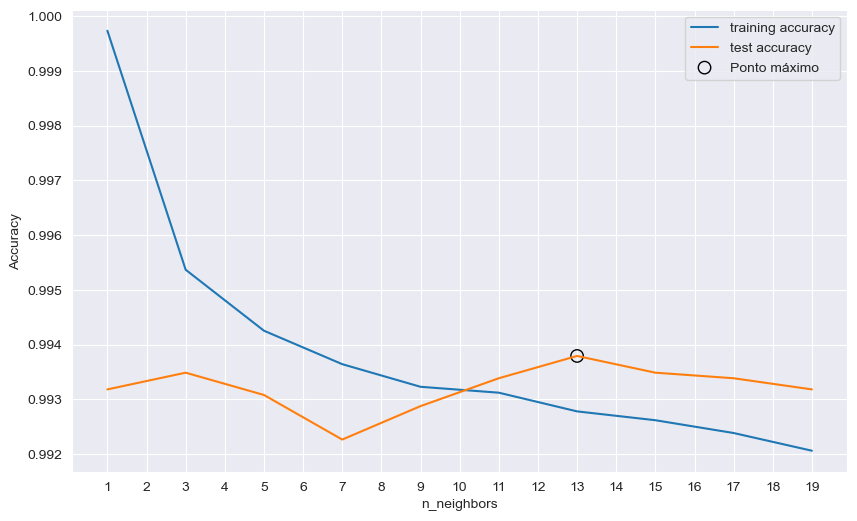

In [493]:
plt.figure(figsize=(10,6))

training_accuracy = []
test_accruacy = []

# Escolhendo uma faixa de neighbors :
neighbors_settings = np.arange(1,20,2)

for n in neighbors_settings:
    
    # Construindo o modelo:
    
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train , y_train)
    
    # Guardando os scores
    training_accuracy.append(knn.score(X_train , y_train))
    test_accruacy.append(knn.score(X_test , y_test))
    
plt.plot(neighbors_settings , training_accuracy , label = 'training accuracy')
plt.plot(neighbors_settings , test_accruacy , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(range(1,20,1))
plt.scatter(13,max(test_accruacy), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()
plt.show()

Iterando mais uma vez o modelo , vamos agora variar os hiperparâmetros *n_neighbors* , *metric* , *p* e *weigths*.

In [494]:
n_neighbors = np.arange(1,27,3)

inicio = time.time()     # Inicio tempo de execução

knn_max_train=0
knn_max_test=0
n_max=0
p_max = 0
weights_better = 0

for n in n_neighbors:
    
    for p in [1,2,3]:
        
        for w in ['uniform', 'distance']:
        
            # Instanciando o modelo sem settar nenhum hiperparâmetro
            knn= KNeighborsClassifier(n_neighbors = n , p = p , weights = w, metric = 'minkowski').fit(X_train,y_train)
            
            #Evitando overfitting
            if knn.score(X_test,y_test)>knn.score(X_train,y_train):
                if knn.score(X_test,y_test)>knn_max_test:
                    knn_max_train=knn.score(X_train,y_train)
                    knn_max_test=knn.score(X_test,y_test)
                    n_max=n
                    p_max = p
                    weights_better = w
                else:
                    continue
            else:
                continue
                
fim = time.time()  #Fim - tempo de execução                
        
print(f"""O melhor número de vizinhos é {n_max}, com p_minkowski={p_max} e função_weight={weights_better} com valor de
scores:\ntraining:\t{knn_max_train:.3f}\ntest:\t\t{knn_max_test:.3f}""")

O melhor número de vizinhos é 13, com p_minkowski=2 e função_weight=uniform com valor de
scores:
 training:	0.993
test:		0.994


In [495]:
#Instanciando o melhor modelo conforme verificação anterior, utilizando a métrica euclidiana
knn= KNeighborsClassifier(n_neighbors = 13 , p = 2 , weights = 'uniform', metric = 'minkowski').fit(X_train,y_train)

#### Métricas de validação dos scores

Aqui utilizaremos as métricas complementares detalhadas na sessão de Introdução ao Machine Learning, para assim validar ainda mais a qualidade dessas medidas.

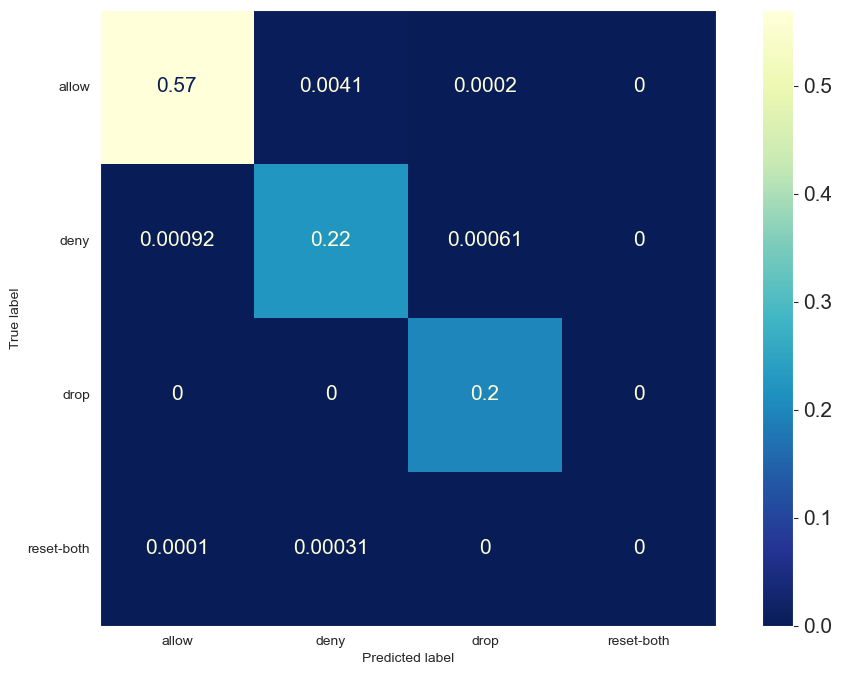

In [496]:
# Criando figura e ajudatando eixos.
fig , ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 15})

# Matriz de confunsão para mlehor resultado obtido no KNN:
y_pred = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test, sample_weight=None, normalize= "all", cmap='YlGnBu_r' , ax = ax)
ax.xaxis.set_ticklabels(transformer.classes_); ax.yaxis.set_ticklabels(transformer.classes_);

plt.grid(False)
plt.show()

Como podemos verificar, na adequação dos melhores parâmetros, o modelo acerta o valor próximo ao [total de elementos em cada classe](#distribuicao_acao).

In [497]:
# Guardando resulados obtidos para cada avarage do Modelo KNN

types_average = ['micro', 'macro', 'weighted']

dict_knn_recall ={}

for avarage in types_average:

    score = recall_score(y_test , y_pred , average = avarage , sample_weight = None , zero_division = 'warn' )
    
    dict_knn_recall[avarage] = score

print(dict_knn_recall)

{'micro': 0.993794506612411, 'macro': 0.746454454552172, 'weighted': 0.993794506612411}


#### Validação cruzada

Vendo a validação de diferentes métricas, varia-se a configuração da base de dados de maneria cruzada para melhor validação da heterogeineidade dos scores do KNN.

In [78]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
for metric in scoring_metrics:
    score = cross_val_score(knn,X,y,cv=10,scoring = metric)
    print('#'+'-------'*15+'#')
    print(f'Para a métrica "{metric}", sendo realizadas 10 partições aleatórias, temos os seguintes scores:\n')
    print(np.array(score).reshape(1,-1))
    print('\nMédia da amostra:\t\t', score.mean())
    print('Desvio Padrão da amostra:\t ', score.std(),'\n')

#---------------------------------------------------------------------------------------------------------#
Para a métrica "accuracy", sendo realizadas 10 partições aleatórias, temos os seguintes scores:

[[0.99511749 0.99481233 0.99313292 0.99465893 0.99374332 0.99313292
  0.98931787 0.9916069  0.99084389 0.98855486]]

Média da amostra:		 0.9924921420751739
Desvio Padrão da amostra:	  0.002200816042370343 

#---------------------------------------------------------------------------------------------------------#
Para a métrica "f1_micro", sendo realizadas 10 partições aleatórias, temos os seguintes scores:

[[0.99511749 0.99481233 0.99313292 0.99465893 0.99374332 0.99313292
  0.98931787 0.9916069  0.99084389 0.98855486]]

Média da amostra:		 0.9924921420751739
Desvio Padrão da amostra:	  0.002200816042370343 

#---------------------------------------------------------------------------------------------------------#
Para a métrica "f1_macro", sendo realizadas 10 partições aleatórias,

Vemos com maior clareza que nos scores analisados podemos ter valores superiores ao encotrado na sessão de métricas, o que novamente valida a necessidade de uma validação cruzada para melhor entendimento e composição do modelo.

##### Resultados na prática

Utilizando o recurso da Curva Característica de Operação do Receptor (ROC) para essa analise Multi-Class com auxílio da Biblioteca Yellowbrick, gerando assim uma melhor visualização conforme os fatores explicados acima. Em termos práticos, quão mais próximo do ponto superior esquerdo, melhor é o desempenho do modelo, devido maior assertividade no âmbito de Verdadeiros Positivos e menor geração de Falsos Positivos, o que nosso caso do mapeamento de um Firewall é necessário, visto que a passagem de um Malware pelo protocolo "Allow" pode ser danosa ao Computador.

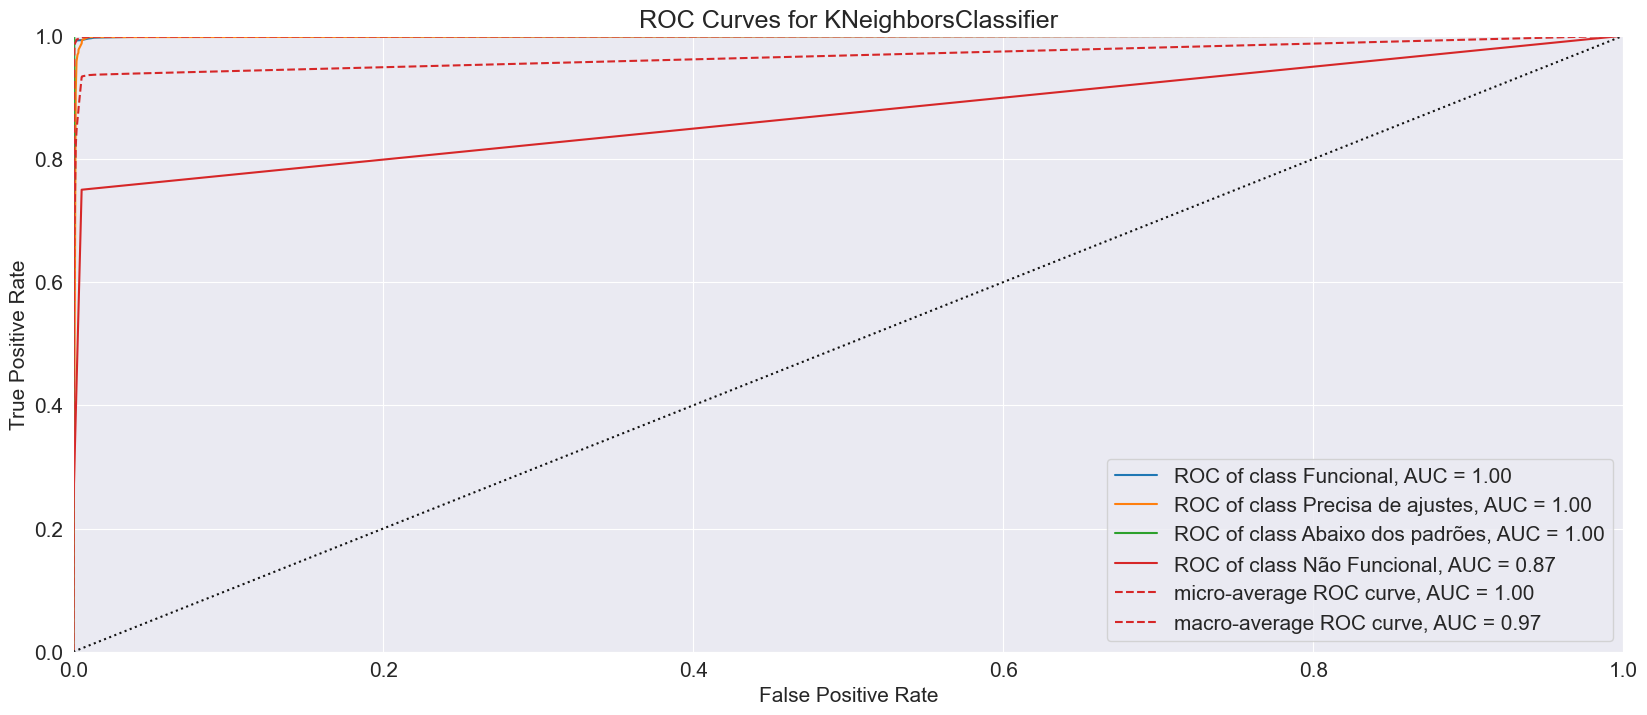

In [498]:
plt.figure(figsize=(20,8))
plot_ROC_curve(knn,X_train,y_train,X_test,y_test)
plt.show()

Conforme Averiguado pelo gráfico acima, vemos que o modelo, nos âmbitos funcionais e ajustado consegue ter um ótimo Fit dos dados , chegando perto da perfeição exigida nesse tipo de situação, elucidando a ótima perfomance do modelo.

#### Algumas conclusões 

Observamos que o melhor número de acertos no modelo ocorre para as condições de parâmetros n_neighbors=13 , com um p =2 e com os pesos uniformemente distribuidos. Apesar do melhor resultado ter sido obtido nessas condições, conseguimos observar nos scores anteriores que o número de acerto permanece alto para parâmetros divergentes, acima de 90% de acerto. 

O resultado regerado era algo esperado visto que as condições de barragem ou não do fluxo de dados mostraram-se bem explitas nos gráficos plotados na Analise Exploratória, sendo muitas vezes claro a condição que ocasionaria a barreira do Firewall.

Conforme esperado, vimos que o modelo se adequou quando nem fora tão complexo com número baixo de vizinhos e com espaço vetorial acima de p>2 para Minkowiski, nem demasiadamente simples, conseguindo se adaptar e conseguir ótimos scores no tangente à sua proposição.

**Sobre o Modelo KNN**

**Vantagens**

* O algorítimo é simples e fácil de implementar.

* Não há necessidade de ajustar vários parâmetros e ou fazer suposições adicionais.

* O algorítimo é versátil tendo utilização tanto em modelos de classificação, modelos de regressão 

**Desvantagens**

* O algorítimo fica significantemete mais lento a medida que o número de features e o tamanho do dataset aumenta.

Para a base de dados temos , calculamos o tempo de execução para atingirmos a melhor desempenho do modelo. Observamos pelo resultado que o modelo torna-se inviável para base de dados maiores, sendo lento e exigindo muito processamento do computador para cumprir a função designada.

In [499]:
print(f"Tempo de execução para obtenção dos melhores parâmetros foi de : {fim-inicio:.2f} segundos ")

Tempo de execução para obtenção dos melhores parâmetros foi de : 519.77 segundos 


## Segundo modelo : Logistic Regression
<div id="logistica"></div>

**Você sabe o que é uma regressão?**

Um modelo de regressão tem , principal objetivo verificar como certas variáveis de interesse influenciam a variável que queremos prever Y. Dito isto, busca-se criar um modelo matemático linearmente dependente para predição dos valores de Y com base em novos valores de variáveis preditoras X.


**Um pouco sobre Regressão Linear**

Em nosso segundo modelo utilizaremos um algorítimo de Regressão Logística. Para entendermos melhor seu funcionamento é fundamental conhecermos o modelo do qual o mesmo derivou, a Regressão Linear.

Regressão Linear é um método estatístico utilizado para investigar a relação existente entre uma ou mais variáveis com outra que deseja-se prever através da soma de seus pesos, e do acrésimo de um termo independente. Como formula para o modelo de Regressão Linear temos:

<br>
$$\widehat{y} = \Theta _0 + \Theta _1 x_1 +\Theta _2 x_2 + ... + \Theta _n x_n $$
<br>

Onde , $\widehat{y}$ é a variável que desejamos prever (target) , $\Theta _n$  é o peso da feature $x_n$ e $\Theta _0$ é o termo independente (intercepto).

Como exemplo de uma regressão linear temos o preço de venda de uma casa , que pode está associado a caracteristicas como tamanho da casa, número de quartos , localidades etc.

Cada predição realizada pelo modelo agrega consigo um erro associado. Em um modelo de Regressão Linear buscamos o melhor ajuste de pesos que esteja associado ao menor erro de predição. Várias métricas podem ser utilizadas objetivando minimizar esse erro, como as mais utilizadas podemos citar:

* Mean Absolute Error  (MAE): A média do erro que cada ponto tem em relação a linha de regressão. 

<br>
$$\frac{1}{n} \sum_{j=1}^{n} \left | y_j - \widehat{y}_j \right |$$
<br>

* Mean Squared Error (MSE): Soma acumulativa dos erros quadrados. Por estarem elevados ao quadrado, há uma penalização em erros maiores.

<br>
$$\frac{1}{n} \sum_{j=1}^{n} \left | y_j - \widehat{y}_j \right |^2 $$
<br>

Onde, y representa o valor real observado e $\widehat{y}$ o previsto pelo modelo.


* Median Absolute Deviation (MAD): Nesse método , primeiro ocorre a ordenação dos elementos, posteriromente pegamos o erro que divide o conjunto simetricamente, por exemplo , imagine o conjunto de erros observados [1,3,6,2,10], ordenando temos [1, 2, 3 ,6 , 10] o elemento que divide esse conjunto no meio é o 3. Essa métrica ignora pontos mais extremos e privilegia manter a forma geral da distribuição.

Caso tenha mais interesse sobre Regressão Linear [clique aqui](https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8).

**Regressão Logística**

A Regressão Logística é um modelo que estima a probabilidade de ocorrência ou não de um evento a partir de um conjunto de variáveis preditoras.

Após o ajuste do modelo de Regressão Linear , passamos os valores previstos obtidos por esse modelo e o colocamos em uma função que retornará a probabilidade de um valor pertencer a determinada classe. 

<br><br>
<center>
    <img src="firewall_assets/logVSlinear.png" width=600 style="float: center; margin: 0px 0px 10px 10px">
    <br><img src="firewall_assets/LogReg_1.png" width=600 style="float: center; margin: 0px 0px 10px 10px">
</center>


<center><b>Comportamento de uma Regressão Linear e uma Regressão Logistica Simples.</b></center>
<br>

Em uma Regressão Logística Simples, temos com saída valores binário, ou seja, retornando a probabilidade de pertencer a uma classe 0 ou uma classe 1. Para probabilidades inferiores a 0.5 , o target é classificado como classe 0 e para probabilidades superiores a 0.5 o target é classificado como classe 1.

**Função Sigmoide**

Após acharmos a reta que melhor se adequa aos dados, vamos "achatar" a transformação linear de forma que o valor previsto pelo modelo possa ser interpretado como uma probabilidade, no modelo binário, 0 ou 1. Uma das funções de ativação mais utilizadas para esse "achatamente" é chamada de função logística, ou sigmóide.

<br>
$$h_\theta(\widehat{y}) = \frac{1}{1 + e^{-\widehat{y}}}$$
<br>

Onde $\widehat{y}$ é o output do modelo linear e $e$ o expoente de Euler.

Matematicamente a regra de decisão tomada através da probabilidade obtida pela função sigmoide pode ser representada como:

<br>

$$ h_\theta(x)= P(Y=1 | X; \theta)$$

<br>

$$P(Y=1 | X; \theta) + P(Y=0 | X; \theta) = 1$$

$$P(Y=0 | X; \theta) = 1 - P(Y=1 | X; \theta)$$

<br>

$$P(Y=0 | X; \theta) = 1 - h_\theta(x)$$

Onde , 

`P(Y=1 | X; theta)` a probabilidade de ser classificado como classe 1 , dado que a regressão linear (X) foi parametrizada com peso $\theta$.

`P(Y=0 | X; theta)` a probabilidade de ser classificado como classe 0 , dado que a regressão linear (X) foi parametrizada com peso $\theta$.


**Função de Custo**

Como mostrado anteriormente, o modelo de Regressão Linear possui o calculo de uma função de custo ,comumentemente se utiliza o MSE , que busca minimizar os erros cometidos pelo modelo por meio de ajuste de parâmetros. A regressão logística possui uma função de custo não convexa de parâmetros (teta) da forma :

<br>
$$Cost(h{_{\Theta}}(x)), y) = -y\ln (h{_{\Theta}}(x)) - (1-y)\ln(1-h{_{\Theta}}(x))$$
<br>
Onde,
<br>

* `y=1` : $Cost(h{_{\Theta}}(x)), y) = -y\ln (h{_{\Theta}}(x))$

* `y=0` : $Cost(h{_{\Theta}}(x)), y) = - \ln(1-h{_{\Theta}}(x))$
<br>

Caso deseje entender um pouco mais sobre funções de custo e modelos de regressão logística [clique aqui](#https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

Para modelos de multiclasses , a divisão de probabilidade é mais segmentada, assim funções tais como tangente hiperbolica e RELU possuem um melhor desempenho para esse tipo de classificação.
<br><br>
$$\tanh (x)  = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$
<br><br>
$$f(x) = \left\{\begin{matrix}
 max(0,x)& , x>0\\ 
 0 & , x<0
\end{matrix}\right.$$
<br>

Concluindo , podemos afirmar que minimizar a função de custo é o objetivo do modelo de regressão logística, quando o seu menor valor é alcançado foram encontrados os melhores valores para a predição.


**Regularization**

A regularização é uma forma de evitar ajuda a resolver problemas de ajuste excessivo, o que implica que o modelo tenha um bom desempenho nos dados de treinamento, mas tenha um desempenho ruim nos dados de validação (teste). Dessa forma, a regularização penaliza coeficientes de regressão de alto valor ,consequentemente, penalizando os modelos mais complexos, reduzindo parâmetros e simplificando o modelo, mas sem reduzir o seu poder preditivo. 

Existem diversos tipos de regularização , e ambas diminuem  penalizam grandes pesos de coeficiente, mas a maneira como os pesos diminuem é diferente. Algumas das principais regularizações utilizadas são: 

* `Função L1 Loss ou Regularização L1`: adiciona um termo de penalidade que é igual  à soma dos valores absolutos dos coeficientes. Isso também é conhecido como o método de menor desvio absoluto. Simplificando , os coeficientes passam a ter uma limitação de tamanho. Alguns coeficientes podem ter seu coeficiente reduzido a zero e serem eliminados.


* `L2 Loss function ou L2 Regularization` : adiciona um termo de penalidade que é igual à soma dos quadrados dos coeficientes. Simplificando , podemos dizer que todos os coeficientes são reduzidos pelo mesmo fator (nenhum é eliminado).
 

* `Elastic Net`:  É uma combinação das regularizações L1 e L2 simultaneamente, juntamente com a adição de um hiperparÂmetro. Normalmente utilizada quando estamos lidando com variáveis altamente correlacionaveis.


#####  Aplicando o Modelo na prática

Feita a familiarização matemática e teórica com o algoritmo, faz-se necessário o entendimento desse modelo segundo a [Biblioteca utilizada](#sklearn), isto é, seus principais hiper parâmetros, comportamento e como evitar comportamentos anômalos como Overfitting e Underfitting.

Os principais hiperparâmetros de LogisticRegression para esse modelo são dispostos em:

`solver` : **{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’}** 

*Algoritimo usado para a otimizaçao do problema*.


`penalty`: **{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}**

*Usada para expecificar a norma de penalização utilizada*. 


`C`: **float, default=1.0**

*O inverso da força da regularização*. 

`random_state` **{default=“none",int}**

*Controla a aleatoriedade de seleção das porções segmentadas pelo modelo do dataset. Fixando um valor, mantem-se a mesma partição*.

#### Primeiros resultados do Modelo

In [91]:
# Instanciando o modelo sem settar nenhum hiperparâmetro

log= LogisticRegression(random_state = 0).fit(X_train,y_train)

score_train = log.score(X_train, y_train)
score_test = log.score(X_test, y_test)

print(f" Score train dataset : {score_train}\n Score test dataset: {score_test}")

 Score train dataset : 0.9780797816954508
 Score test dataset: 0.9772126144455747


Analisando os hiperparâmeros que a função Regressão Logistica recebe , encontramos que o parâmetro de otimização  'saga' é o que abrange mais funções de penalização. Portanto iremos fixar o mesmo e observar o comportamento do parâmetro C (força da regularização) no conjunto de dados.

In [181]:
# Variando o parâmetro C , valor que controla a força da parametrização.

log_score_train = list()
log_score_test = list()

C=''

parametro_C = np.arange(1,100,10)

inicio = time.time()     # Inicio tempo de execução

for c in parametro_C:
    
    # Criando e ajustando modelo
    log=LogisticRegression(penalty='l2', C=c, random_state=0).fit(X_train, y_train)
    
    # Calculando Score de treino e teste
    
    log_score_train.append(log.score(X_train,y_train))
    log_score_test.append(log.score(X_test,y_test))
    
    C=c

fim = time.time()     # Inicio tempo de execução
    
# Maiores valores de acerto encontrados na lista treino e teste.

print(f'Maior Score train obtido : {max(log_score_train)} \nMaior Score test obtido: {max(log_score_test)}')

Maior Score train obtido : 0.9784029298768446 
Maior Score test obtido: 0.977822990844354


In [183]:
# Tempo de execução para essa implementação do modelo:

print(f"Tempo de execução para obtenção dos melhor parâmetro foi de : {fim-inicio:.2f} segundos ")

Tempo de execução para obtenção dos melhor parâmetro foi de : 34.62 segundos 


In [116]:
# Descobrindo se existe alguma acurácia em teste que supera o valor em treino:

count=0

for i in range(len(log_score_test)):
        
    if(log_score_train[i] < log_score_test[i]):
        
        count+=1
    
    else:
        
        continue
        
print(f'Existe {count} valores de acurácia teste que superam a acurácia treino.')

Existe 0 valores de acruácia teste que superam a acruácia treino.


**Da célula acima, retiramos que o modelo de Regressão logística apresenta uma tendência de Overffiting para datasets maiores, devido a ter grande quantidade de scores acima no conjunto de treino do que para o conjunto de teste (que tem menos amostras).**

In [117]:
minimo = 100000

for i in range(len(log_score_test)):
        
    if(abs(log_score_train[i] - log_score_test[i]) < minimo):
        
        minimo = abs(log_score_train[i] - log_score_test[i])
        index = i 

# Considerando o menor valor entre a diferença score treino e teste, como melhor arranjo para a predição de modelo , 
# temos que para os valor:

print(f'Temos o melhor arranjo , para C = {parametro_C[index]}.\nScore Treino : {log_score_train[index]} \nScore Teste: {log_score_test[index]}')

Temos o melhor arranjo , para C = 41.
Score Treino : 0.9784029298768446 
Score Teste: 0.977822990844354


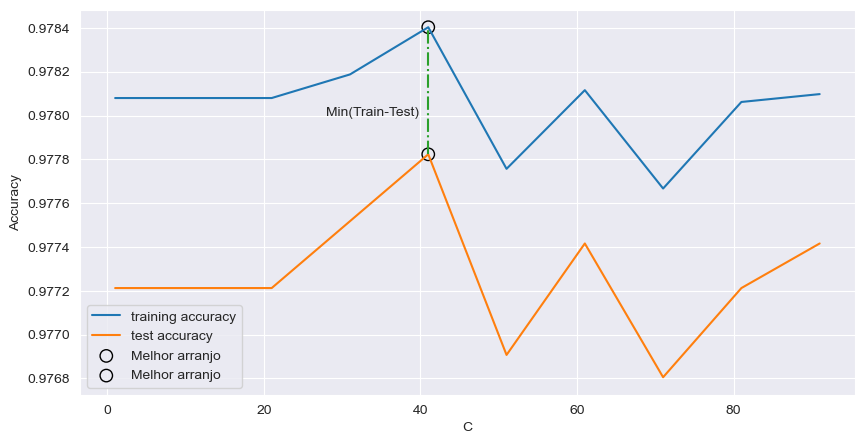

In [159]:
# Plotando Comportamento do Score treino e Score teste:

plt.figure(figsize=(10,5))

linha_y = np.linspace(log_score_test[index] , log_score_train[index] , 10)
valor_x = [41 for i in range(len(linha_y))]

plt.plot(parametro_C , log_score_train , label = 'training accuracy')
plt.plot(parametro_C , log_score_test , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("C")

plt.plot(valor_x , linha_y , '-.')
plt.text(28, 0.978, 'Min(Train-Test)')

plt.scatter(41, log_score_test[index] , s=80 , facecolors='None', edgecolors='black' , label='Melhor arranjo')
plt.scatter(41, log_score_train[index] , s=80 , facecolors='None', edgecolors='black' , label='Melhor arranjo')

plt.legend(loc = 'best')
plt.show()

#### Métricas de validação dos scores

Aqui utilizaremos as métricas complementares detalhadas na sessão de Introdução ao Machine Learning, para assim validar ainda mais a qualidade dessas medidas.

In [80]:
# Guardando resulados obtidos para cada avarage do Modelo Logistic Regression para o melhor arranjo de parâmetro:

log_best = LogisticRegression(penalty='l2', C=41, random_state=0).fit(X_train, y_train)
y_pred = log_best.predict(X_test)

types_average = ['micro', 'macro', 'weighted']

dict_log_recall ={}

for avarage in types_average:

    score = recall_score(y_test , y_pred , average = avarage , sample_weight = None , zero_division = 'warn' )
    
    dict_log_recall[avarage] = score

print(dict_log_recall)

{'micro': 0.977822990844354, 'macro': 0.7323492896845973, 'weighted': 0.977822990844354}


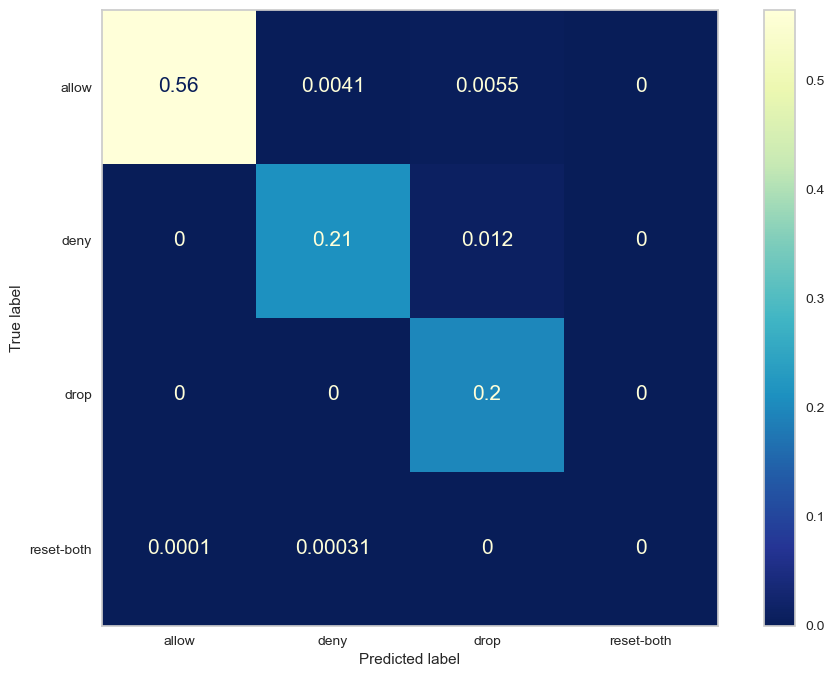

In [176]:
# Criando figura.
fig , ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 15})

# Matriz de confunsão para mlehor resultado obtido no modelo de Regressão Logística:

plot_confusion_matrix(log_best, X_test, y_test, sample_weight=None, normalize= "all", cmap='YlGnBu_r' , ax = ax)
ax.xaxis.set_ticklabels(transformer.classes_); ax.yaxis.set_ticklabels(transformer.classes_);

plt.grid(False)
plt.show()

#### Validação cruzada

Vendo a validação de diferentes métricas, varia-se a configuração da base de dados de maneria cruzada para melhor validação da heterogeineidade dos scores da Regressão Logística.

In [81]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
for metric in scoring_metrics:
    score = cross_val_score(log_best,X,y,cv=10,scoring = metric)
    print('#'+'-------'*15+'#')
    print(f'Para a métrica "{metric}", sendo realizadas 10 partições aleatórias, temos os seguintes scores:\n')
    print(np.array(score).reshape(1,-1))
    print('\nMédia da amostra:\t\t', score.mean())
    print('Desvio Padrão da amostra:\t ', score.std(),'\n')

#---------------------------------------------------------------------------------------------------------#
Para a métrica "accuracy", sendo realizadas 10 partições aleatórias, temos os seguintes scores:

[[0.98367409 0.98764114 0.97939875 0.98168778 0.98061956 0.97710972
  0.96841141 0.97268427 0.97588891 0.97222646]]

Média da amostra:		 0.9779342085269749
Desvio Padrão da amostra:	  0.005534463727765257 

#---------------------------------------------------------------------------------------------------------#
Para a métrica "f1_micro", sendo realizadas 10 partições aleatórias, temos os seguintes scores:

[[0.98367409 0.98764114 0.97939875 0.98168778 0.98061956 0.97710972
  0.96841141 0.97268427 0.97588891 0.97222646]]

Média da amostra:		 0.9779342085269749
Desvio Padrão da amostra:	  0.005534463727765257 

#---------------------------------------------------------------------------------------------------------#
Para a métrica "f1_macro", sendo realizadas 10 partições aleatórias,

Vemos, novamente, com maior clareza que nos scores analisados podemos ter valores superiores ao encotrado na sessão de métricas, o que novamente valida a necessidade de uma validação cruzada para melhor entendimento e composição do modelo. Pela padronizaçãode alguns scores, vemos que as amostras tem tendência de homogeneização, o que auxilia na classificação.

##### Resultados na prática

Utilizando o recurso da Curva Característica de Operação do Receptor (ROC) para essa analise Multi-Class com auxílio da Biblioteca Yellowbrick, gerando assim uma melhor visualização conforme os fatores explicados acima. Em termos práticos, quão mais próximo do ponto superior esquerdo, melhor é o desempenho do modelo, devido maior assertividade no âmbito de Verdadeiros Positivos e menor geração de Falsos Positivos, o que nosso caso do mapeamento de um Firewall é necessário, visto que a passagem de um Malware pelo protocolo "Allow" pode ser danosa ao Computador.

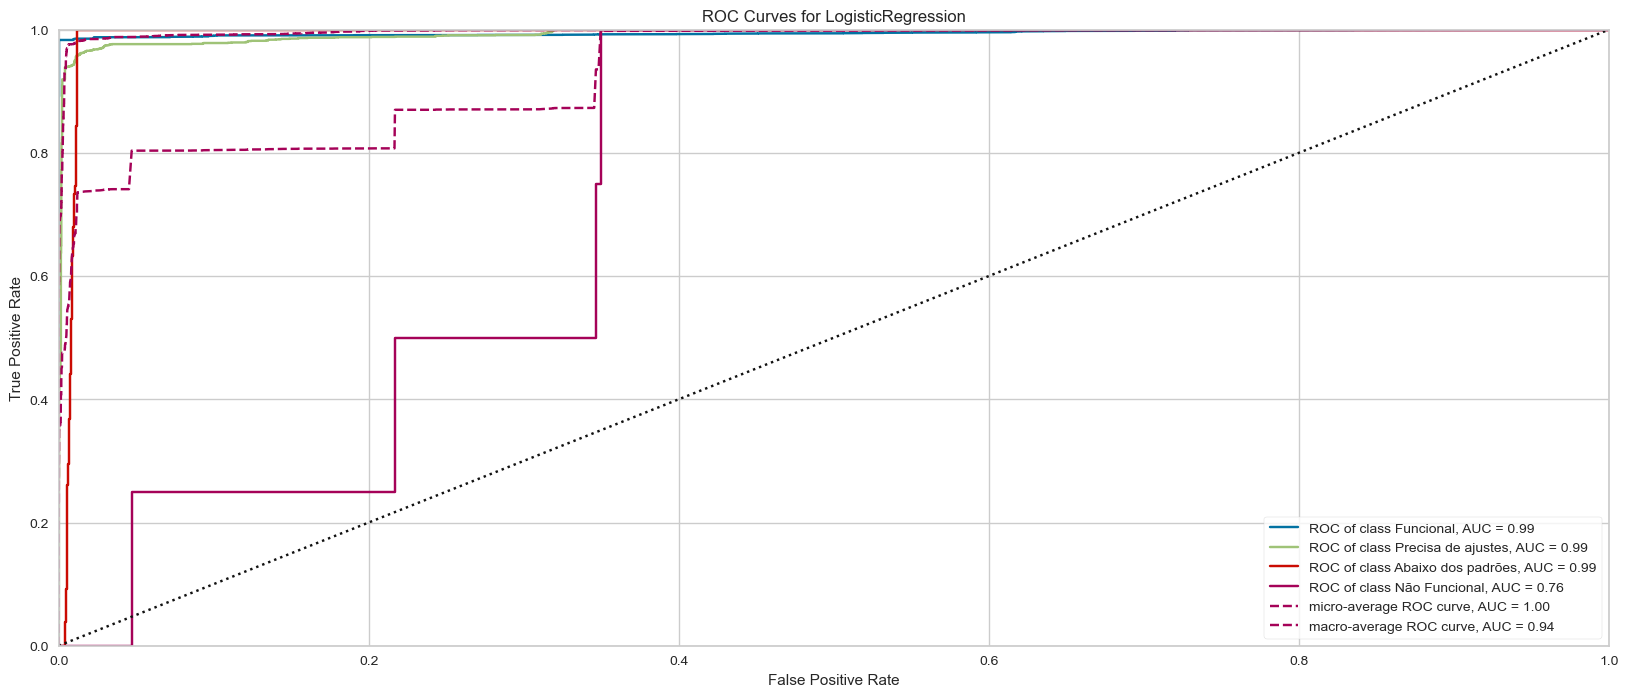

In [177]:
# ROC Curve

plt.figure(figsize=(20,8))
plot_ROC_curve(log_best,X_train,y_train,X_test,y_test)
plt.show()

#### Algumas conclusões

Concluímos que o modelo Logistic Regression possui um desempenho inferior ao modelo KNearest Neighbors para base de dados utilizada nesse projeto, de acordo com as análises básicas realizadas, todavia, este ainda apresentou tempo de execução quase 10 vezes superior.Pontos que podem ser notórios para a queda de desempenho desse modelo, podem se dever a um melhor entendimento do dataset e assim melhor compreensão dos hiperparâmetros escolhidos, como por exemplo o atributo "solver".

**Sobre o modelo Logistic Regression**

**Vantagens**

* Pode se ajustar em conjuntos de dados de alta dimensão.


* Os parâmetros previstos dão inferência sobre a importância de cada recurso .


* Tempo de treinamento menor do que a maioria dos algoritmos complexos.


* Muito eficiente quando o conjunto de dados possui características que são linearmente separáveis.


**Desvantagens**


* Base de dados dimensionais elevados , podem levar ao ajuste excessivo do modelo no conjunto de treinamento (Overffiting).
_Importante notar que na base de dados utilizada para esse projeto há indicativos de que esse sobreajuste tenderá a ocorrer._


* Cada exemplo de treinamento seja independente de todos os outros exemplos na base de dados, caso isso não ocorra o modelo tentará dar mais importância a esses exemplos de treinamento específicos. 

## Terceiro modelo : Decision Tree
<div id="decision"></div>

Concluídos os dois modelos anteriores, é válido iniciar-se a construnção de um modelo um pouco mais complexo e com mais recursos que possam melhorar ainda mais a característica de previsão para esse conjunto de dados.

Dessa forma, introduze-se o algoritmo de **Árvore de Decisão** ou **Decision Tree**, que de acordo com análises de cada feature, com sua respectiva importância conforme julga o modelo, consegue fazer análises binárias sobre cada feature, e assim conseguir tomar a decisão mais próxima da realidade.

**Entendendo o modelo Decision Tree Classification**

<br>

<center><img src="firewall_assets/decision.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></center>

<center><b>Ilustração do funcionamento simplório de uma árvore de Decisão </b></center>


Árvores de decisão divide o dataset em questão em fragmentos de acordo com seus atributos e seus respectivos valores (sejam estes categóricos ou numéricos), enquanto simultâneamente a árvore de decisão é construída de maneira incremental. De maneira prática, a decisão primária, relativa  também para a melhor previsão, advinda da importância de cada feature para cada decisão, é chamada de **Nó de Raiz** ou **Root Node** que basicamente pauta a decisão inicial tomada pelo modelo, segmentando a base de dados de maneira inicial. As subdivisões subsequentes são denominadas **Nó de Decisão** ou **Decision Node**, este que em geral representa uma decisão mais ampla e podendo de ter dois ou mais galhos em sua constituição para refinar a classificação e por fim o **Nó da Folha** ou **Leaf Node**, que basicamente representa uma classificação ou decisão final para o ponto analisado.
<br>
<br>
<center><img src="firewall_assets/decision2.png" width=400 style="float: center; margin: 0px 0px 10px 10px"></center>
<center><b>Transição de um dataset para uma Decision Tree </b></center>

O algoritmo de construção do modelo, conhecido por *ID3* segundo J.R. Quinlan, constitue-se por uma análise de "ida e volta" na Árvore utilizando-se de Propagação Avançada, isto é, uma análise conjunta nos galhos possíveis sem retrocesso no caminho percorrido.

Este algoritmo utilza-se da **Entropia** e do **Incremento de Informação após a Propagação** para modelar a árvore de acordo com a importância dos atributos da base de dados. Em geral, utiliza-se como critério a suposição de independência entre os Features, segundo o que descreve a regra de Bayes.

Outra forma alternativa e mais simples de se analisar o comportamento de dados para a montagem do modelo é utilizada o **Índice de Impureza de Gini**, que de maneira alternativa, julga a organização dos dados e assim estipula suas importâncias, para a melhor obtenção preditiva.

Para trabalhar de maneira simultânea com dados categóricos e numéricos, o algoritmo basicamente discretiza os valores contínuos pelo fracionamento em faixas baseadas na frequência presente no dataset. Em geral, para melhor acurácia desse modelo, as acurácias são configuradas de acordo com a disposição dos dados (seus percentis), tornando fácil a identificação de Outliers, dados não lineares e possíveis dados nulos.

#### Indíce de Gini
Define-se inicialmente que uma classe são características de um dado atributo, isso é, para um atributo teórico "Você faz exercícios?" suas classes seriam "Sim" e "Não".

A estimativa de Gini mede o grau de probabilidade de uma determinada variável ser classificada de maneira errada quando é escolhida ao acaso, isto é dado um atributo qualquer. Em geral também é conhecido por Impureza de Gini, visto que se alguns elementos pertencerem a uma única classe eles são ditos puros. O Índice de Gini varia de 0 a 1, onde 0 informa que todos os elementos em análise pertencem a somente uma classe, e 1 denota que todos os elementos pertencem todos a classes diferentes.

$$Gini = 1 - \sum_{i=1}^{n}(p_i)^2$$

O Indíce de Gini, diferente das demais estimativas necessárias para o funcionamento de uma árvore, tem maior fluidez computacional, e consegue descrever de maneira simultânea a entropia, a possível homogeneidade de uma amostra, sendo um fator comparador paralelo para a montagem dessa modelo.

Apesar de ser menos complexo, consegue por vezes obter ótimos resultados de acordo com a seleção mais homogênea de atributos a figurarem no topo da árvore.

#### Entropia: A homogeineidade da amostra

Seguindo o algoritmo ID3, inicia-se com o conceito de entropia da amostra.

Como já explicitado, a partir da Propagação Avançada ( Sentido de cima de para baixo na árvore), o algoritmo utiliza o cálculo da Entropia para analisar a homogeineidade da amostra, onde o grau de homogeineidade é representado por: 


   `Completamente Homogênea` - A entropia da amostra é Nula:
    
   $$ E(S) = 0 $$
    
   `Parcialmente Dividida` - A entropia da amostra é inclusa entre 0 e 1: 
   
   $$ 0 <E(S) < 1$$
   
   `Igualmente Dividida` - A entropia da amostra é igual a 1: 
   
   $$ E(S) = 1$$
  

Para a construção de uma árvore, faz-se necessária a estimação de dois tipos de entropia utilizando tabelas de frequência como as citadas abaixo.

* Entropia utilizando uma tabela de frequência de um atributo

Aqui utiliza-se apenas um Feature para análise da Homogeineidade da amostra. É importante ressaltar que essa Entropia será mais tarde conceito fundamental para o estabelecimento do chamado **Ganho de Informação**.


$$E(S) = \sum_{i=1}^{c}-p_i*log_2(p_i)$$

Sendo $p_i$ a porcentagem da contagem do **Leaf Node** ou **Folha de Decisão** final da amostra, em relação a todos as outras folhas para a tabela utilizada.

$$p_i=\frac{S_i}{\sum_{i=1}^{n}S_i}$$

Para fins ilustrativos, suponha, de maneira simplificada, que uma das tabelas escolhidas seja respectiva a análise de que um conjuto de Bytes constituem ou não uma ameaça ao computador. Utilizaremos esse exemplo para pautar a explicação para melhor familiarização com a base de dados aqui abordada:

|    É uma ameaça|    ao computador     ? |
| ----------- | ----------- |
| Sim     | Não       |
| 5   | 6        |

Sabemos que dado um **Decision Node** de separação binária, a Entropia local é:

$$E(p_1,p_2) = -p_1*log_2 \left (p_1\right ) -p_2*log_2 \left ({p_2}\right )$$


Dessa forma, a entropia respectiva ao atributo *Ameaça* seria:


$$E(ameaça) = E(6,5) = -\frac{6}{11}*log_2 \left (\frac{6}{11}\right ) -\frac{5}{11}*log_2 \left (\frac{5}{11}\right ) =  0.477 + 0.517 = 0.994$$
<br>


* Entropia utilizando uma tabela de frequência de dois ou mais atributos

Aqui utiliza-se apenas mais de um Feature para análise da Homogeineidade da amostra. É importante ressaltar que essa Entropia será mais tarde conceito fundamental para o estabelecimento do chamado **Ganho de Informação**.

$$E(T,X) = \sum_{i=1}^{c}P(c)*E(c)$$

Onde $P(c)$ representa a probabilidade de ocorrência do segundo atributo, e $E$ é referente a entropia entre o par do primeiro atributo.

Dessa forma, a tabela ilustrativa toma forma da seguinte maneira, para dois atributos segmentandos pela possibilidade de ameaça ou não:

<br>
<br>
<center><img src="firewall_assets/decision3.png" width=400 style="float: center; margin: 0px 0px 10px 10px"></center>

<br>
<br>
<center><img src="firewall_assets/decision 4.png" width=400 style="float: center; margin: 0px 0px 10px 10px"></center>

Assim a entropia nesse caso é da forma, para cada uma das tabelas em relação as portas: 

$$E(porta,ameaça) = P(Entrada)*E(2,1) +P(Destinação)*E(3,2) + P(NAT)*E(0,3)$$


$$E(porta,ameaça) = \left (\frac{3}{11} \right )*0.918 + \left (\frac{5}{11}\right )* 0.971 + \left (\frac{3}{11}\right )* 0.0 $$


$$E(porta,ameaça) = 0.692$$

Segmentando a tabela em função do tempo decorrido:

$$E(tempo,ameaça) = P(0-10s)*E(5,2) +P(10-100s)*E(0,4) + P(100-1000s)*E(0,1)$$


$$E(tempo,ameaça) = \left (\frac{7}{11} \right )*0.863 + \left (\frac{3}{11}\right )* 0.0 + \left (\frac{1}{11}\right )* 0.0 $$


$$E(tempo,ameaça) = 0.549$$

Utiliza-se então esses resultados para o estabelecimento do chamado **Ganho de Informação**, para assim ter-se a definição adequada.

#### Ganho de informação:  Entendendo a importância dos atributos

O ganho de informação de uma Árvore de Decisão é baseado no decrescimento de Entropia após o fracionamento da porção de dados de um Atributo. A construção desse modelo é basicamente retornando o atributo que tenha o maior ganho de informação, ou seja, um galho mais "homogêneo".

Para isso algumas etapas devem ser seguidas:

- Etapa 1: Calcular a Entropia do Atributo Individual

Conforme mostrado acima, deve-se calcular a Entropia de um atributo individual
       No caso ilustrativo, como ja fora mostrado: 
 $$E(ameaça) = E(6,5) = -\frac{6}{11}*log_2 \left (\frac{6}{11}\right ) -\frac{5}{11}*log_2 \left (\frac{5}{11}\right ) =  0.477 + 0.517 = 0.994$$
<br>

- Etapa 2: Estimar o decrescimento Entrópico

O conjunto de dados é então segmentado em função do atributo anterior por outros atributos anexos, como por exemplo o "Endereço da Porta" e possivelmente o "Tempo decorrido". Assim, realiza-se o cálculo da entropia desse galho (dois ou mais atributos). Assim, para a obtenção do ganho nesse ganho, deve-se subtrair da Entropia de um atributo a Entropia dual, gerando assim o Ganho de Informação.
       
$$Ganho(porta,ameaça) = E(ameaça) - E(porta,ameaça)$$

$$Ganho(tempo,ameaça) = E(ameaça) - E(tempo,ameaça)$$

$$Ganho(porta,ameaça) = 0.994 - 0.692 = 0.302$$

$$Ganho(tempo,ameaça) = 0.994 - 0.549 = 0.445$$

Assim, como vemos, o Galho respectivo ao tempo decorrido tem um ganho de informação maior, nessa suposição hipotética, do que o ganho respectivo a porta Cliente, sendo mais suscetível a figurar no topo da árvore.

- Etapa 3: Rankeando Atributos

Agora, o algoritmo ordena os atributos de acordo com o valor de seus repectivos ganhos, dividindo o Dataset em galhos, e repetindo esse processo para cada galho, gerando gradativamente a melhor configuração para a árvore, ordenando os atributos mais importantes primeiro que aqueles com menor ganho.
       
- Etapa 4: Classificação de atributos

Após a ordenação, os galhos com Entropia nula, são considerados Leaf Nodes, isso é conclusões ou classificações, não podendo implicar alguma informação de maneira retroativa.
Um galho com Entropia maior que zero, são segmentados de maneira mais complexa, levando em conta também seu ganho de informação e implicação em outros atributos.

- Etapa 5: Finalizando a Árvore

Após a definição das Folhas ou Leaf Nodes, executa-se o algoritmo de Propagação Avançada nos demais galhos, para assim a classificação efetiva de toda a árvore, definindo a ordem de importância de cada atributo, e assim, selecionando-se os caminhos adequados para classificação de cada dado. Após a Definição de cada Atributo/Galho como *Root*,*Decision* ou *Leaf*, a árvore é estabelecida e consegue classificar a amostra solicitada.

#### Harmonizando atributos

Em muitos casos, alguns atributos terão número de valores bem maiores que outros atributos, sendo conhecidos por **Super Atributos**, sendo em geral automaticamente selecionados pelo Algoritmo como **Root Node**, resultando em um modelo que pode facilmente tender ao Sobreajuste (Overfitting), perfomando bem nas instâncias de treino, mas com baixas capacidades de generalização sobre novas instâncias. Dessa forma, penalizações no algoritmo para evitar esse tipo são necessárias, dessa forma, quando necessário utiliza-se o **Ganho Racional**, que é basicamente a razão do Ganho do Atributo, sobre uma expressão conhecida por **Informação Dividida** ou **Split Information**. Dessa forma, é possível harmonizar os atributos de acordo com a distribuição ponderada do Dataset e obter um modelo que Generalize melhor sobre novas situações e predições.

$$Inf.Div(A,B) = -\sum_{i=1}^{n}P(c)*log_2(P(c))$$

Assim:


$$Ganho Racional(A,B) = \frac{Ganho(A,B)}{Inf.Div(A,B)}$$

#####  Aplicando o Modelo na prática

Feita a familiarização matemática e teórica com o algoritmo, faz-se necessário o entendimento desse modelo segundo a [Biblioteca utilizada](#sklearn), isto é, seus principais hiper parâmetros, comportamento e como evitar comportamentos anômalos como Overfitting e Underfitting.

Os principais hiperparâmetros de DecisionTreeClassifier para esse modelo são dispostos em:

`criterion`: **{default=“gini”, “entropy”}**

*Analisa a qualidade da segmentação dos eixos, explicitando os critérios explicitados anteriormente.*

`splitter`: **{default=“best”, “random”}**

*Define a estratégia de fragmentação de cada nó.*


`max_depth` **{default=“none",int}**

*Define a profundidade máxima, isto é quantidade de Decision Nodes de uma árvore*.

`random_state` **{default=“none",int}**

*Controla a aleatoriedade de seleção das porções segmentadas pelo modelo do dataset. Fixando um valor, mantem-se a mesma partição*.

#### Instanciando modelo

Instancia-se o modelo, sem alterar nenhum hiperparâmetro inerente, apenas para captar seus scores de maneira randômica.

In [23]:
# Instanciando o modelo sem settar nenhum hiperparâmetro
tree= DecisionTreeClassifier().fit(X_train,y_train)

score_train_tree = tree.score(X_train, y_train)
score_test_tree = tree.score(X_test, y_test)

print(f" Score train dataset : {score_train_tree}\n Score test dataset: {score_test_tree}")

 Score train dataset : 0.9994973250511652
 Score test dataset: 0.9979654120040692


#### Verificação do Critério de seleção de Nós: Entropia ou Gini?

Variando-se o critério de seleção, analisa-se quais desses fora mais efetivo com a variação do número de profundidade da árvore, isto é, de Decision Nodes.

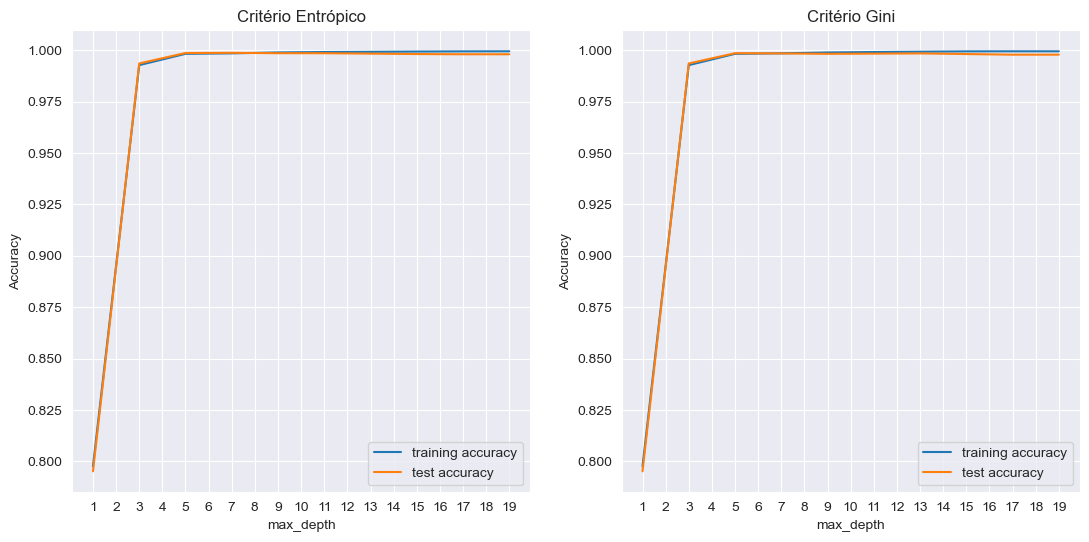

In [24]:
plt.figure(figsize=(13,6))

training_accuracy_entropy = []
test_accruacy_entropy = []

training_accuracy_gini = []
test_accruacy_gini = []

# Escolhendo uma faixa de neighbors :
max_depth_settings = np.arange(1,20,2)

for n in max_depth_settings:
    
    # Construindo o modelo:
    tree_entropy = DecisionTreeClassifier(max_depth = n,criterion='entropy')
    tree_entropy.fit(X_train , y_train)
    
    tree_gini = DecisionTreeClassifier(max_depth = n,criterion='gini')
    tree_gini.fit(X_train , y_train)
    
    # Guardando os scores
    training_accuracy_entropy.append(tree_entropy.score(X_train , y_train))
    test_accruacy_entropy.append(tree_entropy.score(X_test , y_test))
    
    training_accuracy_gini.append(tree_gini.score(X_train , y_train))
    test_accruacy_gini.append(tree_gini.score(X_test , y_test))
    
plt.subplot(121)    
plt.title('Critério Entrópico')
plt.plot(max_depth_settings , training_accuracy_entropy , label = 'training accuracy')
plt.plot(max_depth_settings , test_accruacy_entropy , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.xticks(range(1,20,1))
#plt.scatter(12,max(test_accruacy), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()

plt.subplot(122)    
plt.title('Critério Gini')
plt.plot(max_depth_settings , training_accuracy_gini , label = 'training accuracy')
plt.plot(max_depth_settings , test_accruacy_gini , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.xticks(range(1,20,1))
#plt.scatter(12,max(test_accruacy), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()

plt.show()

#### Seleção de hiperparâmetros: Qual a melhor configuração para o modelo?

Variando os hiperparâmetros notórios descritos no início dessa sessão, tentaremos prever as melhores condições para o modelo.

In [37]:
inicio = time.time()     # Inicio tempo de execução

train_score_tree=0
test_score_tree=0
max_depth1=0
criterion_best =''
splitter_best = ''
for i in range(1,37):
    for criterion in ['gini','entropy']:
        for splitter in ['random','best']:
            
            tree=DecisionTreeClassifier(criterion=criterion,splitter=splitter,
                                        max_depth=i,random_state=0).fit(X_train,y_train)
            train_score=tree.score(X_train,y_train)
            test_score=tree.score(X_test,y_test)
            #Evitando parte de Overffiting
            if test_score>train_score:
                if test_score>test_score_tree:
                    test_score_tree=test_score
                    max_depth1=i
                    train_score_tree=train_score
                    criterion_best = criterion
                    splitter_best = splitter
                else:
                    continue
            else:
                continue
fim = time.time()  #Fim - tempo de execução    

print(f'''O Melhor valor para "max_depth" é {max_depth1}, com critério "{criterion_best}"
e Spliter "{splitter_best}":\n 
(training):\t{train_score_tree}\n (test):\t{test_score_tree}''')

print(f'O Tempo de execução foi de {fim-inicio}s')

O Melhor valor para "max_depth" é 12, com critério "entropy"
e Spliter "random":
 
(training):	0.9982765430325662
 (test):	0.9989827060020345
O Tempo de execução foi de 41.0895459651947s


In [38]:
#Instanciando o modelo com parâmetros selecionados
arvore = DecisionTreeClassifier(criterion=criterion_best,splitter=splitter_best,
                                        max_depth=max_depth1,random_state=0).fit(X_train,y_train)

#### Importância dos atributos(Features)

Vamos agora entender a importância dos features para o modelo, isto é a relevãncia de cada um dos atributos de acordo com sua relevância para a ação tomada pelo Firewall. Aqui vale-se o conceito realizado na definição de cada atributo como Root ou Decision Node na elaboração do algoritmo.

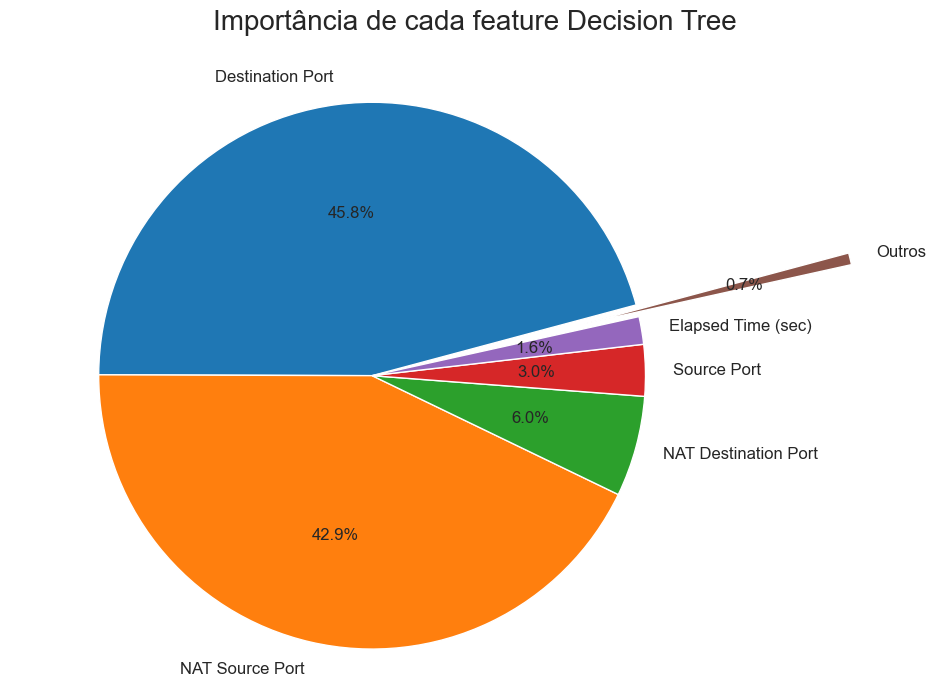

In [39]:
#Fazendo seleção dos atributos utilizados
sns.set_style(style="darkgrid")
plt.figure(figsize=(12,8))

importancia =pd.Series(arvore.feature_importances_,index=X_train.columns)
importancia = importancia.sort_values(ascending=False)
importancia1 = importancia.sort_values(ascending=True)
importance = []
outros = 0

for feature in importancia:
    if feature>1/100:
        importance.append(feature)
    else:
        outros+=feature
importance.append(outros)
importance = pd.Series(importance,index=list(importancia[:5].index)+['Outros'])
        

#Plotando gráfico de pizza
plt.pie(importance,labels=importance.index,
        explode= [0]*5+[0.8],autopct='%1.1f%%',shadow=False, startangle=15,
       textprops={'size':12})
plt.axis('equal')    
#Plota o nível de importância de cada atributo para o modelo
plt.title("Importância de cada feature Decision Tree\n",size=20)
# plt.xlabel('Nível de Importância')
plt.show()
#importancia

Conforme analisado na [sessão conclusiva](#conclusao1) da análise exploratória, alguns features pareciam mostrar com maior precisão alguns dos padrões mais utilizados for um software Firewall, e como ali explicitado, os atributos categóricos demonstraram ter maior peso nessa seleção, devido principalmente aos protocolos executados dentre destes, respondendo parcialmente a pergunta central desta análise.

#### Avaliando a Qualidade de Predição do modelo

Com outra métricas como Recall, Precision e Sensibility, podemos avaliar a qualidade do modelo sobre outra perspectiva, sobretudo as métricas aplicadas a predição de nosso modelo, que em geral não deve classificar erroneamente uma ameaça como uma comunalidade.

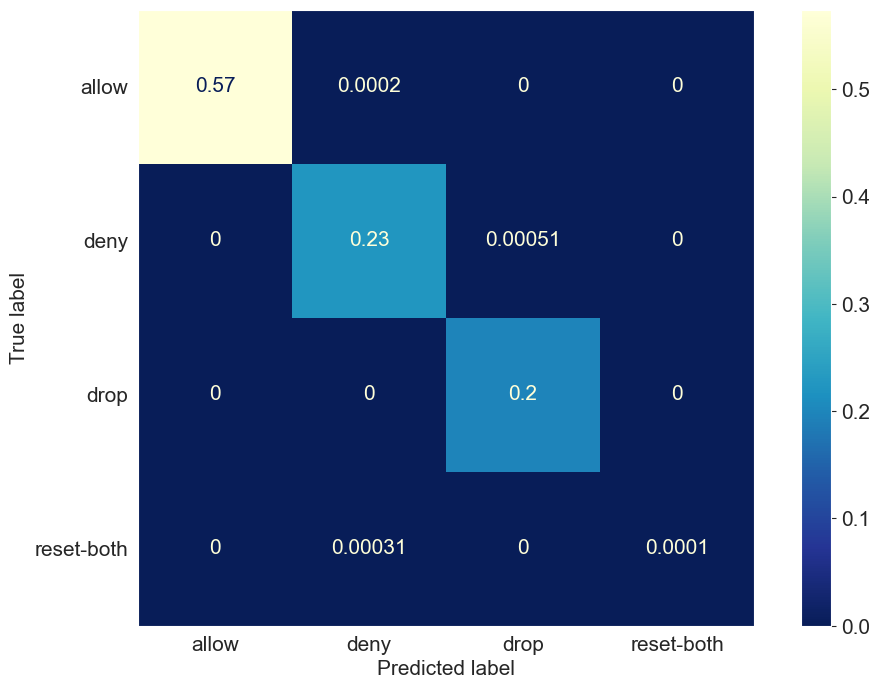

In [123]:
# Criando figura e ajudatando eixos.
fig , ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 15})

# Matriz de confunsão para melhor resultado obtido no KNN:
y_pred_tree = arvore.predict(X_test)

plot_confusion_matrix(arvore, X_test, y_test, sample_weight=None, normalize= "all", 
                      cmap='YlGnBu_r' , ax = ax)
ax.xaxis.set_ticklabels(transformer.classes_); ax.yaxis.set_ticklabels(transformer.classes_);

plt.grid(False)
plt.show()

In [124]:
types_average = ['micro', 'macro', 'weighted']

dict_tree_recall ={}

for avarage in types_average:

    score = recall_score(y_test , y_pred_tree , average = avarage , sample_weight = None , zero_division = 'warn' )
    
    dict_tree_recall[avarage] = score

print(dict_tree_recall)

{'micro': 0.9989827060020345, 'macro': 0.8118494070513025, 'weighted': 0.9989827060020345}


#### Validação cruzada

Vendo a validação de diferentes métricas, varia-se a configuração da base de dados de maneria cruzada para melhor validação da heterogeineidade dos scores da Decision Tree.

In [84]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
for metric in scoring_metrics:
    score = cross_val_score(arvore,X,y,cv=10,scoring = metric)
    print('#'+'-------'*15+'#')
    print(f'Para a métrica "{metric}", sendo realizadas 10 partições aleatórias, temos os seguintes scores:\n')
    print(np.array(score).reshape(1,-1))
    print('\nMédia da amostra:\t\t', score.mean())
    print('Desvio Padrão da amostra:\t ', score.std(),'\n')

#---------------------------------------------------------------------------------------------------------#
Para a métrica "accuracy", sendo realizadas 10 partições aleatórias, temos os seguintes scores:

[[0.99527006 0.99755874 0.99633756 0.9916069  0.99847398 0.99755837
  0.98763925 0.99038608 0.99389593 0.99649016]]

Média da amostra:		 0.9945217025971793
Desvio Padrão da amostra:	  0.0033934768583706375 

#---------------------------------------------------------------------------------------------------------#
Para a métrica "f1_micro", sendo realizadas 10 partições aleatórias, temos os seguintes scores:

[[0.99527006 0.99755874 0.99633756 0.9916069  0.99847398 0.99755837
  0.98763925 0.99038608 0.99389593 0.99649016]]

Média da amostra:		 0.9945217025971793
Desvio Padrão da amostra:	  0.0033934768583706375 

#---------------------------------------------------------------------------------------------------------#
Para a métrica "f1_macro", sendo realizadas 10 partições aleatória

Mais uma vez é possivel ver com maior clareza que nos scores analisados podemos ter valores superiores ao encotrado na sessão de métricas, o que novamente valida a necessidade de uma validação cruzada para melhor entendimento e composição do modelo. Pela padronizaçãode alguns scores, vemos que as amostras tem tendência de homogeneização, o que auxilia na classificação.

##### Resultados na prática

Utilizando o recurso da Curva Característica de Operação do Receptor (ROC) para essa analise Multi-Class com auxílio da Biblioteca Yellowbrick, gerando assim uma melhor visualização conforme os fatores explicados acima. Em termos práticos, quão mais próximo do ponto superior esquerdo, melhor é o desempenho do modelo, devido maior assertividade no âmbito de Verdadeiros Positivos e menor geração de Falsos Positivos, o que nosso caso do mapeamento de um Firewall é necessário, visto que a passagem de um Malware pelo protocolo "Allow" pode ser danosa ao Computador.

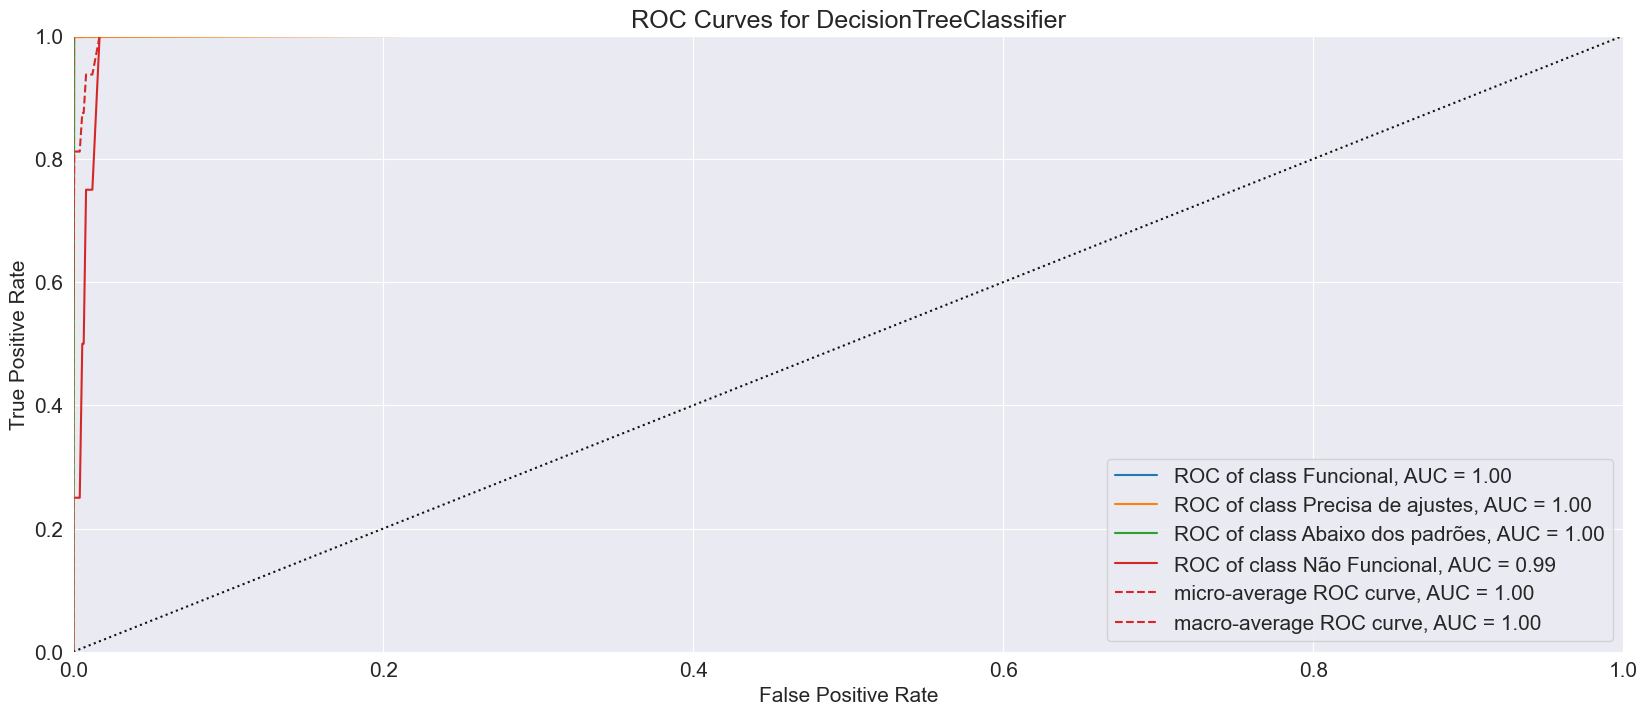

In [125]:
plt.figure(figsize=(20,8))
plot_ROC_curve(arvore,X_train,y_train,X_test,y_test)
plt.show()

#### Algumas Conclusões

Conforme visto pelos gráficos acima, o modelo praticamente atinge os scores máximos de acordo com o previsto para uma ótima classificação cumprindo os requisitos para a ferramenta de detecção de Malware a qual é seu propósito. Notou-se também que a melhor seleção de Hiperparâmetros foi de grande importância para a manutenção do modelo com ótima generalização e classificação imediata dos dados solicitados.

Notou-se assim que o modelo de acordo com o previsto conseguiu scores ainda melhores que seus passados iterando de maneira adequada, resultando em uma melhor predição e adequação desse conjunto de predição, se aproximando da realidade de um sistema de detecção de ameaças.

### Sobre o modelo DecisionTree

 Aqui realizaremos uma breve uma análise sobre o modelo, vantagens, desvantagens e uma amostra gráfica simplificada de seu funcionamento.

O modelo, demonstrou melhores resultados de predição e de funcionamento em relação aos outros aqui mostrados, principalmente por uma escolha efetiva baseada na escolha de features importantes e realizando ações sucessivas que simulam com bastante precisão os passos seguidos por um Firewall real, o que dessa forma auxilia na compreensão dos fatos relativos a detecção de Malware e principalmente auxiliam no discernimento da indagação proposta no início deste projeto.

Amostra gráfica da Decision Tree plotada para a base de dados escolhida:

In [210]:
#bibliotecas para plotagem
from sklearn import tree
import graphviz
# DOT data
arvore = DecisionTreeClassifier(criterion=criterion_best,splitter=splitter_best, #Simplificando modelo para plotagem
                                        max_depth=3,random_state=0).fit(X_train,y_train)
#exportando arvore para arquivo .dot
tree.export_graphviz(arvore, out_file='firewall_assets/tree.dot', 
                                feature_names=X_train.columns,  
                                class_names=['Allow','Deny','Drop','Reset-Both'],
                                filled=True)

#Para converter utilizar no cmd: dot -Tpng tree.dot -o tree.png

<center><b style= "font-size:2rem">Árvore de Decisão simplificada para o modelo</b></center>

<br>
<center><img src="firewall_assets/tree.png" width=1300 style="float: center; margin: 0px 0px 0px 0px"></center>

**Vantagens**

* O algorítimo é facilmente visualizável e interpretável, sobretudo pelos artifícios gráficos.

* Não há necessidade mudança de escala ou normalização de dados devido a discretização de valores.

* O algorítimo é versátil funcionando em datasets com uma boa mistura de variáveis categóricas, contínuas e binárias. 

**Desvantagens**

* O algorítimo em geral tendem muito ao sobreajuste (Overfitting), devido ao fato de realizarem somente a propagação avançada e não fazerem uma Propagação Reversa para análise de resultados e melhor generalização. Para corrigir este fato em geral, utiliza-se "Florestas Aleatórias" ou RandomForests, para melhor comparação de resultados.

## Quarto modelo : Random Forest
<div id="forest"></div>

Complementando e corrigindo um dos maiores defeitos do modelo  Árvore de decisão, as **Random Forest** ou **Florestas Aleatórias**, são um conjunto de algoritmos derivados das árvores de decisão, e suas principais características são destacadas pela flexibilidade, usabilidade, facilidade de uso e escolha de hiperparâmetros, estes muito próximos dos escolhidos para se avaliar uma Decision Tree, além de em geral terem resultados superiores a deste último, por se tratar, em termos técnicos de uma expansão.

<center><img src="firewall_assets/forest1.jpeg" width=1300 style="float: center; margin: 0px 0px 0px 0px"></center>

### Entendendo o RandomForestClassifier

Florestas aleatórias consistem  na combinação paralela de diversas Árvores de Decisão, em geral treinadas com o método conhecido por “Bagging”, que basicamente consiste em uma combinação dessas árvores com intuito de entender as especificidades do conjunto de dados e assim achar a melhor configuração para melhor obtenção de resultados preditivos.
Essa combinação adiciona maior aleatoriedade de seleção para o modelo, enquanto gera várias árvores ao invés, de como propunha o algoritmo ID3, procurar pela importância de cada feature. Basicamente esse algoritmo procura pelos melhores features de acordo com a geração de diferentes árvores feitas de maneira independente uma das outras, gerando maior capacidade de abstração, generalidade e contemplação dos parâmetros, corrigindo um dos problemas centrais abordados durante a descrição de uma Decision Tree: Overfitting; visto que abordando diferentes configurações de modelo, consegue criar maior capacidade de entender a generalidade dos dados. 

Em termos práticos, o funcionamento de uma **Floresta Aleatória** é baseado, assim como seu *original*, em cinco etapas, consistindo sobretudo na divisão dos dados de maneiras heterogeneidade para melhor generalização e assimilação das características.  Esse processo é explicado de maneira simplificada abaixo:


- Etapa 1: **Seleção**.

São Selecionados de maneira randômica alguns subconjuntos de dados do dataset para alimentação das Árvores de decisão.


- Etapa 2: **Construindo Árvores**.

São estabelecidos modelos independentes, até aqui, um dos outros com essas subdivisões com Decision Trees, estabelecendo assim, seus respectivos Nós.

- Etapa 3: **Escolhendo o tamanho da floresta**.

Escolhendo-se o tamanho da floresta, ou da quantidade de árvores construídas, em geral advindo na escolha de hiperparâmetros, decide-se assim a quantidade de comparações realizadas entre as árvores. Em geral a maior quantidade de árvores aumenta a complexidade do modelo.

- Etapa 4: **Estabelecendo a ciclicidade**.

Ocorre-se de maneira cíclica a repetição das etapas 1 e 2, até a configuração julgada adequada pela composição do modelo ou pelo ciclo de iteração gerado pelo engenheiro responsável pelo modelo.

- Etapa 5: **Voto de maioria**.

Após o estabelecimento dos modelo, adequando-se todo o conjunto de treino para montagem do modelo, chega-se a etapa de predição ou avaliação do modelo via testes. Nesse caso, o funcionamento do modelo consiste na predição individual e independente de cada árvore para o conjunto de dados solicitado, e após a geração dessas classificações, ocorre a eleição da classificação final, que recursivamente deriva daquele que teve maior ocorrência dentre as árvores.

##### Para facilitar a visualização

Um exemplo prático do funcionamento desse algoritmo é apresentado abaixo, fazendo um recorte da base de dados elucidada, onde as etapas são cumpridas de maneira sucessiva, e pelo voto de maioria, ocorre a classificação do elemento:

<center><img src="firewall_assets/forest2.png" width=500 style="float: center; margin: 0px 0px 0px 0px"></center>

<br>
<center><b>Aplicação prática do modelo</b></center>

### Diferenciando Decision Tree de uma Random Forest
Apesar de possuírem muitas semelhanças, sobretudo na montagem do modelo, a maneira de iteração e funcionamento diverge, visto que em uma árvore de decisão, conforme já explicado anteriormente, os features do conjunto de dados são julgados de maneira simultânea e classificados para o estebelcimento do “caminho lógico” mais adequado para a previsão de resultados baseado na homogeneidade da amostra. Já em uma Floresta aleatória, pautada sobretudo na valorização da aleatoriedade e valorização semelhante de cada porção da base de dados, gerando uma menor tendência de sobre ajuste ( overfitting), do que em Decision Trees, que tem dificuldade, em muitos casos de abstrair sobre novos resultados.


<br>
<center><img src="firewall_assets/forest3.jpeg" width=500 style="float: center; margin: 0px 0px 0px 0px"></center>
<br>
<center><b>Diferenciação entre os modelos</b></center>

#####  Aplicando o Modelo na prática
Feita a familiarização matemática e teórica com o algoritmo, faz-se necessário o entendimento desse modelo segundo a [Biblioteca utilizada](#sklearn), isto é, seus principais hiper parâmetros, comportamento e como evitar comportamentos anômalos como Overfitting e Underfitting.

Os principais hiperparâmetros de DecisionTreeClassifier para esse modelo são dispostos em:

`n_estimators`: **{default=100, int}**

*Quantidade de árvores na floresta.*

`criterion`: **{default=“gini”, “entropy”}**

*Analisa a qualidade da segmentação dos eixos, os critérios explicitados anteriormente no modelo de árvore de decisão.*

`max_depth` **{default=“none",int}**

*Define a profundidade máxima, isto é quantidade de Decision Nodes de uma árvore*.

`random_state` **{default=“none",int}**

*Controla a aleatoriedade de seleção das porções segmentadas pelo modelo do dataset. Fixando um valor, mantem-se a mesma partição*.


#### Instanciando modelo

Instancia-se o modelo, sem alterar nenhum hiperparâmetro inerente, apenas para captar seus scores de maneira randômica.

In [22]:
# Instanciando o modelo sem settar nenhum hiperparâmetro
forest= RandomForestClassifier().fit(X_train,y_train)

score_train_forest = forest.score(X_train, y_train)
score_test_forest = forest.score(X_test, y_test)

print(f" Score train dataset : {score_train_forest}\n Score test dataset: {score_test_forest}")

 Score train dataset : 0.9985817385372159
 Score test dataset: 0.9983723296032554


#### Qual o tamanho ideal da floresta?

Como viu-se o tamanho genérico de uma floresta é de 100 árvores de decisão, dessa forma, variou-se o tamanho da floresta e analisou-se a variação dos scores em treino e teste.

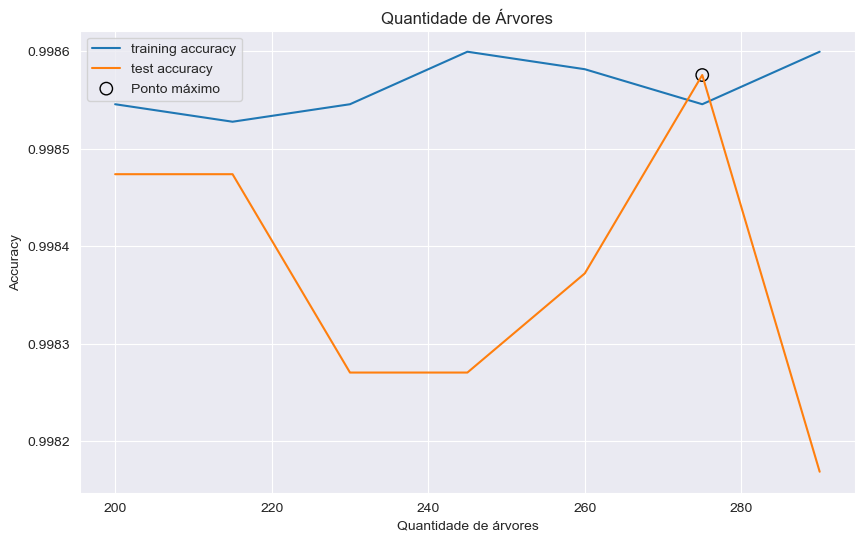

In [21]:
training_accuracy_forest = []
test_accuracy_forest = []

sns.set_style('darkgrid')

# Escolhendo uma faixa de árvores, sabendo que o número padrão é de 100 árvores :
n_estimators_max = np.arange(200,300,15)

for n in n_estimators_max:
    
    # Construindo o modelo:
    forest = RandomForestClassifier(n_estimators = n,criterion='entropy', random_state =0)
    forest =forest.fit(X_train , y_train)
    # Guardando os scores
    training_accuracy_forest.append(forest.score(X_train , y_train))
    test_accuracy_forest.append(forest.score(X_test , y_test))
    
    
    
plt.figure(figsize=(10,6))
plt.title('Quantidade de Árvores')
plt.plot(n_estimators_max , training_accuracy_forest , label = 'training accuracy')
plt.plot(n_estimators_max , test_accuracy_forest , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Quantidade de árvores")
plt.scatter(275,max(test_accuracy_forest), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()


plt.show()

#### Qual  a melhor quantidade de Decision Nodes de uma árvore?

Como viu-se o melhor tamanho de uma floresta para o nosso dataset é de 275, dessa forma, vamos analisar qual a melhor profundidade (quantidade de  Decision Nodes) para o modelo, fixando o valor ótimo de árvores já encontrado anteriormente. Utilizaremos novamente a variação dos scores em treino e teste, objetivando encontrar o melhor valor para esse parâmetro.

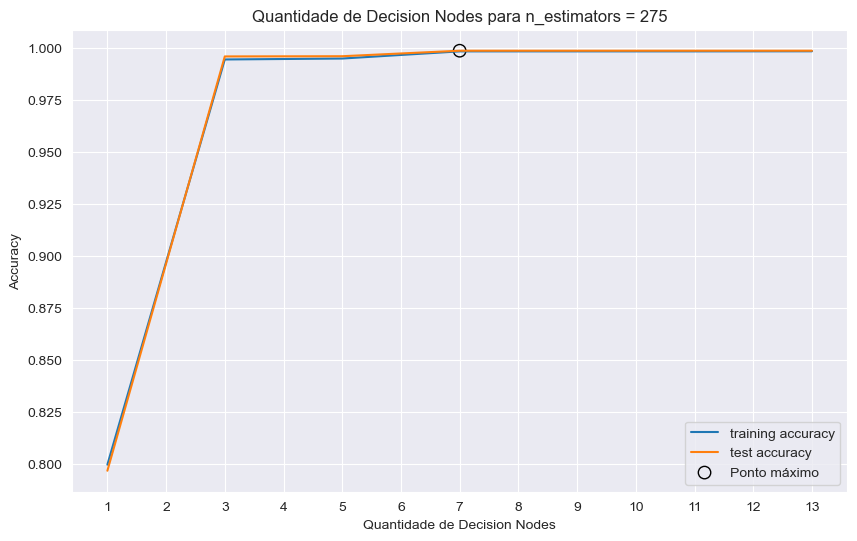

In [40]:
training_accuracy_forest = []
test_accuracy_forest = []

sns.set_style('darkgrid')

# Escolhendo uma faixa de profundidade:
max_depth = np.arange(1,15,2)

for n in max_depth:
    
    # Construindo o modelo:
    forest = RandomForestClassifier(n_estimators = 275, criterion='entropy', max_depth = n, random_state =0)
    forest =forest.fit(X_train , y_train)
    # Guardando os scores
    training_accuracy_forest.append(forest.score(X_train , y_train))
    test_accuracy_forest.append(forest.score(X_test , y_test))
    
    
    
plt.figure(figsize=(10,6))
plt.title('Quantidade de Decision Nodes para n_estimators = 275')
plt.plot(max_depth , training_accuracy_forest , label = 'training accuracy')
plt.plot(max_depth , test_accuracy_forest , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Quantidade de Decision Nodes")
plt.xticks(range(1,15,1))
plt.scatter(7,max(test_accuracy_forest), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()

plt.show()

Como podemos observar, o resultado em que temos uma primeira estabilização em score = 1 ocorre em  max_depth = 7. Consideramos esse como o valor ideal apesar de possuirmos valores de score = 1 para max_depth > 7, pois o aumento desse parâmetro implica a maior complexidade do modelo, e seu possível Overfitting.

#### Seleção de hiperparâmetros: Qual a melhor configuração para o modelo?

Nos tópicos anteriores variamos alguns dos hipermarâmetros notórios descritos no início dessa sessão. Nesse tópico, consideraremos as condições de melhor desempenho encontrados nos tópicos anteriores, ou seja, número de árvores = 275 e
max_depth = 7, e variaremos um último parâmetro fundamental , criterion , que analisa a qualidade da segmentação dos eixos.

Ao final , teremos os 3 principais parâmetros com seus valores ótimos, e consideraremos o resultado obtido nesse arranjo como o de  melhor resultado possível para o nosso modelo.

In [32]:
inicio = time.time()     # Inicio tempo de execução

train_score_forest=0
test_score_forest=0
criterion_best  = ''

for criterion in ['gini','entropy']:

    forest=RandomForestClassifier(n_estimators = 275,criterion=criterion,
                                max_depth=7,random_state=0).fit(X_train,y_train)

    train_score=forest.score(X_train,y_train)
    test_score=forest.score(X_test,y_test)
    
    #Evitando parte de Overffiting
    if test_score>train_score:
        if test_score>test_score_forest:

            test_score_forest=test_score
            train_score_forest=train_score

            criterion_best = criterion

        else:
            continue
    else:
        continue
            
fim = time.time()  #Fim - tempo de execução    

print(f'''O Melhor resultado é obtido para  critério "{criterion_best}"
\n 
(training):\t{train_score_forest}\n(test):\t\t{test_score_forest}''')

print(f'O Tempo de execução foi de {fim-inicio}s')

O Melhor resultado é obtido para  critério "gini"

 
(training):	0.9983663064162867
(test):		0.9986775178026449
O Tempo de execução foi de 36.638558864593506s


Como pode se observar, os melhores hipermarâmetros foram escolhidos de forma separada e não através de "for's" aninhados como feito nos demais modelos, essa decisão foi tomada devido a uma das desvantagens que o algoritimo Random Florest apresenta, a alta demanda de energia computacional, sendo o mesmo um algorítimo lento para muitas iterações simultâneas ou grandes bases de dados.

Para a escolha dos melhores hiperparâmetros de forma simultânea o tempo de execução foi de aproximadamente 12.000 segundos, e não apresentou scores consideravelmente superiores ao feito pela escolha de parâmetros individuais. 

In [33]:
#Instanciando o modelo com parâmetros selecionados que obtiveram o melhor score.
floresta = RandomForestClassifier(n_estimators = 275,criterion='gini',
                                        max_depth=7,random_state=0).fit(X_train,y_train)

#### Importância dos atributos(Features)

Aqui veremos pelo crivo de uma floresta aleatória se os atributos mais importantes para a classificação são parecidos com aqueles encontrados no modelo Decision Tree.

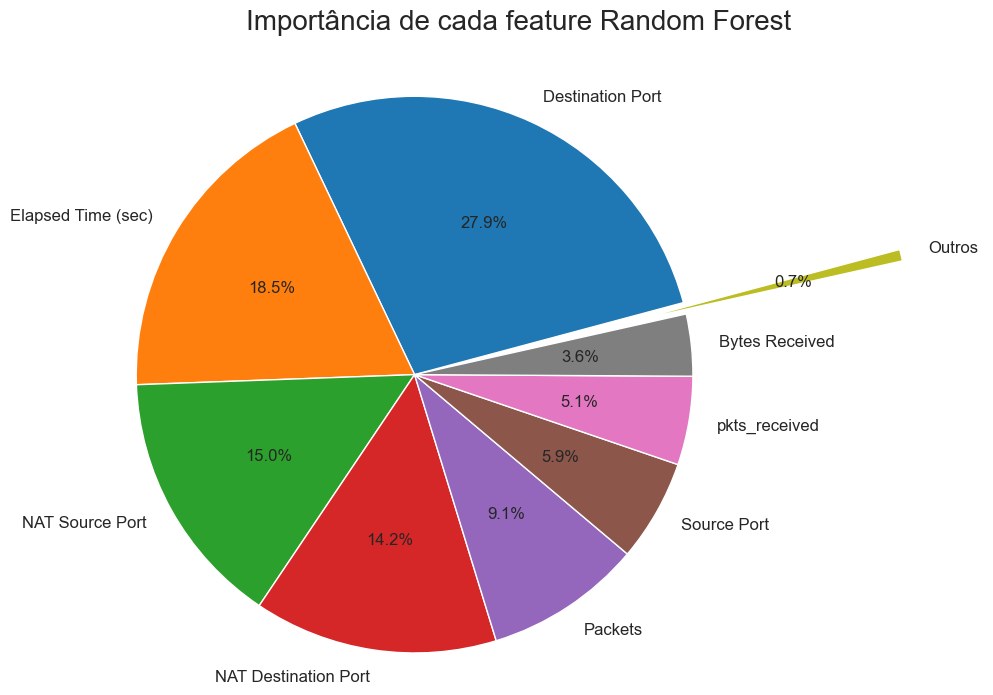

In [41]:
#Fazendo seleção dos atributos utilizados
sns.set_style(style="darkgrid")
plt.figure(figsize=(12,8))

importancia =pd.Series(floresta.feature_importances_,index=X_train.columns)
importancia = importancia.sort_values(ascending=False)
importancia1 = importancia.sort_values(ascending=True)
importance = []
outros = 0

for feature in importancia:
    if feature>1/100:
        importance.append(feature)
    else:
        outros+=feature
importance.append(outros)
importance = pd.Series(importance,index=list(importancia[:8].index)+['Outros'])
        

#Plotando gráfico de pizza
plt.pie(importance,labels=importance.index,
        explode= [0]*8+[0.8],autopct='%1.1f%%',shadow=False, startangle=15,
       textprops={'size':12})
plt.axis('equal')    
#Plota o nível de importância de cada atributo para o modelo
plt.title("Importância de cada feature Random Forest\n",size=20)
# plt.xlabel('Nível de Importância')
plt.show()
#importancia

Como podemos observar pelo gráfico, a feature Destination Port ainda possui a maior importância para o modelo de Random florest, assim como no modelo Decision Tree, porém como uma porcentagem consideravelmente inferior. 

Interessante notar tambem que a NAT Source Port passou a assumir o "3° lugar" em importância, em Decision Tree a mesma feature estava como segunda colocada, visto que Elapsed Time encontrou-se nesse algorítimo. Outras features aparecem nesse modelo de forma mais significativa do que em nosso 3° Modelo.

Devido ao fato de possuir maior generalidade do que complexidade, vemos uma maior influência das demais features no melhor resultado obtido pelo modelo. Isso reforça , novamente a analise exploratória feita, visto que nela foram observadas a importância das features de forma semelhante a mostrada nesse tópico.

#### Avaliando a Qualidade de Predição do modelo

Com outras métricas como Recall, Precision e Sensibility, podemos avaliar a qualidade do modelo sobre outra perspectiva, sobretudo as métricas aplicadas a predição de nosso modelo, que em geral não deve classificar erroneamente uma ameaça como uma comunalidade.

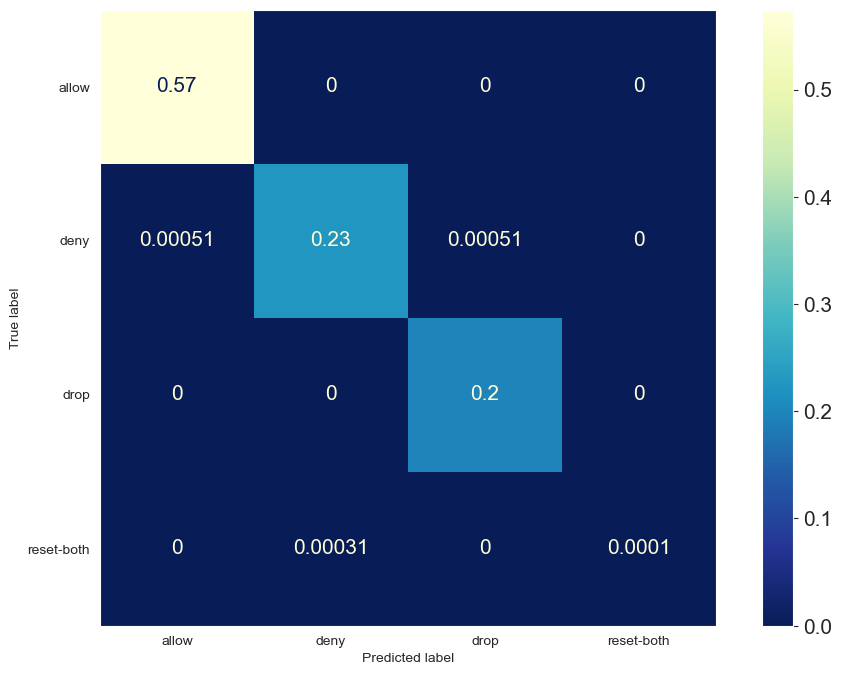

In [42]:
# Criando figura e ajudatando eixos.

fig , ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 15})

# Matriz de confunsão para mlehor resultado obtido no KNN:
y_pred_floresta = floresta.predict(X_test)

plot_confusion_matrix(floresta, X_test, y_test, sample_weight=None, normalize= "all", 
                      cmap='YlGnBu_r' , ax = ax)
ax.xaxis.set_ticklabels(transformer.classes_); ax.yaxis.set_ticklabels(transformer.classes_);

plt.grid(False)
plt.show()

In [43]:
types_average = ['micro', 'macro', 'weighted']

dict_tree_recall ={}

for avarage in types_average:

    score = recall_score(y_test , y_pred_floresta , average = avarage , sample_weight = None , zero_division = 'warn' )
    
    dict_tree_recall[avarage] = score

print(dict_tree_recall)

{'micro': 0.9986775178026449, 'macro': 0.8113758992805755, 'weighted': 0.9986775178026449}


#### Validação cruzada

Vendo a validação de diferentes métricas, varia-se a configuração da base de dados de maneria cruzada para melhor validação da heterogeineidade dos scores da Random Florest.

In [44]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']

for metric in scoring_metrics:
    score = cross_val_score(floresta,X,y,cv=10,scoring = metric)
    print('#'+'-------'*15+'#')
    print(f'Para a métrica "{metric}", sendo realizadas 10 partições aleatórias, temos os seguintes scores:\n')
    print(np.array(score).reshape(1,-1))
    print('\nMédia da amostra:\t\t', score.mean())
    print('Desvio Padrão da amostra:\t ', score.std(),'\n')

#---------------------------------------------------------------------------------------------------------#
Para a métrica "accuracy", sendo realizadas 10 partições aleatórias, temos os seguintes scores:

[[0.99832164 0.99893195 0.99801618 0.99893179 0.99771097 0.99862658
  0.99862658 0.99816878 0.99893179 0.99725317]]

Média da amostra:		 0.9983519418039739
Desvio Padrão da amostra:	  0.0005408384131174728 

#---------------------------------------------------------------------------------------------------------#
Para a métrica "f1_micro", sendo realizadas 10 partições aleatórias, temos os seguintes scores:

[[0.99832164 0.99893195 0.99801618 0.99893179 0.99771097 0.99862658
  0.99862658 0.99816878 0.99893179 0.99725317]]

Média da amostra:		 0.9983519418039739
Desvio Padrão da amostra:	  0.0005408384131174728 

#---------------------------------------------------------------------------------------------------------#
Para a métrica "f1_macro", sendo realizadas 10 partições aleatória

##### Resultados na prática

Utilizando o recurso da Curva Característica de Operação do Receptor (ROC) para essa analise Multi-Class com auxílio da Biblioteca Yellowbrick, gerando assim uma melhor visualização conforme os fatores explicados acima. Em termos práticos, quão mais próximo do ponto superior esquerdo, melhor é o desempenho do modelo, devido maior assertividade no âmbito de Verdadeiros Positivos e menor geração de Falsos Positivos, o que nosso caso do mapeamento de um Firewall é necessário, visto que a passagem de um Malware pelo protocolo "Allow" pode ser danosa ao Computador.

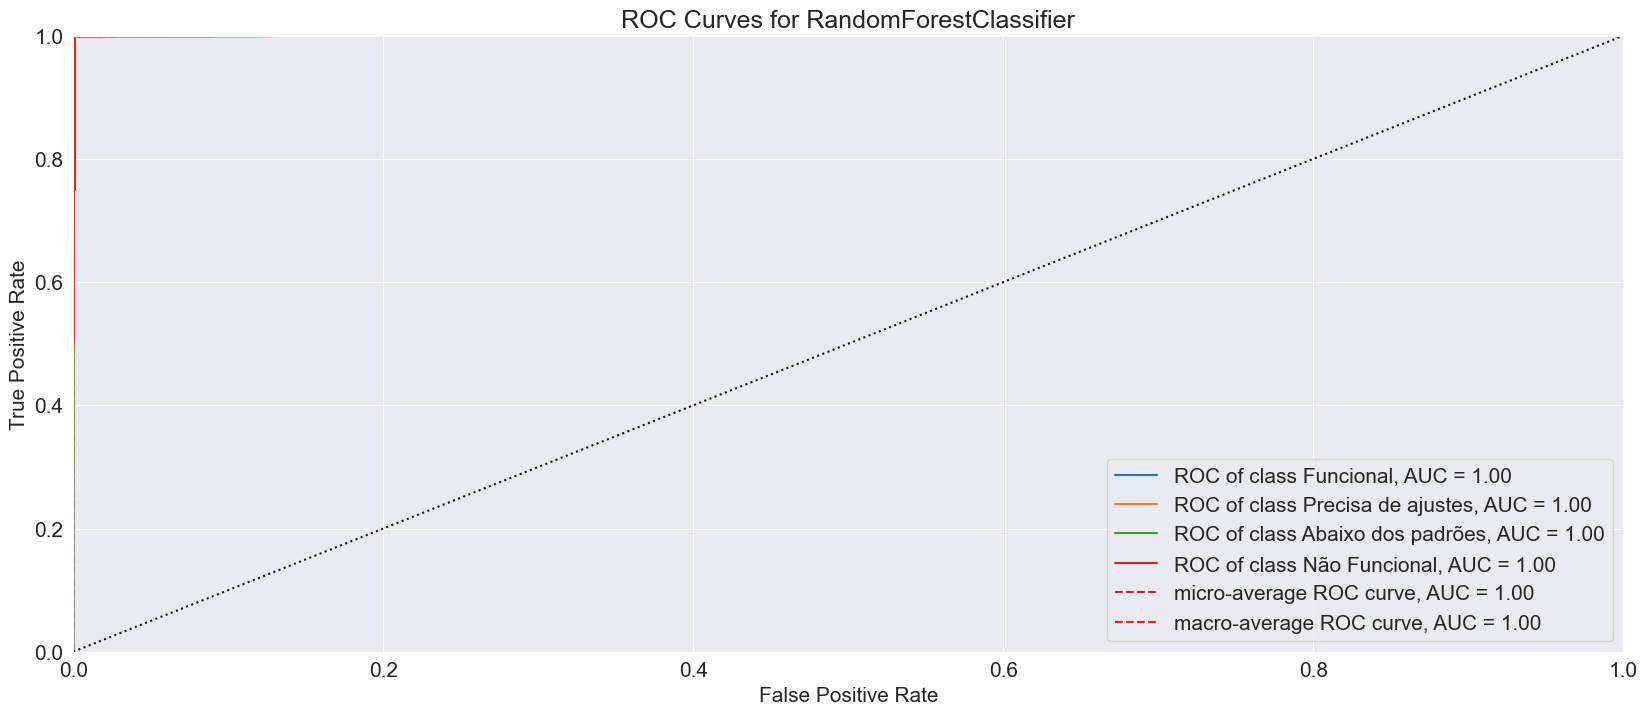

In [45]:
plt.figure(figsize=(20,8))
plot_ROC_curve(floresta,X_train,y_train,X_test,y_test)
plt.show()

#### Algumas Conclusões

Conforme visto pelos gráficos acima, o modelo  atinge os scores máximos de acordo com o previsto para uma ótima classificação cumprindo os requisitos para a ferramenta de detecção de Malware a qual é seu propósito. Notou-se também que a melhor seleção de Hiperparâmetros foi de grande importância para a manutenção do modelo com ótima generalização e classificação imediata dos dados solicitados.

Notou-se assim que o modelo de acordo com o previsto conseguiu scores ainda melhores que seus passados iterando de maneira adequada, resultando em uma melhor predição e adequação desse conjunto de predição, se aproximando da realidade de um sistema de detecção de ameaças.

### Sobre o modelo RandomForest

 Aqui realizaremos uma breve uma análise sobre o modelo, vantagens, desvantagens.

**Vantagens**

* Alto nível de acurácia


* Lida com grandes datasets e com grande numero de atributos;


* Gera métricas internas de erro, importância de vari´aveis e proximidade de instâncias;


* Reduz o overfitting que é considerada maior desvantagem da Decision Tree.



**Desvantagens**


* Alta demanda computacional / tempo de execução.


O modelo Random Florest apresentou-se como uma melhora na predição realizada pelos demais modelos. Portanto, é possível verificar que a melhor equidade na impotância das features, observadas nesse 4° Modelo , apresentou-se como fundamental na melhora da predições obtida por ele.

# Conclusão Geral
<div id='conclusao2'></div>

Retomar análise exploratória, compilar resultados, mostrar o melhor modelo e trazer conclusões gerais (ROC curve todos modelos)

Conforme traçado na sessão conclusiva da Análise exploratória, foi visto que alguns atributos, sobretudo os categóricos pareciam possuir o maior fator de decisão para a tomada de decisão do Firewall, e por consequência, provavelmente deveriam ser de grande impacto para a construção e tomada de decisão do modelo. Conforme, averiguado sobretudo nas análises dos Modelos "Decision Tree" e "Random Forest", viu-se com extrema clareza a importância e notoriedade desses atributos, visto que principalmente para esses algoritmos que levam em conta o ganho de informação por diferentes fatores. 

Destarte é válido ressaltar que os principais fatores que **um Firewall, em relação ao recorte abordado pelo base de dados, são os protocolos de portas solicitados, cada um com sua especificidade, mas que impactam simultaneamente para a melhor escolha do modelo, e assim assegurar com maior certeza quando impedir uma transação de dados via interface Client-Server, com intuito de impedir a entrada de ameaças no computador.**

Feita a análise da composição e noção de escolhas gerais que os modelos puderam ou não levar em conta, cabe uma análise comparativa de todos os modelos abordados aqui, comparando assim seus desempenhos não somente em acurácia, mas também em Precision,Recall, Specificity e muitos outros detalhados durante a sessão de introdução ao aprendizado de máquina, são fundamentais para uma avalição mais robusta, completa e adequada da perfomance dos modelos, e dessa forma permitir uma melhor escolha para uma tarefa tão precisa, que na prática não pode cometer erros devido ao seu propósito de proteção à máquina. Doravante, resgataremos alguns modelos instanciados com os melhores hiperparâmetros feitos em análises simplórias de comparação de scores, e assim gerar tabelas de comparação de scores, baseados principalmente na nova divisão dos dados, e assim obter métricas adequadas para a escolha.

#### Instanciando modelos com melhores perfomances

Instanciaremos agora os melhores parâmetros encontrados dos modelos que realizamos nesse projeto.

In [25]:
knearest = KNeighborsClassifier(n_neighbors = 13 , p = 2 , weights = 'uniform', 
                                metric = 'minkowski').fit(X_train,y_train)
 
logistic = LogisticRegression(penalty='l2', C=41, random_state=0).fit(X_train,y_train)

arvore = DecisionTreeClassifier(criterion='entropy',splitter='random',
                                        max_depth=12,random_state=0).fit(X_train,y_train)

floresta = RandomForestClassifier(n_estimators = 275,criterion='gini',
                                        max_depth=7,random_state=0).fit(X_train,y_train)

## Escolhendo melhor modelo

Realizaremos agora validações cruzadas e comparararemos suas métricas e concluindo qual modelo possui melhor desempenho.

#### Criando Dataframe para compilar scores

Criaremos agora um Dataframe com os resultados obtidos pelas principais métricas de performance de todos os modelos instanciados anteriormente. Plotaremos os scores obtidos para a vizualização daquele que atingiu, em contextos gerais das métricas analisadas, o melhor desempenho.

In [26]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
knn_acc = cross_val_score(knearest,X,y,cv=10,scoring = 'accuracy')
log_acc = cross_val_score(logistic,X,y,cv=10,scoring = 'accuracy')
arv_acc = cross_val_score(arvore,X,y,cv=10,scoring = 'accuracy')
flo_acc = cross_val_score(floresta,X,y,cv=10,scoring = 'accuracy')

knn_mic = cross_val_score(knearest,X,y,cv=10,scoring = 'f1_micro')
log_mic = cross_val_score(logistic,X,y,cv=10,scoring = 'f1_micro')
arv_mic = cross_val_score(arvore,X,y,cv=10,scoring = 'f1_micro')
flo_mic = cross_val_score(floresta,X,y,cv=10,scoring = 'f1_micro')

knn_mac = cross_val_score(knearest,X,y,cv=10,scoring = 'f1_macro')
log_mac = cross_val_score(logistic,X,y,cv=10,scoring = 'f1_macro')
arv_mac = cross_val_score(arvore,X,y,cv=10,scoring = 'f1_macro')
flo_mac = cross_val_score(floresta,X,y,cv=10,scoring = 'f1_macro')


scores = {'Modelo':['KNNeighbors','Logistic Regression','Decision Tree','Random Forests'],
         'Média da acurácia':[knn_acc.mean(),log_acc.mean(),arv_acc.mean(),flo_acc.mean()],
         'Desvio Padrão da acurácia':[knn_acc.std(),log_acc.std(),arv_acc.std(),flo_acc.std()],
         'Média da métrica ponderada Micro':[knn_mic.mean(),log_mic.mean(),arv_mic.mean(),flo_mic.mean()],
         'Desvio Padrão da métrica ponderada Micro':[knn_mic.std(),log_mic.std(),arv_mic.std(),flo_mic.std()],
         'Média da métrica ponderada Macro':[knn_mac.mean(),log_mac.mean(),arv_mac.mean(),flo_mac.mean()],
         'Desvio Padrão da métrica ponderada Macro':[knn_mac.std(),log_mac.std(),arv_mac.std(),flo_mac.std()]}
df = pd.DataFrame(scores)
df

,Modelo,Média da acurácia,Desvio Padrão da acurácia,Média da métrica ponderada Micro,Desvio Padrão da métrica ponderada Micro,Média da métrica ponderada Macro,Desvio Padrão da métrica ponderada Macro
0,KNNeighbors,0.992019,0.002924,0.992019,0.002924,0.743691,0.002319
1,Logistic Regression,0.977934,0.005534,0.977934,0.005534,0.728015,0.005399
2,Decision Tree,0.994522,0.003393,0.994522,0.003393,0.777966,0.043044
3,Random Forests,0.998352,0.000541,0.998352,0.000541,0.819153,0.091678


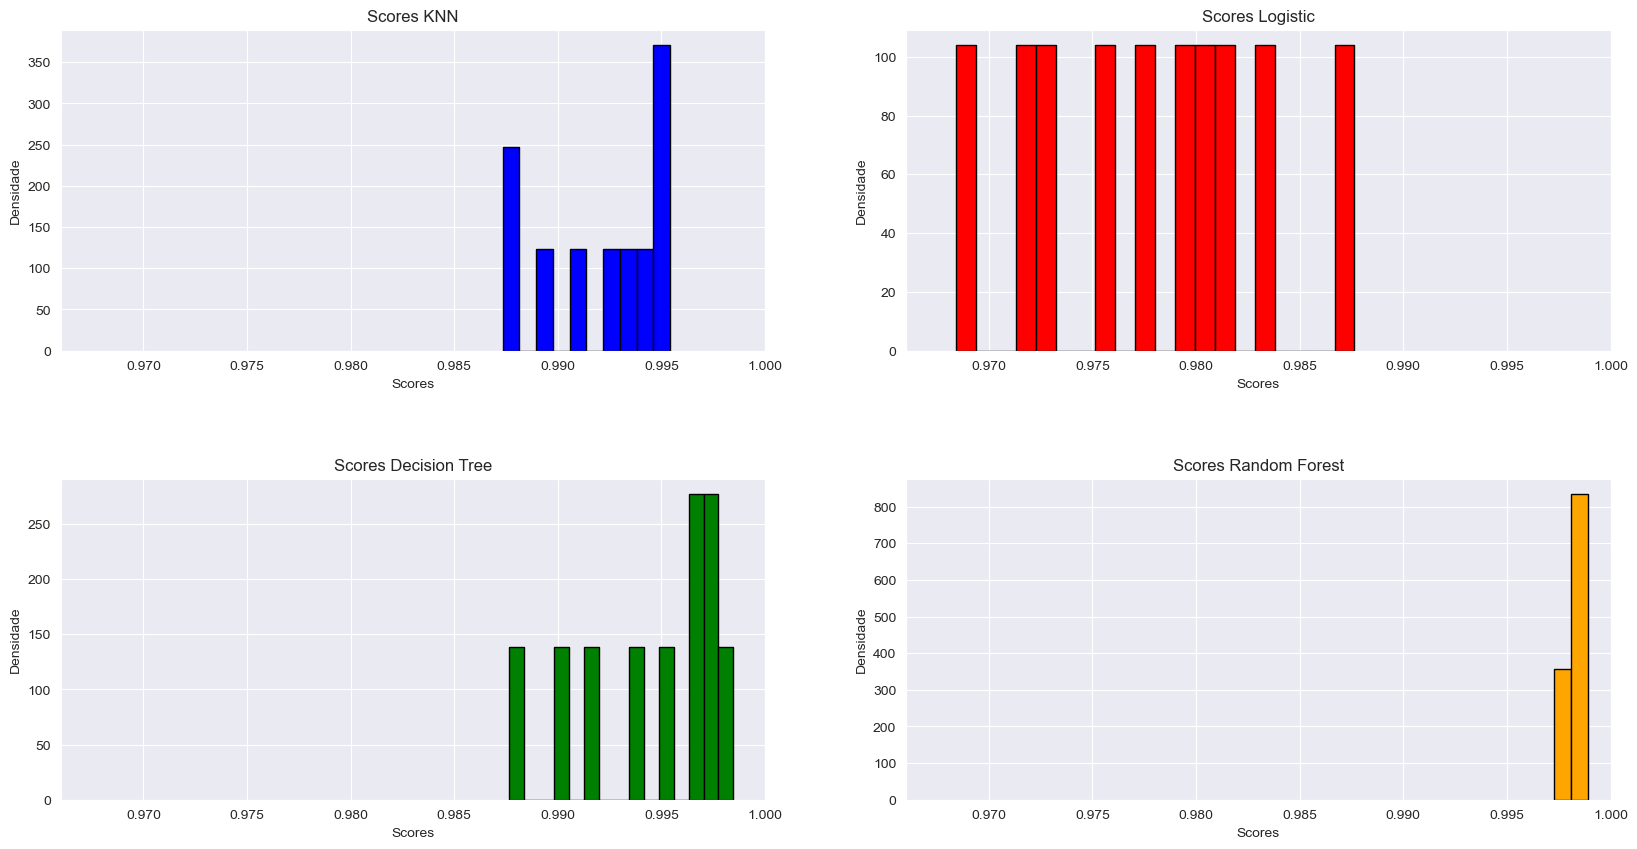

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('Scores KNN')
plt.hist(knn_acc,bins=10,density=1,color='blue',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Densidade')
plt.xlim([0.966,1])

plt.subplot(222)
plt.title('Scores Logistic')
plt.hist(log_acc,bins=20,density=1,color='red',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Densidade')
plt.xlim([0.966,1])

plt.subplot(223)
plt.title('Scores Decision Tree')
plt.hist(arv_acc,bins=15,density=1,color='green',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Densidade')
plt.xlim([0.966,1])

plt.subplot(224)
plt.title('Scores Random Forest')
plt.hist(flo_acc,bins=2,density=1,color='orange',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Densidade')
plt.xlim([0.966,1])

plt.subplots_adjust(hspace = 0.4)

plt.show()

Como pode-se ver nas análises acima, vemos que o modelo "Random Forest" teve as maiores médias de acurácia e média ponderada micro, todavia, aquele modelo que teve maior assimetria à esquerda, isto é com maiores scores divididos perto da predição perfeita é o modelo Decision Tree.

Retomando a Analise Exploratória feita [aqui](#porta) , observamos que as portas mais relevantes mostradas por essa análise são confirmadas pela features importance dos modelos construidos.

Dessa forma vimos que as hipóteses levantadas pela nossa pergunta: **"Seria possível prever a decisão tomada por um Firewall?"** que os modelos conseguiram responder com ótima performance tal indagação levando sobretudo a maior influencia de alguns atributos em relação a outros, prevendo de forma adequada e cumprindo algumas hipóteses levantadas conforme vistas na Analise exploratória, hipoteses essas que foram confirmadas pela seção de importância de features de alguns modelos.

Em um contexto geral , podemos afirmar que os modelos utilizados configuraram de maneira razoavel a proposição inicial desse projeto, sanando a dúvida inicialmente estabelecida.

#### Críticas e Aprimoramentos

* Captação de mais dados e features que tragam complexidade ao dataset, tornando-o mais próximo a realidade e ao processo de identificação de Malwares por um Firewall. 


* Alguns modelos podem ter tendido ao Overffiting, dessa forma o melhor tratamento e seleção de dados para seu conhecimento adequado evitaria processos que possivelmente podem ter ocorrido como DataLeakge ou atributos ireelevantes ou supreatributos utilizados na analise.


* Utilização de mais hiperparâmetros nos modelos utilizados.


* Utilização de mais modelos como SVM , Gradient Boosting e Redes Neurais.

Utilizando todos os aprimoramentos aqui propostos , poderiamos conseguir modelos próximos a acruácia e a realidade do  funcionamento de um Firewall.

# Aplicação prática
<br>
<div id='aplicacao'></div>

<br>
<center><img src="firewall_assets/giphy.gif" width=500 style="float: center; margin: 0px 0px 10px 10px"></center>
<br>

Para uma aplicação prática desse modelo e aplicação,seria necessária a criação de um Software ou uma iterface API que tivesse inteiração com os fluxos de dados e entrada web do computador, tendo assim potencial para barrar ou não possíveis ameaças. Dessa forma, seria possível utilizar os modelos como classificadores para a tomada de decisão do software, prezando sempre pela escolha mais precisa no dado momento.

#### Emulando o Firewall

Abaixo segue um painel interativo onde é possível, escolhendo algumas classes dos atributos e com isso ver o que cada modelo retorna. É um modelo simplório que emula de maneira lúdica o que seria feito pelo modelo em uma aplicação prática.

Agora é a sua vez de testar os nossos modelos ! Para verificar se o Firewall vai negar ou não a sua ação varie os parâmetros localizados abaixo do código e veja qual ação será tomada por ele !

In [59]:
# Ações realizadas para não ser necessário rodar o jupyter por completo:

# Carregando base de dados
dados=pd.read_csv('firewall_assets/log2.csv')
dados_interativos = dados.copy()

# Realizando codificação 
transformer = LabelEncoder()
dados.Action = data_model.iloc[:,[4]].apply(lambda x: transformer.fit_transform(x))
y = dados.Action
dados_interativos = dados_interativos.drop('Action',axis=1)

# Realizando divizão
X_train,X_test,y_train,y_test=train_test_split(dados_interativos,y, random_state=42,test_size=0.15)

model = {'KNN': KNeighborsClassifier(n_neighbors = 13 , p = 2 , weights = 'uniform', 
                                metric = 'minkowski').fit(X_train,y_train), 
        'Logistic Regression': LogisticRegression(penalty='l2', C=41, 
                                                  random_state=0).fit(X_train,y_train), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',splitter='random',
                                        max_depth=12,random_state=0).fit(X_train,y_train),
        'Random Forest': RandomForestClassifier(n_estimators = 200,criterion='gini',
                                        max_depth=5,random_state=0).fit(X_train,y_train)}

source_ports = [58638,57470,50584,443,3478,6881]
destination_port = [53,80,443,445,5900,22114]
NAT_source = [0,7986,30399,43757,48817,50116]
NAT_destination = [0,53,80,123,443,27015]


@interact( Modelo = list(model.keys()),Source_port = source_ports, Destination_port = destination_port,
         NAT_Source = NAT_source,NAT_Destination = NAT_destination,Bytes= (10, 1e4,100),
         Bytes_enviados=(10, 1e4,100),Bytes_recebidos=(10, 1e4,100),Packets=(1, 10,1),
         Packets_enviados=(1, 10,1),Packets_recebidos=(1,10,1),Tempo_decorrido = (1,50,5))
def f(Modelo = 'KNN', Source_port = 58638 , Destination_port = 5900, NAT_Source = 0,NAT_Destination = 53,
     Bytes=10,Bytes_enviados=10,Bytes_recebidos=10,Packets=1,Packets_enviados=1,Packets_recebidos=1,Tempo_decorrido=1):
    
    
    X = np.array([Source_port,Destination_port,NAT_Source,NAT_Destination,Bytes,Bytes_enviados,
                  Bytes_recebidos,Packets,Tempo_decorrido,Packets_enviados,Packets_recebidos]).reshape(1,-1)
    

    resultado = model[Modelo].predict(X)
    
    true = {'0' : ['Allow','green'] , '1' : ['Deny','red'] , '2' : ['Drop','yellow'] , '3' : ['Reset-both','purple']}   
    
    return md('## <center> O protocolo adotado pelo firewall foi <span style="color:{1}">{0}</span></center>'
              .format(true[str(resultado[0])][0],true[str(resultado[0])][1]))

interactive(children=(Dropdown(description='Modelo', options=('KNN', 'Logistic Regression', 'Decision Tree', '…

# Referências
<br>
<div id='referencia'></div>
Consulte aqui as referências utilizadas para a construção deste projeto.

* Analise Exploratória

[Portas](https://pt.wikipedia.org/wiki/Source_port#:~:text=Source%20port%20%C3%A9%20a%20portabiliza%C3%A7%C3%A3o,qual%20n%C3%A3o%20foi%20originalmente%20escrito.) 

[Portas](https://www.pcmag.com/encyclopedia/term/tcpip-port#:~:text=Destination%20Ports%20Are%20Server%20Applications&text=For%20example%2C%20all%20port%2080,such%20as%20Skype%20and%20BitTorrent.)

[Protocolos Web](https://www.infonova.com.br/artigo/o-que-e-tcp-ip-e-como-funciona/#:~:text=O%20TCP%20%C3%A9%20um%20protocolo,sequ%C3%AAncia%20pelo%20qual%20foram%20enviados.)

[Rede de Computadores - NAT](https://pt.wikipedia.org/wiki/Network_address_translation)

[Pacotes de Dados](https://pt.wikipedia.org/wiki/Pacote)

[Padronização de variáveis](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9#:~:text=A%20transforma%C3%A7%C3%A3o%20dos%20seus%20dados,com%20maior%20ordem%20de%20grandeza.&text=Se%20a%20distribui%C3%A7%C3%A3o%20n%C3%A3o%20%C3%A9,uma%20escolha%20a%20ser%20tomada.)


* Modelos

[KNN - Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

[Simple Regression](https://operdata.com.br/blog/uma-visao-geral-sobre-machine-learning-regressao-clustering/#:~:text=A%20Regress%C3%A3o%20%C3%A9%20um%20dos,valores%20de%20vari%C3%A1veis%20preditoras%20X.)

[Logistic Regression or Linear Regression](https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-regress%C3%A3o-linear-e-an%C3%A1lise-de-regress%C3%A3o-log%C3%ADstica-com-r-a4be254df106#:~:text=Enquanto%20na%20Regress%C3%A3o%20Linear%20temos,ou%201%2C%20sim%20ou%20n%C3%A3o.&text=A%20Regress%C3%A3o%20Log%C3%ADstica%20%C3%A9%20uma,um%20conjunto%20de%20vari%C3%A1veis%20explanat%C3%B3rias.)

[Logistic Regression](https://matheusfacure.github.io/2017/02/25/regr-log/#:~:text=O%20que%20a%20fun%C3%A7%C3%A3o%20sigm%C3%B3ide,com%20a%20nossa%20solu%C3%A7%C3%A3o%20ing%C3%AAnua.)

[Logistic Regression - Algorithm](http://www.saedsayad.com/logistic_regression.htm)


[Logistic Regression - Advantages and Disadvantages](https://iq.opengenus.org/advantages-and-disadvantages-of-logistic-regression/)

[Decision Tree - Algorithm](http://www.saedsayad.com/decision_tree.htm)

[Random Florest - Algorithm](http://www.barbon.com.br/wp-content/uploads/2016/04/FundamentosInteligenciaArtificial-3.pdf)



* Algorítimos de Performance


[Performances - Micro/Macro](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)

[Gini Index](https://blog.quantinsti.com/gini-index/)

[Performance Metrics](https://blog.brq.com/metricas-para-avaliacao-de-modelos-de-regressao-variaveis-continuas-numericas/https://blog.brq.com/metricas-para-avaliacao-de-modelos-de-regressao-variaveis-continuas-numericas/)

[Activation Function - Logistic Regression](https://www.programmersought.com/article/57933926844/)

[ROC Curve: AUC (AUROC)](https://cienciaenegocios.com/curva-roc-e-auc-em-machine-learning/)

[ROC Curve: AUC (AUROC)](https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/)

[Cross-validation](https://medium.com/data-hackers/como-criar-k-fold-cross-validation-na-m%C3%A3o-em-python-c0bb06074b6b#:~:text=K%2Dfold%20%C3%A9%20o%20m%C3%A9todo,teste%2C%20fazendo%20isso%20k%20vezes.)